In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
import sys
#PATH = '/content/drive/My Drive/PPM_Stability/'
#PATH = "C:/Users/velmurug/Documents/Stability Experiments/benchmark_interpretability/PPM_Stability/"
#PATH = "C:/Users/Mythreyi/Documents/GitHub/Stability-Experiments/benchmark_interpretability/PPM_Stability/"
PATH = "C:/Users/mythr/Documents/GitHub/Stability-Experiments/benchmark_interpretability/PPM_Stability/"
#PATH = "C:/Users/n9455647/Documents/GitHub/Stability-Experiments/benchmark_interpretability/PPM_Stability/"
sys.path.append(PATH)

In [2]:
from DatasetManager import DatasetManager

import pandas as pd
import numpy as np

import os
import sys
from sys import argv
import pickle
import random
import joblib

import statistics
import math

import warnings
warnings.filterwarnings('ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset_ref = "bpic2012"
params_dir = PATH + "params"
results_dir = "results"
bucket_method = "prefix"
cls_encoding = "agg"
cls_method = "xgboost"

gap = 1
n_iter = 1

method_name = "%s_%s"%(bucket_method, cls_encoding)

generate_samples = False
generate_lime = True
generate_kernel_shap = False
generate_model_shap = True

sample_size = 2
exp_iter = 10
max_feat = 10
max_prefix = 25

dataset_ref_to_datasets = {
    #"bpic2011": ["bpic2011_f%s"%formula for formula in range(1,5)],
    "bpic2015": ["bpic2015_%s_f2"%(municipality) for municipality in range(5,6)],
    "bpic2017" : ["bpic2017_accepted"],
    "bpic2012" : ["bpic2012_accepted"]
    #"insurance": ["insurance_activity", "insurance_followup"],
    #"sepsis_cases": ["sepsis_cases_1", "sepsis_cases_2", "sepsis_cases_4"]
}

datasets = [dataset_ref] if dataset_ref not in dataset_ref_to_datasets else dataset_ref_to_datasets[dataset_ref]

datasets

['bpic2012_accepted']

Bucket 1
True Negatives
Average LIME Stability: 0.46720538720538723
Average SHAP Stability: 1.0


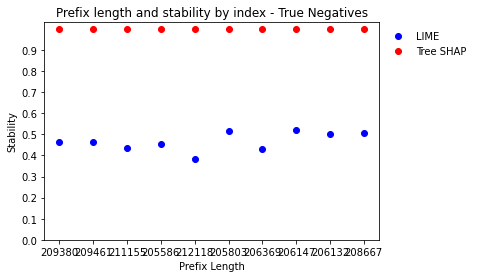

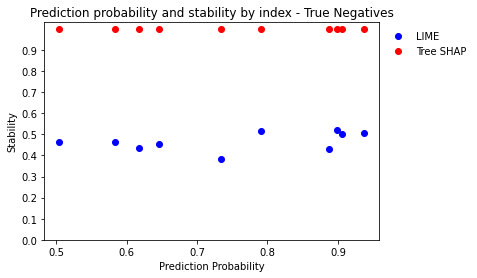

True Positives
Average LIME Stability: 0.4611245791245791
Average SHAP Stability: 1.0


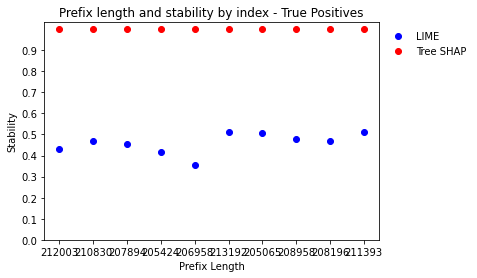

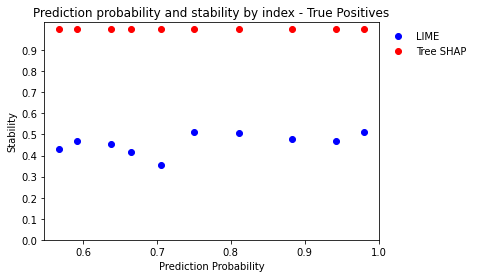

False Negatives
Average LIME Stability: 0.49674074074074076
Average SHAP Stability: 1.0


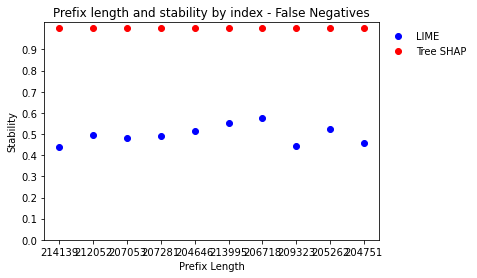

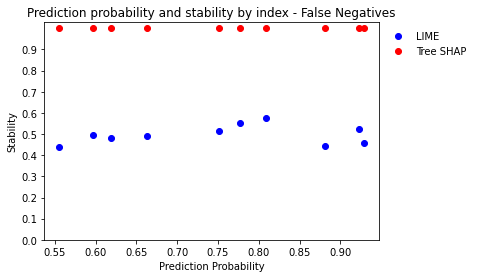

False Positives
Average LIME Stability: 0.4446195286195286
Average SHAP Stability: 1.0


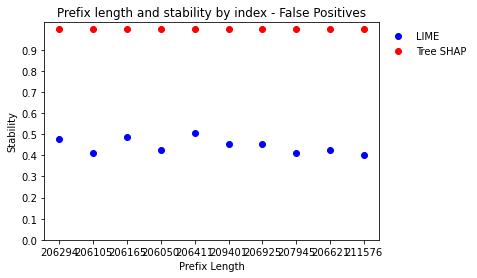

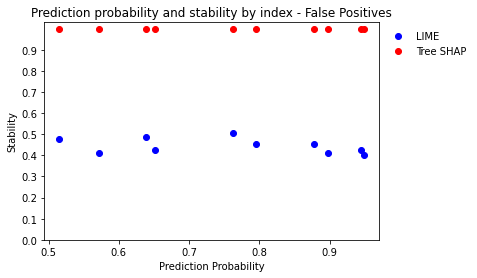

Bucket 2
True Negatives
Average LIME Stability: 0.5464836601307189
Average SHAP Stability: 1.0


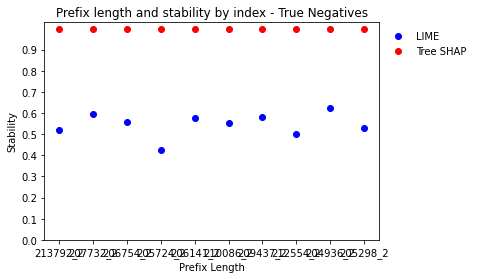

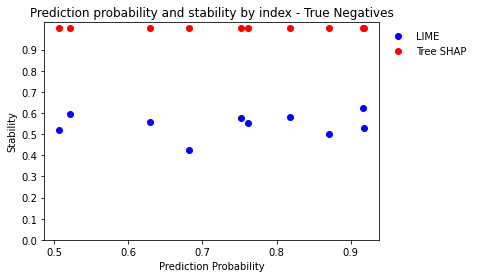

True Positives
Average LIME Stability: 0.49270588235294116
Average SHAP Stability: 1.0


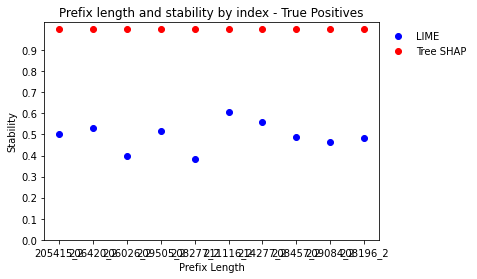

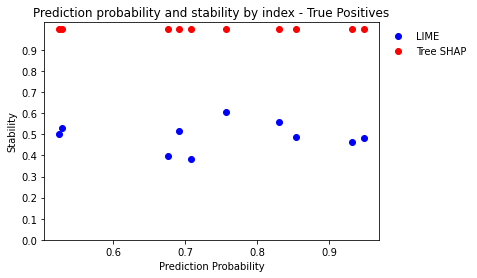

False Negatives
Average LIME Stability: 0.5697777777777777
Average SHAP Stability: 1.0


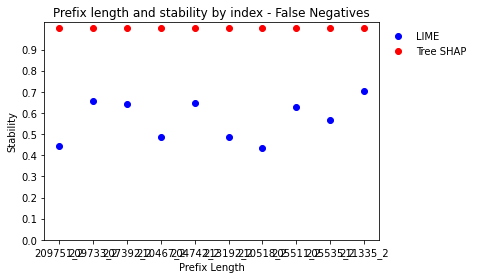

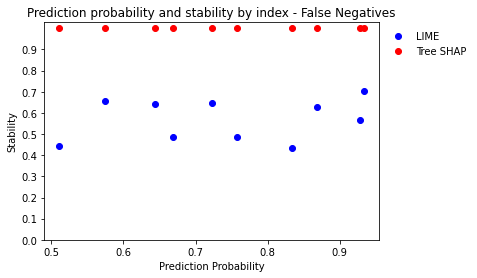

False Positives
Average LIME Stability: 0.540156862745098
Average SHAP Stability: 1.0


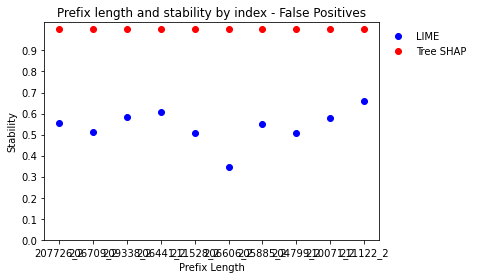

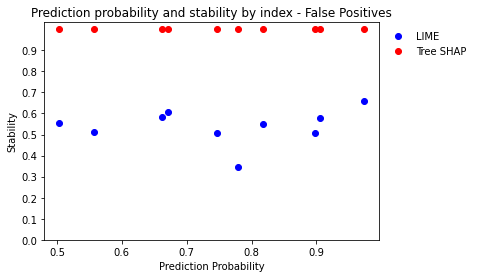

Bucket 3
True Negatives
Average LIME Stability: 0.6728348348348349
Average SHAP Stability: 1.0


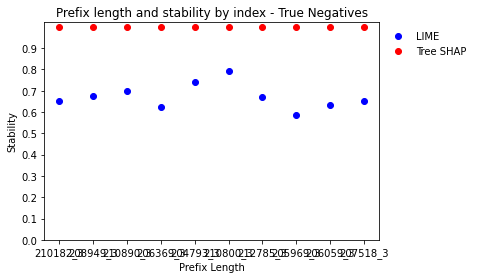

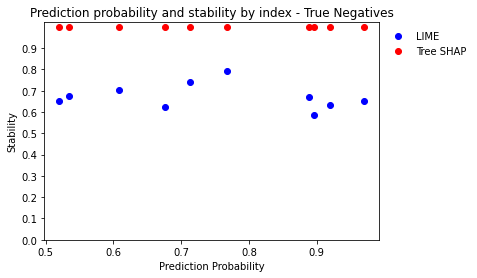

True Positives
Average LIME Stability: 0.6923123123123123
Average SHAP Stability: 1.0


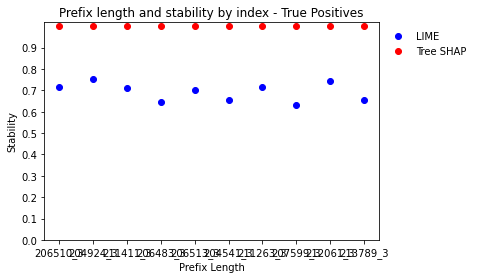

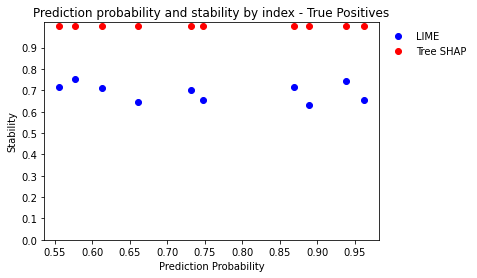

False Negatives
Average LIME Stability: 0.6869489489489489
Average SHAP Stability: 1.0


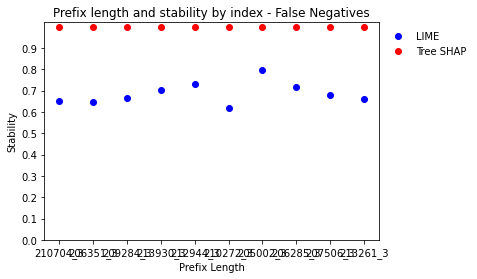

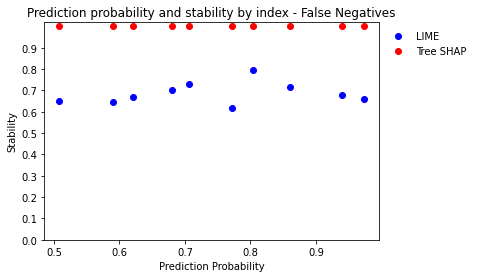

False Positives
Average LIME Stability: 0.6852552552552552
Average SHAP Stability: 1.0


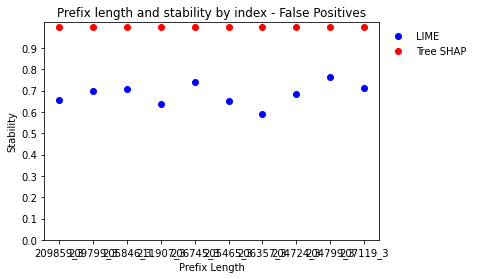

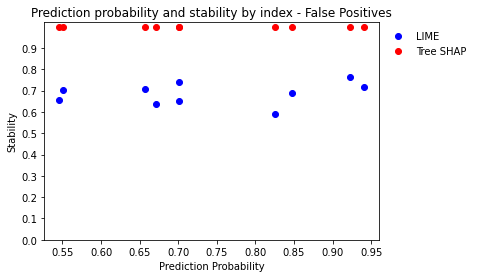

Bucket 4
True Negatives
Average LIME Stability: 0.28724999999999995
Average SHAP Stability: 1.0


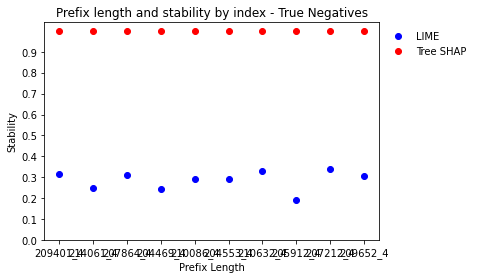

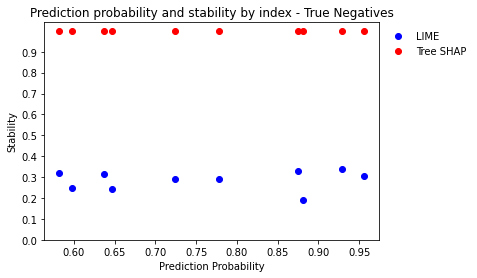

True Positives
Average LIME Stability: 0.3067499999999999
Average SHAP Stability: 1.0


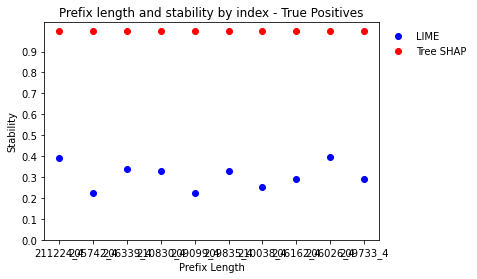

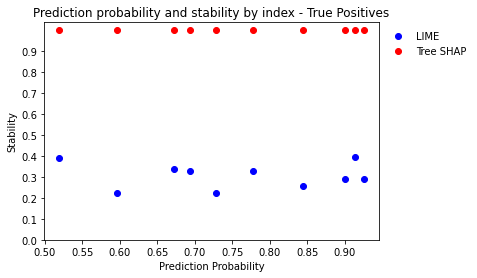

False Negatives
Average LIME Stability: 0.2989999999999999
Average SHAP Stability: 1.0


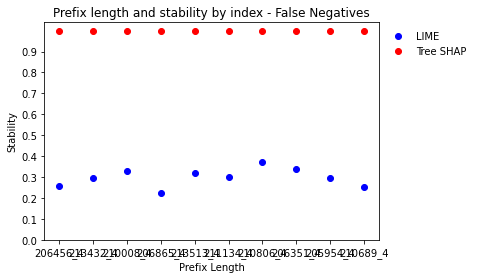

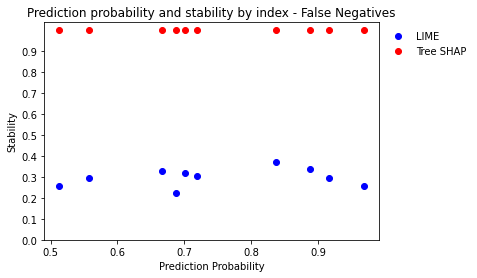

False Positives
Average LIME Stability: 0.30999999999999994
Average SHAP Stability: 1.0


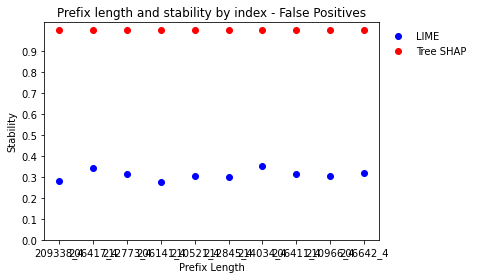

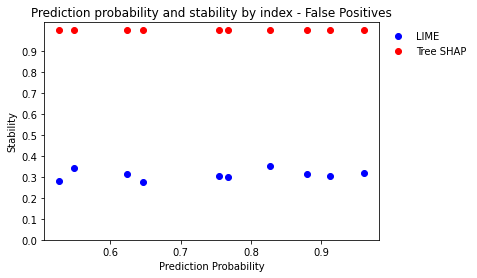

Bucket 5
True Negatives
Average LIME Stability: 0.5252387706855791
Average SHAP Stability: 1.0


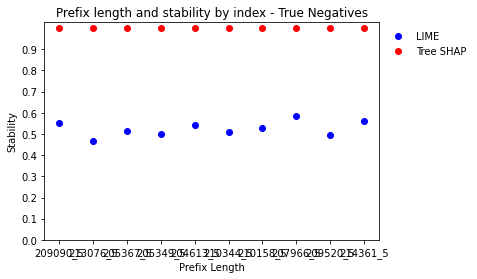

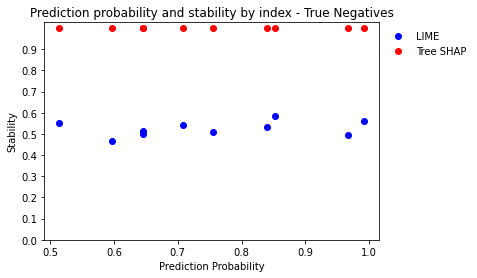

True Positives
Average LIME Stability: 0.5318770685579196
Average SHAP Stability: 1.0


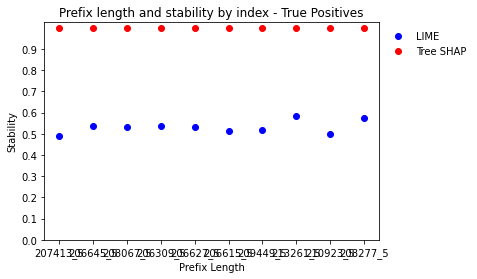

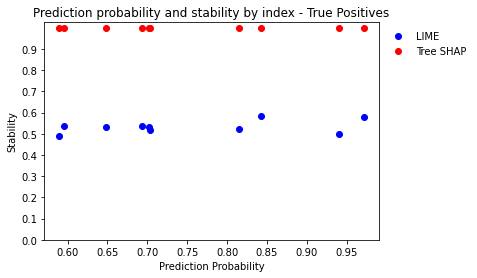

False Negatives
Average LIME Stability: 0.53851536643026
Average SHAP Stability: 1.0


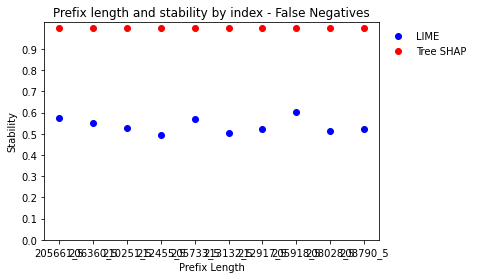

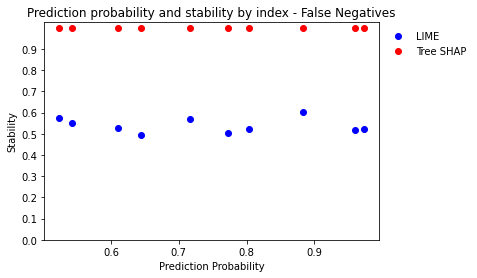

False Positives
Average LIME Stability: 0.5144208037825059
Average SHAP Stability: 1.0


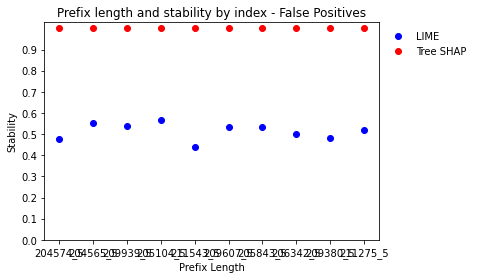

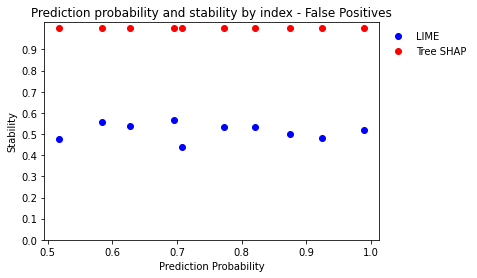

Bucket 6
True Negatives
Average LIME Stability: 0.5416481481481481
Average SHAP Stability: 1.0


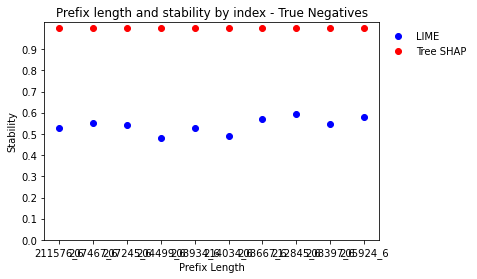

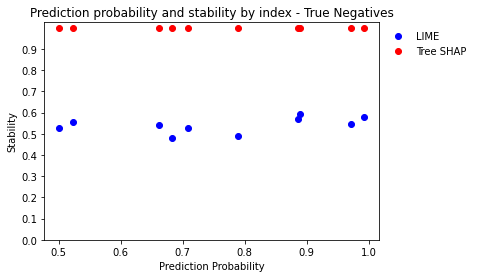

True Positives
Average LIME Stability: 0.5306064814814815
Average SHAP Stability: 1.0


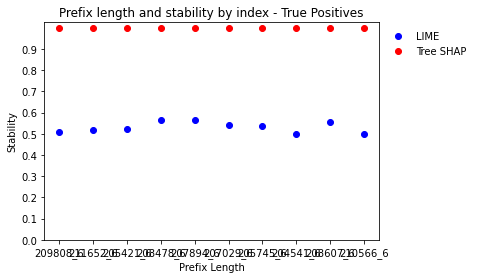

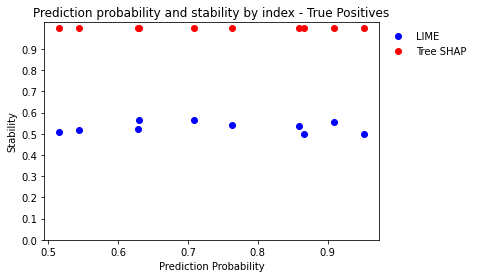

False Negatives
Average LIME Stability: 0.547537037037037
Average SHAP Stability: 1.0


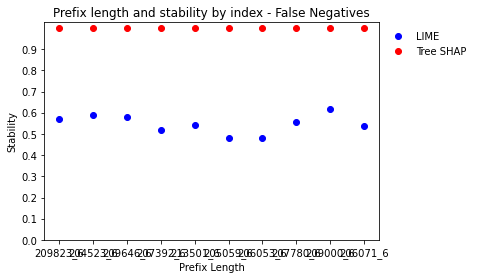

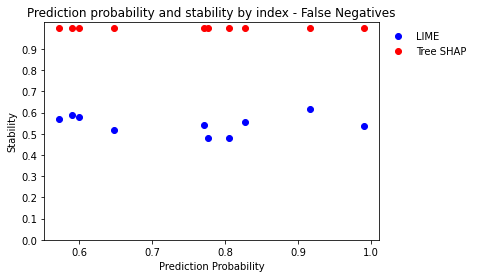

False Positives
Average LIME Stability: 0.554162037037037
Average SHAP Stability: 1.0


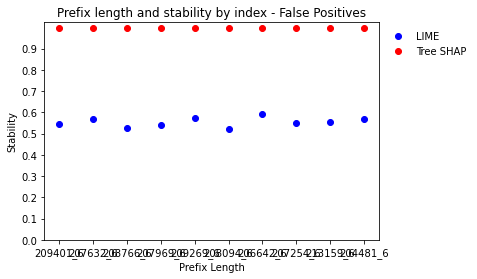

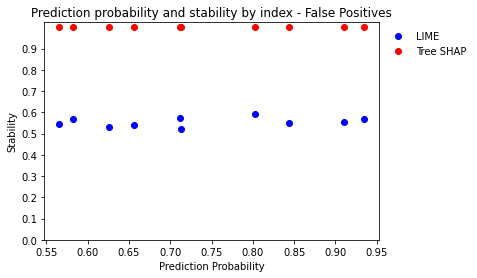

Bucket 7
True Negatives
Average LIME Stability: 0.474938775510204
Average SHAP Stability: 1.0


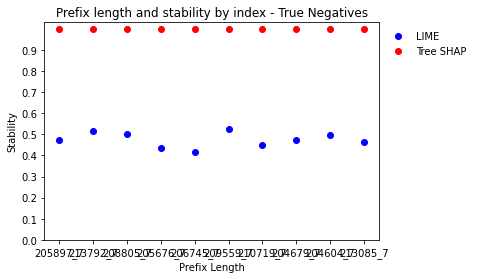

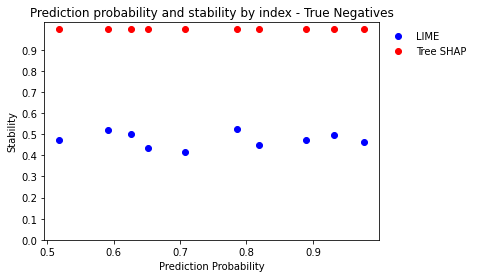

True Positives
Average LIME Stability: 0.5072653061224489
Average SHAP Stability: 1.0


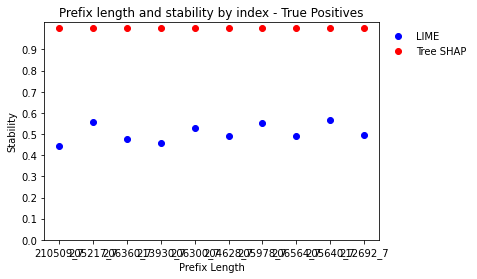

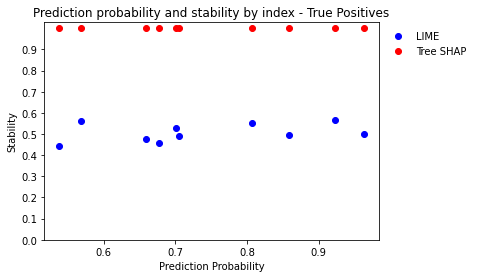

False Negatives
Average LIME Stability: 0.5248979591836734
Average SHAP Stability: 1.0


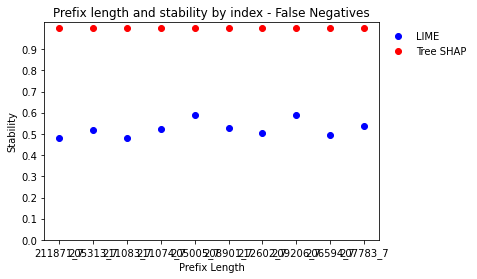

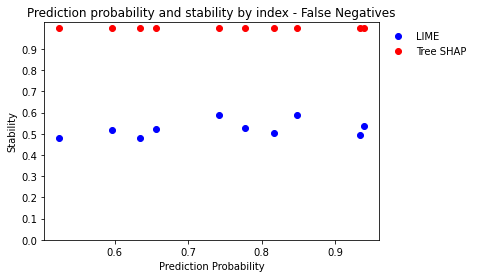

False Positives
Average LIME Stability: 0.4906122448979591
Average SHAP Stability: 1.0


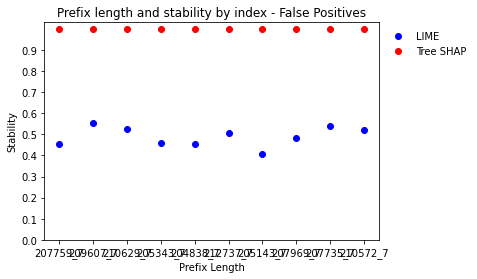

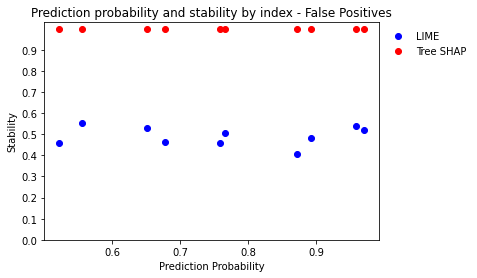

Bucket 8
True Negatives
Average LIME Stability: 0.5226938775510204
Average SHAP Stability: 1.0


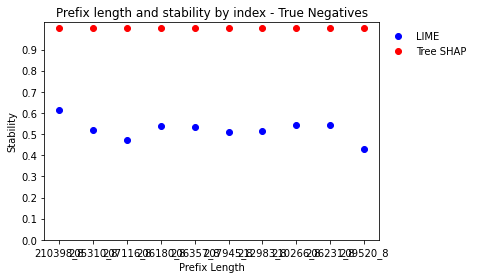

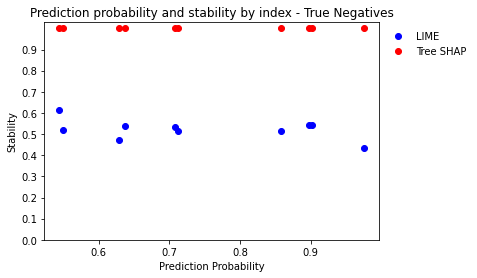

True Positives
Average LIME Stability: 0.5111836734693876
Average SHAP Stability: 1.0


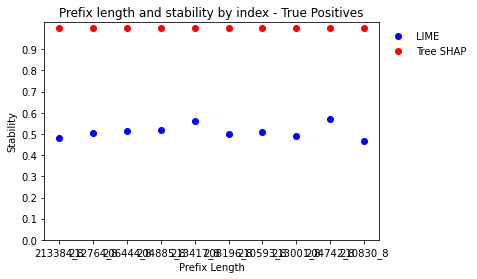

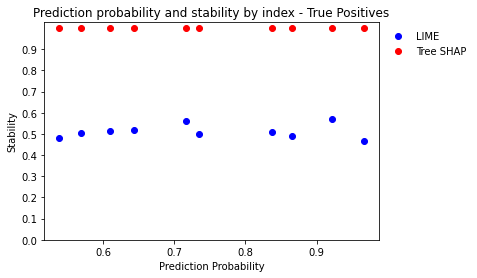

False Negatives
Average LIME Stability: 0.5116734693877552
Average SHAP Stability: 1.0


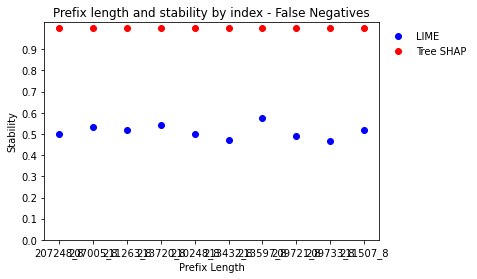

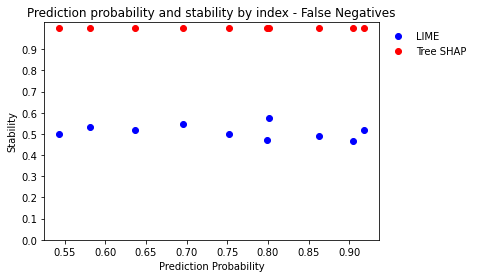

False Positives
Average LIME Stability: 0.5001632653061224
Average SHAP Stability: 1.0


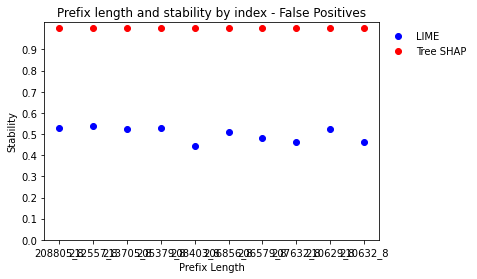

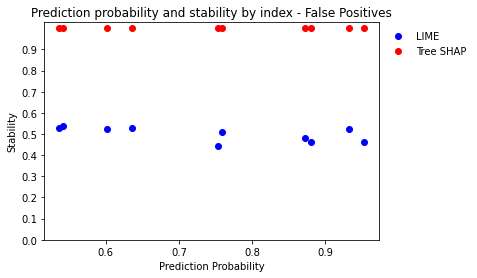

Bucket 9
True Negatives
Average LIME Stability: 0.4688237934904601
Average SHAP Stability: 1.0


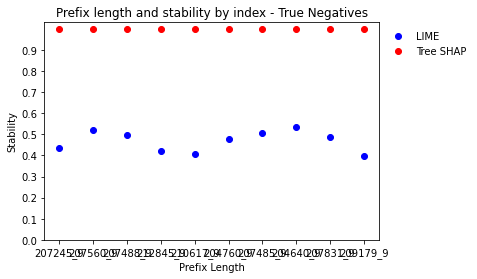

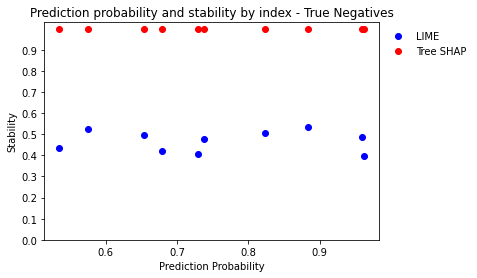

True Positives
Average LIME Stability: 0.4859506172839506
Average SHAP Stability: 1.0


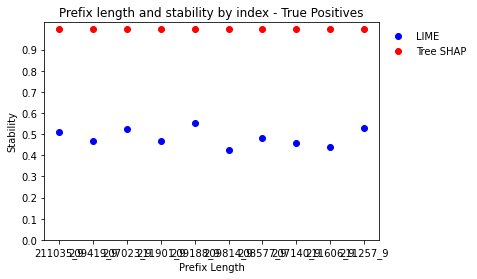

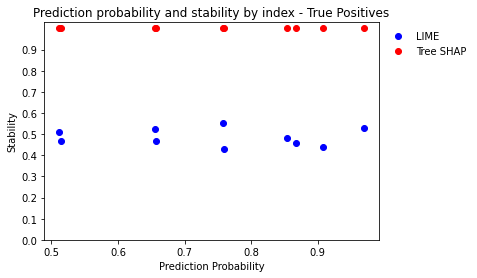

False Negatives
Average LIME Stability: 0.4903546576879911
Average SHAP Stability: 1.0


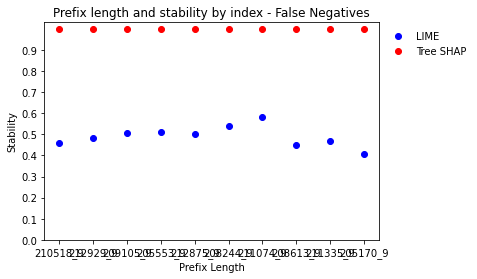

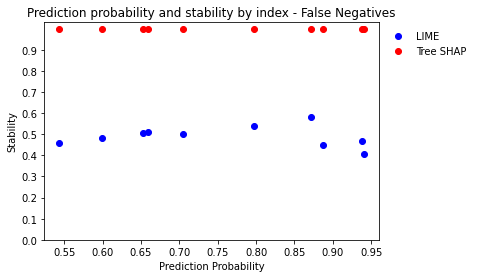

False Positives
Average LIME Stability: 0.4490056116722783
Average SHAP Stability: 1.0


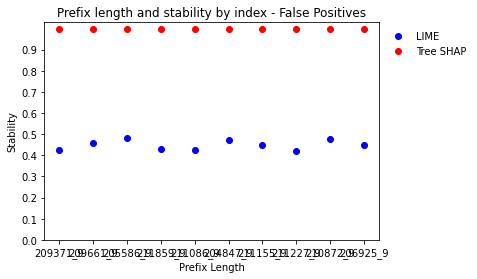

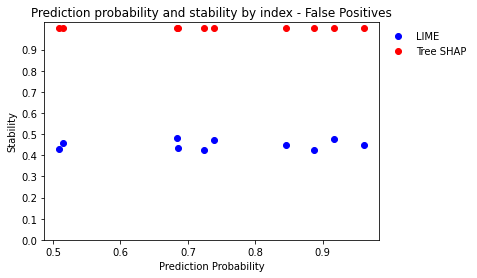

Bucket 10
True Negatives
Average LIME Stability: 0.4446222222222222
Average SHAP Stability: 1.0


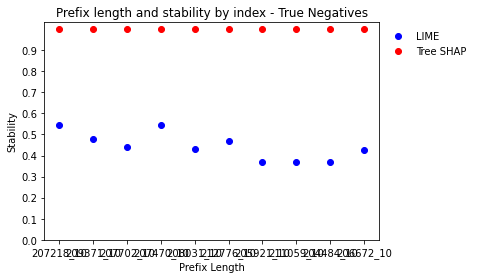

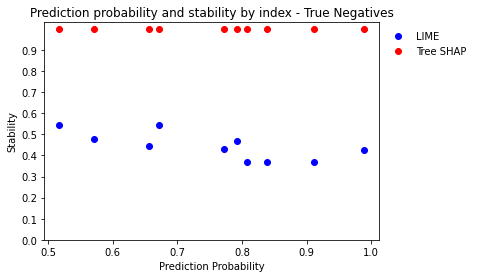

True Positives
Average LIME Stability: 0.4974222222222222
Average SHAP Stability: 1.0


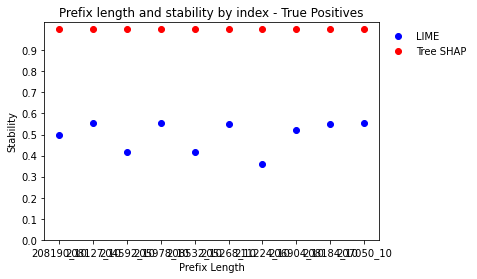

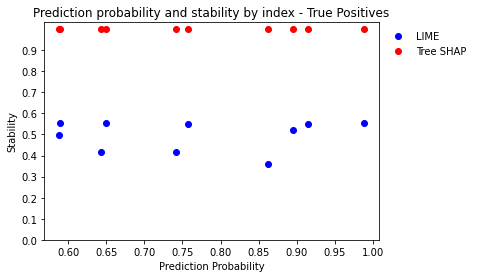

False Negatives
Average LIME Stability: 0.45439999999999997
Average SHAP Stability: 1.0


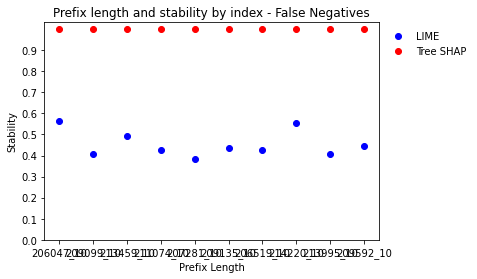

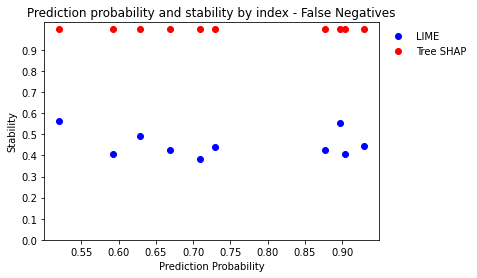

False Positives
Average LIME Stability: 0.4678444444444444
Average SHAP Stability: 1.0


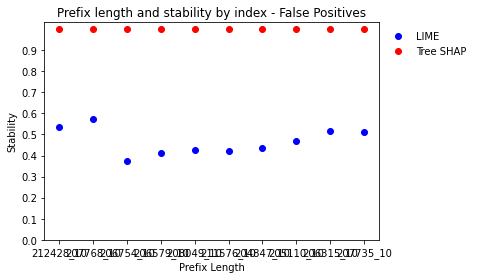

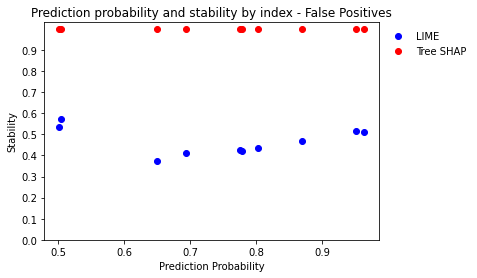

Bucket 11
True Negatives
Average LIME Stability: 0.47052145214521446
Average SHAP Stability: 1.0


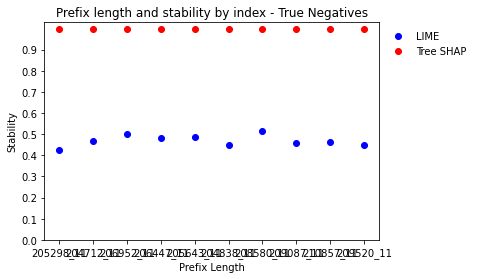

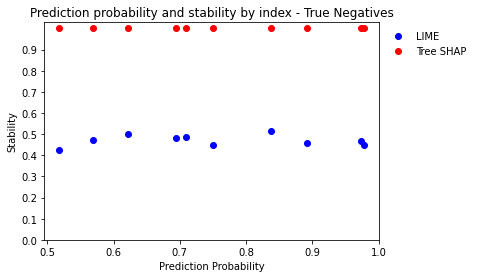

True Positives
Average LIME Stability: 0.46343894389438944
Average SHAP Stability: 1.0


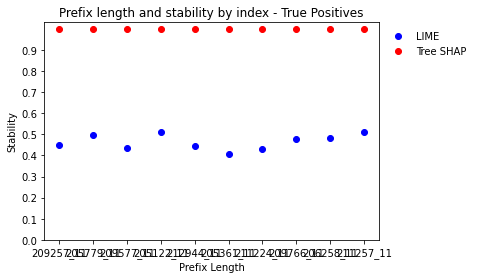

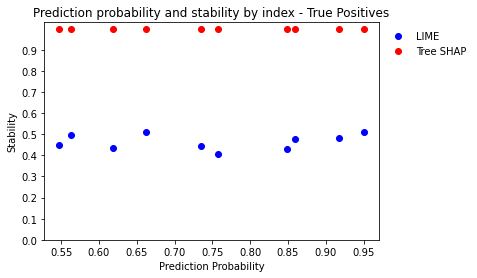

False Negatives
Average LIME Stability: 0.4937227722772277
Average SHAP Stability: 1.0


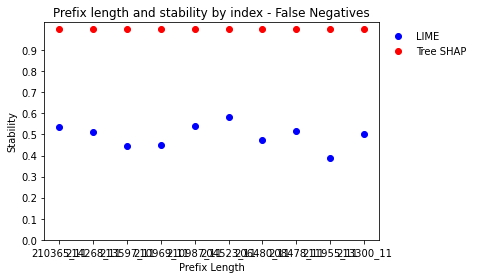

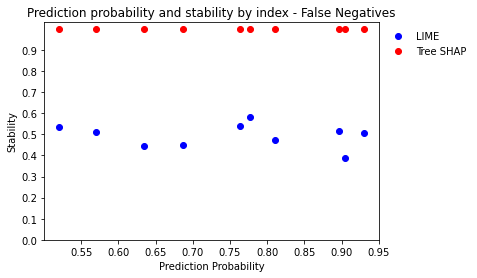

False Positives
Average LIME Stability: 0.49005940594059405
Average SHAP Stability: 1.0


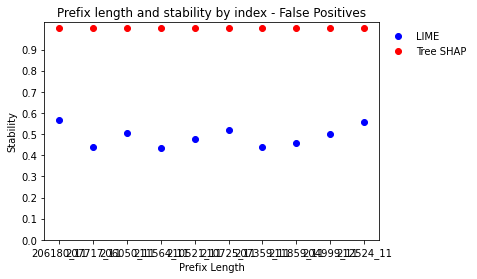

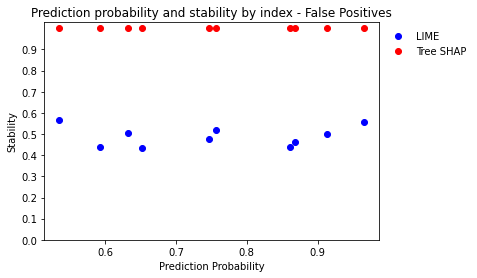

Bucket 12
True Negatives
Average LIME Stability: 0.45928712871287125
Average SHAP Stability: 1.0


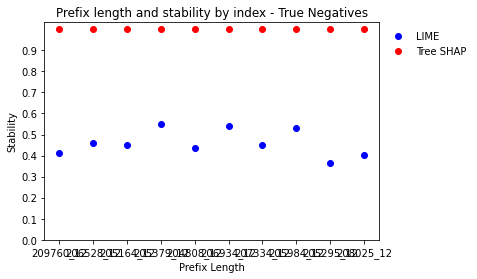

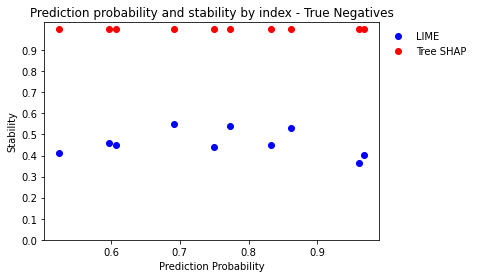

True Positives
Average LIME Stability: 0.483953795379538
Average SHAP Stability: 1.0


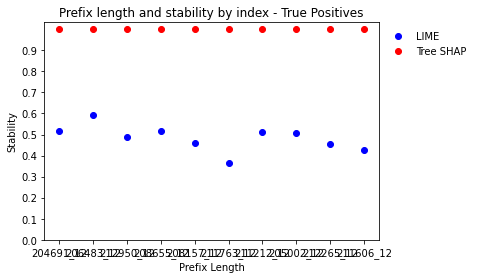

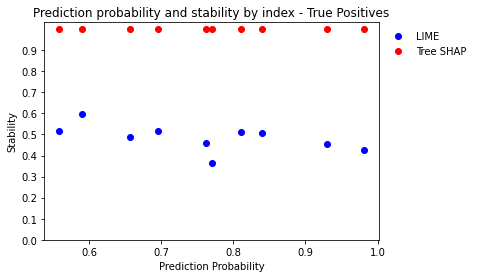

False Negatives
Average LIME Stability: 0.45366996699669965
Average SHAP Stability: 1.0


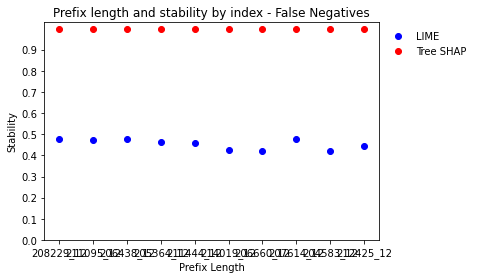

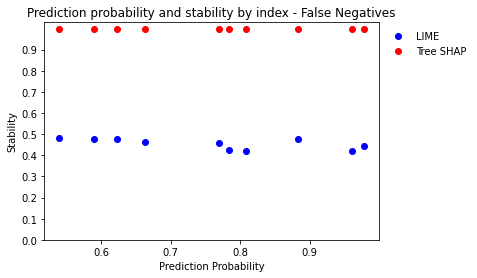

False Positives
Average LIME Stability: 0.44878547854785483
Average SHAP Stability: 1.0


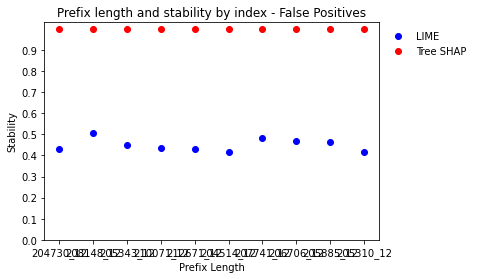

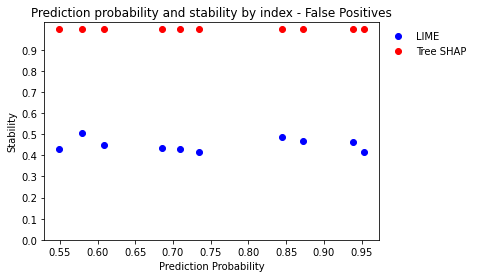

Bucket 13
True Negatives
Average LIME Stability: 0.46771428571428575
Average SHAP Stability: 1.0


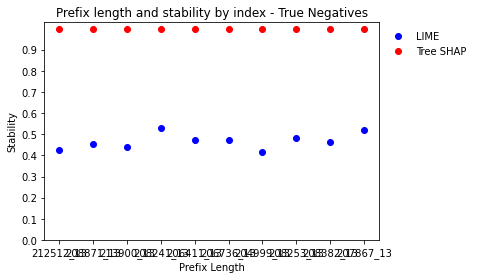

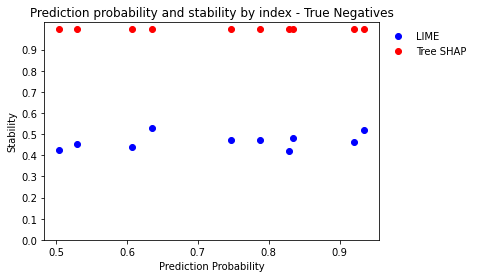

True Positives
Average LIME Stability: 0.4713650793650794
Average SHAP Stability: 1.0


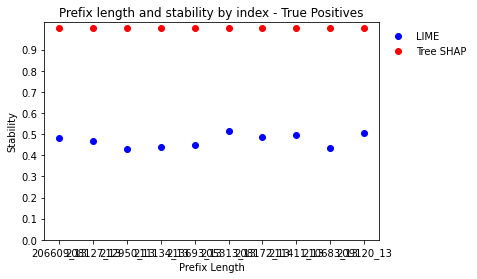

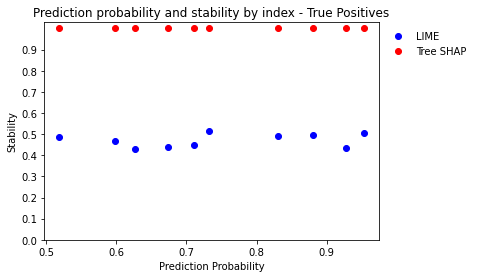

False Negatives
Average LIME Stability: 0.458952380952381
Average SHAP Stability: 1.0


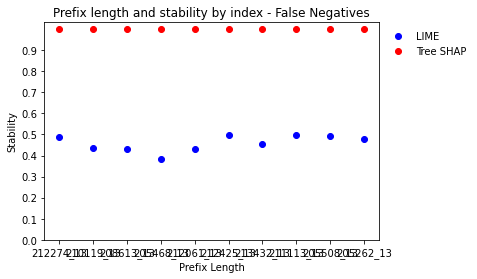

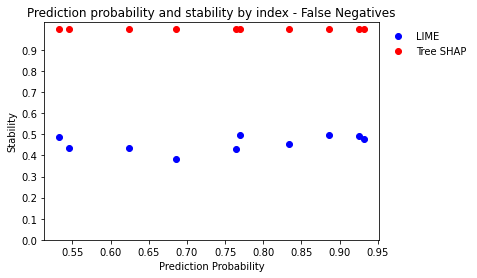

False Positives
Average LIME Stability: 0.46990476190476194
Average SHAP Stability: 1.0


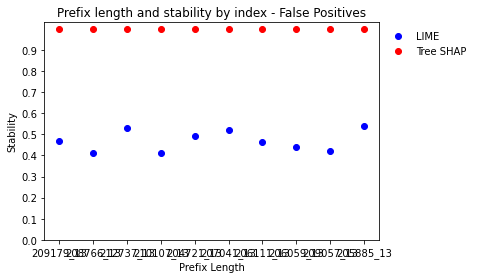

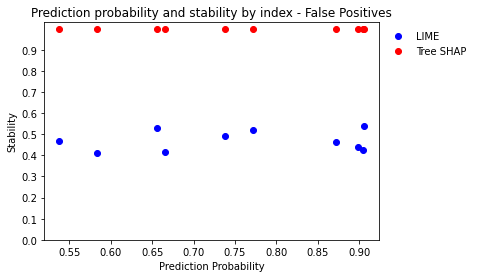

Bucket 14
True Negatives
Average LIME Stability: 0.517090909090909
Average SHAP Stability: 1.0


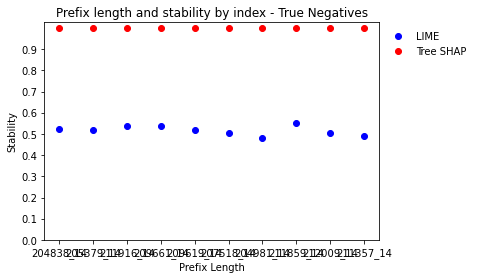

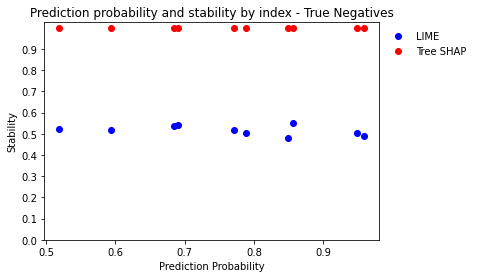

True Positives
Average LIME Stability: 0.5313939393939393
Average SHAP Stability: 1.0


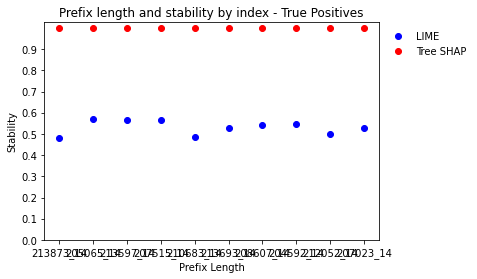

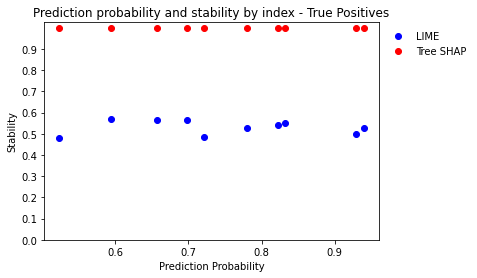

False Negatives
Average LIME Stability: 0.5105454545454544
Average SHAP Stability: 1.0


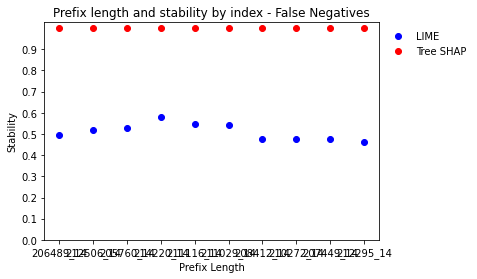

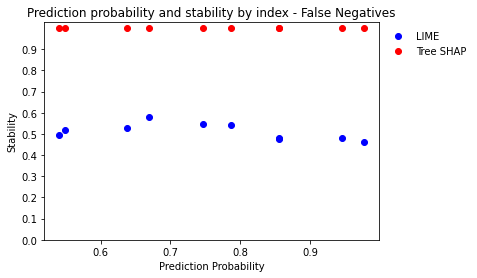

False Positives
Average LIME Stability: 0.5107878787878787
Average SHAP Stability: 1.0


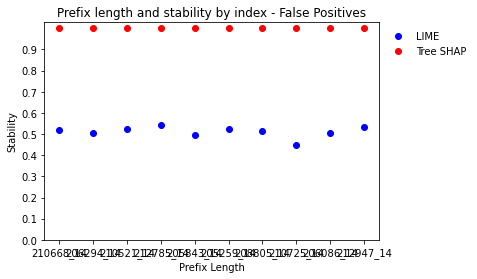

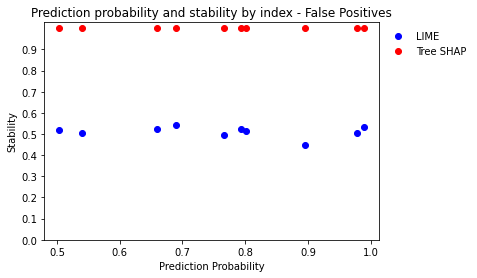

Bucket 15
True Negatives
Average LIME Stability: 0.5461309523809523
Average SHAP Stability: 1.0


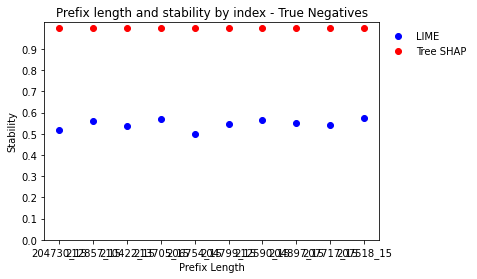

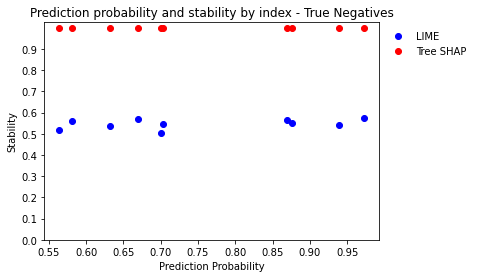

True Positives
Average LIME Stability: 0.5446785714285715
Average SHAP Stability: 1.0


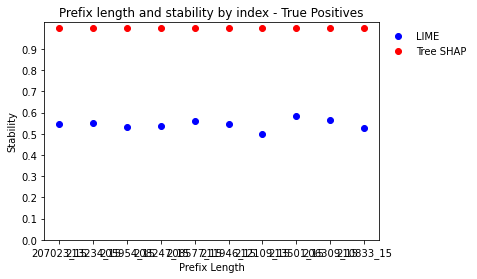

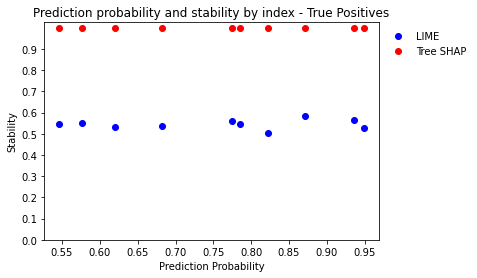

False Negatives
Average LIME Stability: 0.5412896825396826
Average SHAP Stability: 1.0


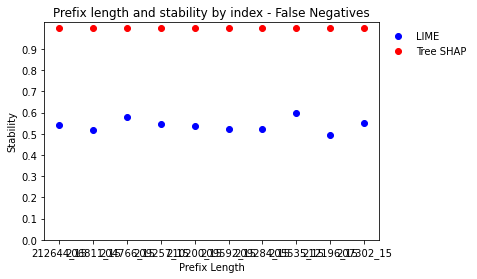

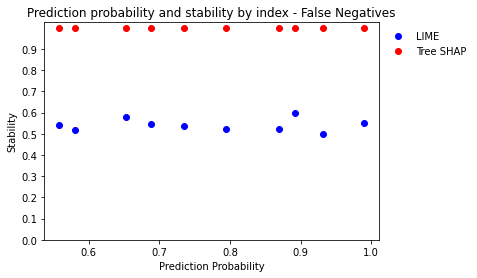

False Positives
Average LIME Stability: 0.5533928571428571
Average SHAP Stability: 1.0


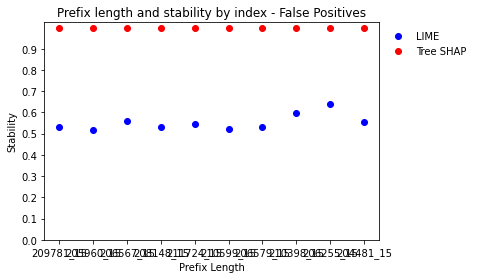

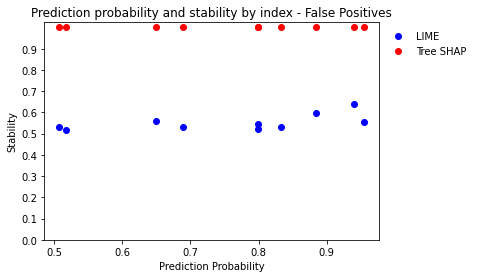

Bucket 16
True Negatives
Average LIME Stability: 0.6707936507936507
Average SHAP Stability: 1.0


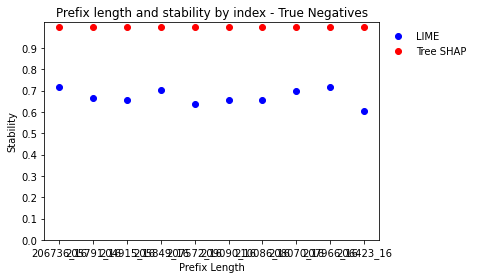

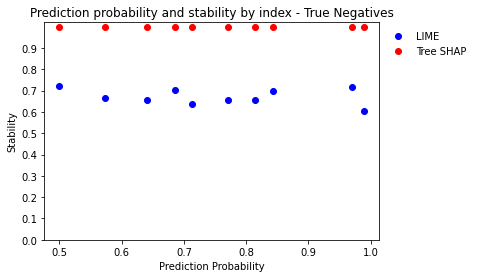

True Positives
Average LIME Stability: 0.6470714285714285
Average SHAP Stability: 1.0


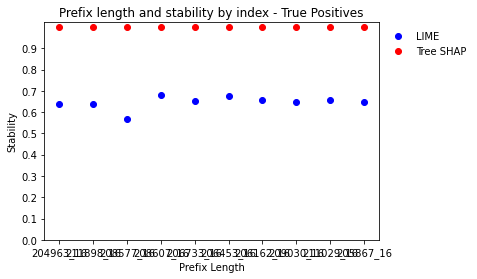

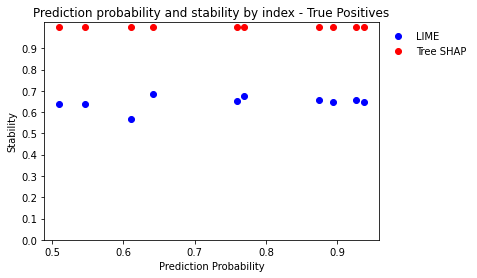

False Negatives
Average LIME Stability: 0.6490079365079364
Average SHAP Stability: 1.0


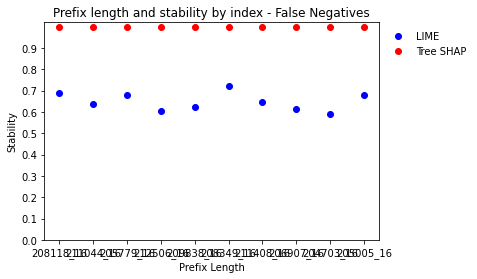

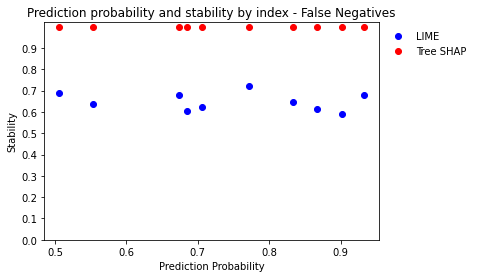

False Positives
Average LIME Stability: 0.6470714285714285
Average SHAP Stability: 1.0


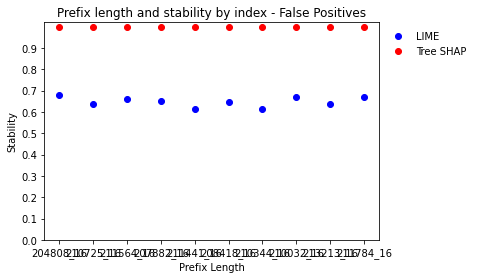

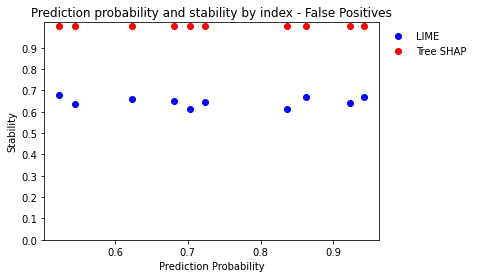

Bucket 17
True Negatives
Average LIME Stability: 0.6806939571150097
Average SHAP Stability: 1.0


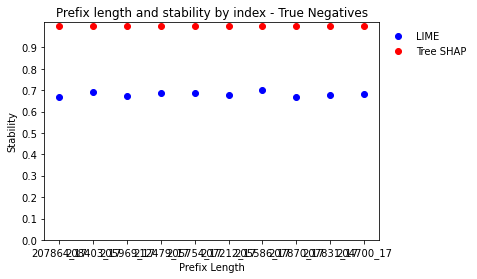

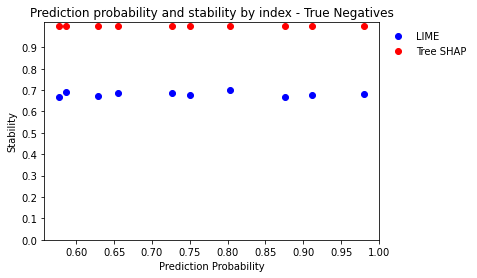

True Positives
Average LIME Stability: 0.6782768031189084
Average SHAP Stability: 1.0


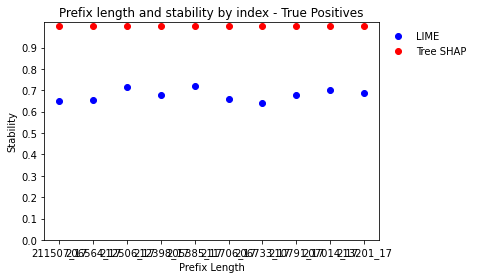

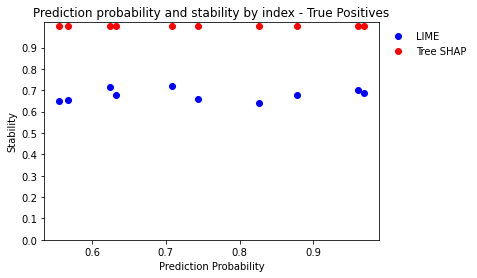

False Negatives
Average LIME Stability: 0.6748927875243664
Average SHAP Stability: 1.0


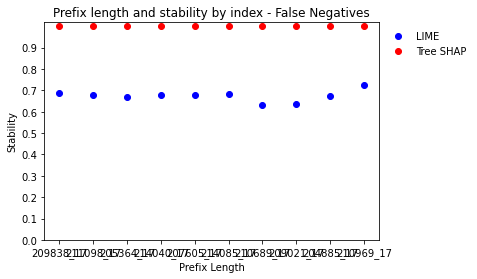

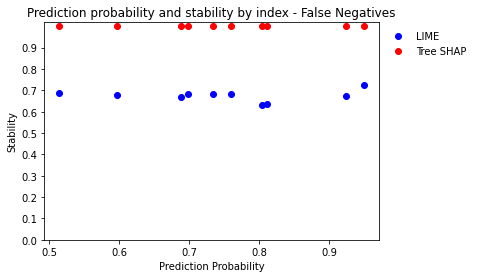

False Positives
Average LIME Stability: 0.6765847953216374
Average SHAP Stability: 1.0


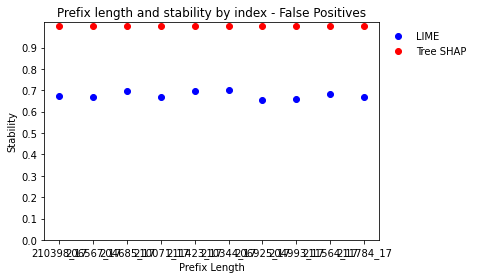

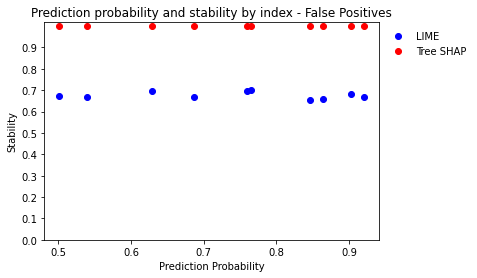

Bucket 18
True Negatives
Average LIME Stability: 0.6381666666666667
Average SHAP Stability: 1.0


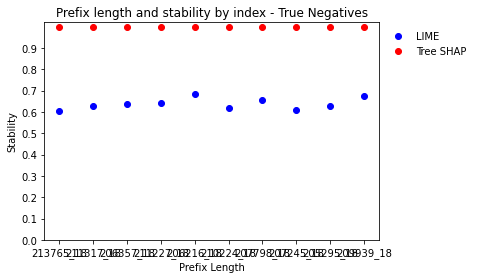

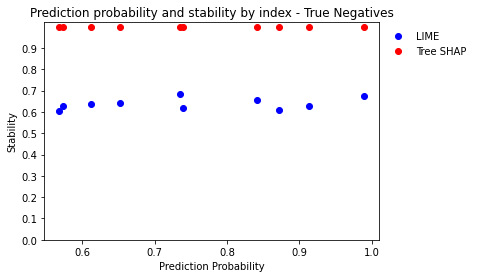

True Positives
Average LIME Stability: 0.6396111111111111
Average SHAP Stability: 1.0


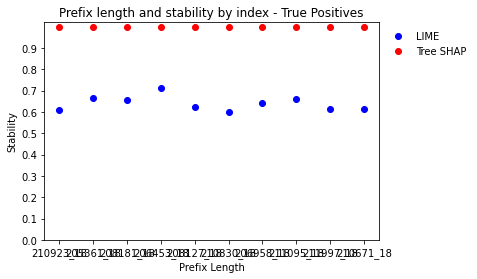

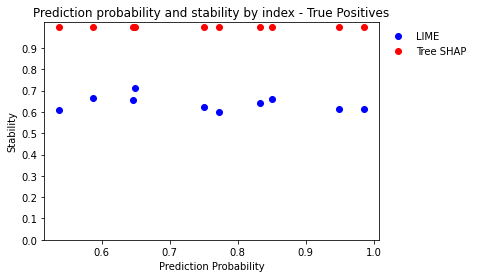

False Negatives
Average LIME Stability: 0.6379259259259259
Average SHAP Stability: 1.0


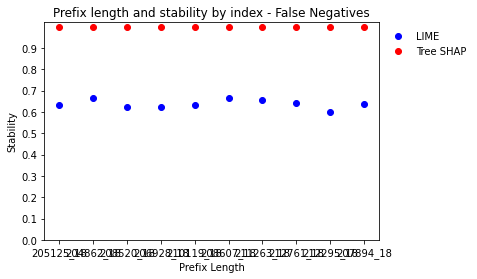

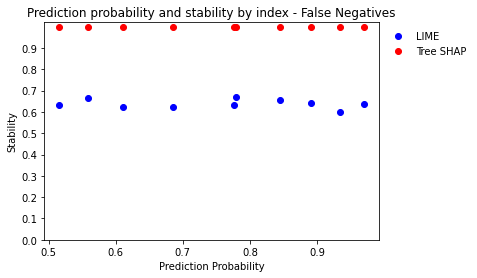

False Positives
Average LIME Stability: 0.6434629629629629
Average SHAP Stability: 1.0


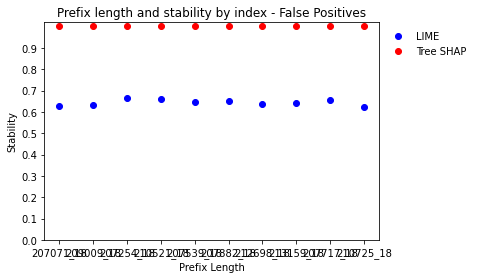

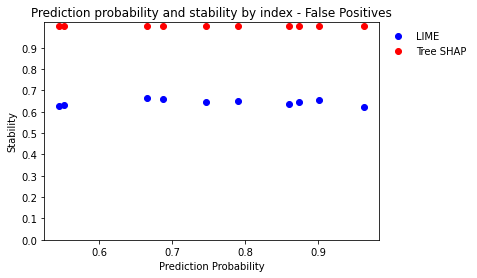

Bucket 19
True Negatives
Average LIME Stability: 0.6395996326905418
Average SHAP Stability: 1.0


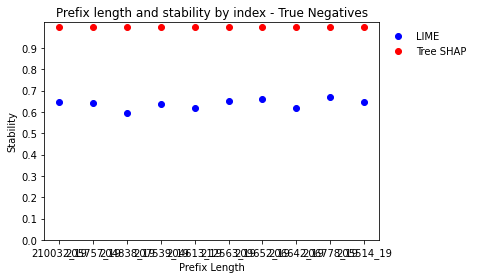

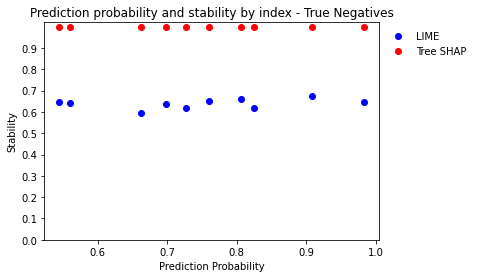

True Positives
Average LIME Stability: 0.635269054178145
Average SHAP Stability: 1.0


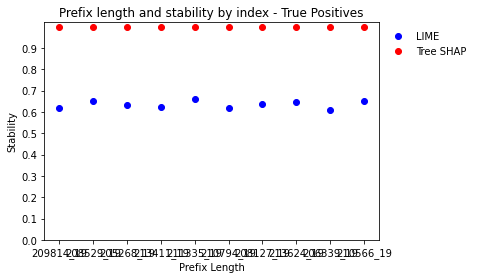

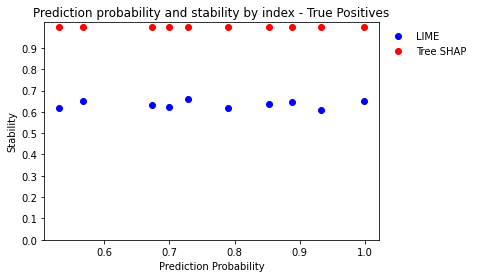

False Negatives
Average LIME Stability: 0.6381561065197429
Average SHAP Stability: 1.0


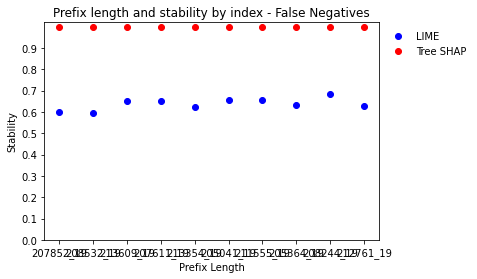

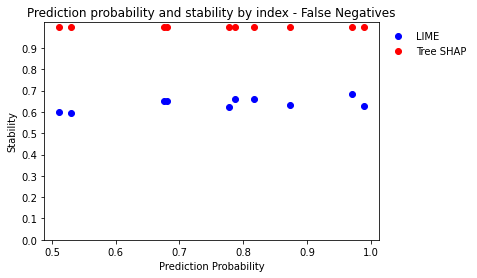

False Positives
Average LIME Stability: 0.6203526170798898
Average SHAP Stability: 1.0


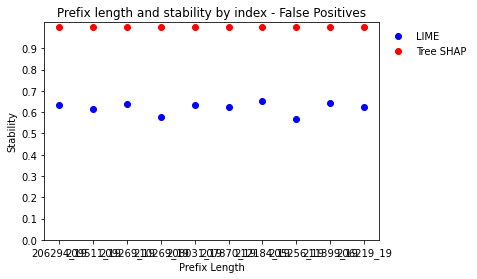

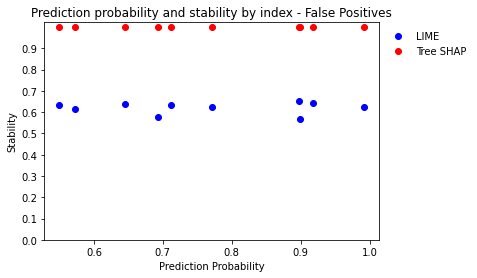

Bucket 20
True Negatives
Average LIME Stability: 0.6316368563685637
Average SHAP Stability: 1.0


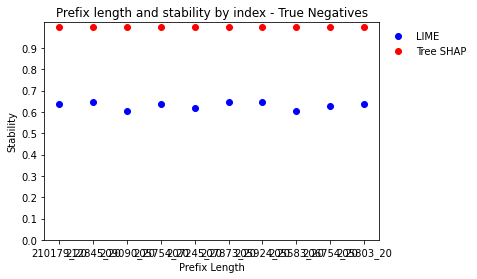

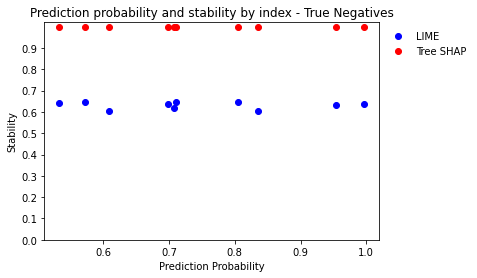

True Positives
Average LIME Stability: 0.6525420054200541
Average SHAP Stability: 1.0


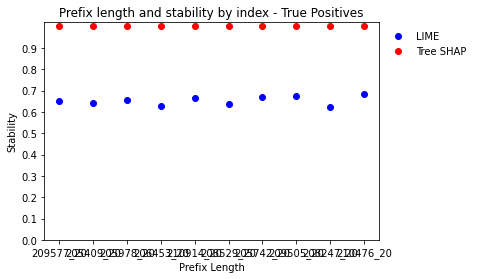

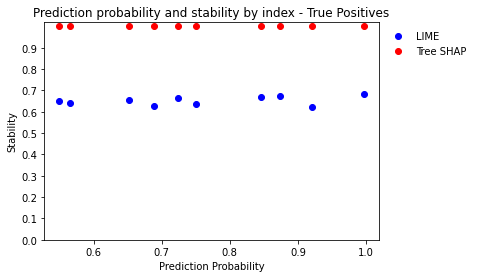

False Negatives
Average LIME Stability: 0.6299548328816621
Average SHAP Stability: 1.0


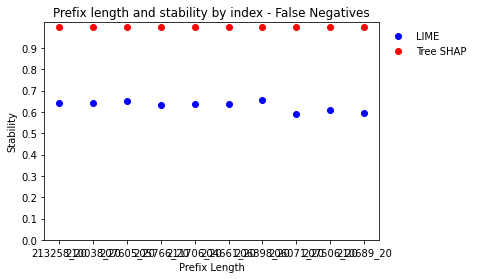

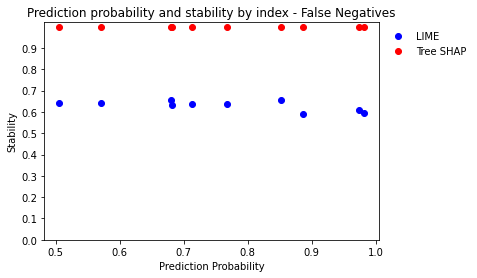

False Positives
Average LIME Stability: 0.6270713640469738
Average SHAP Stability: 1.0


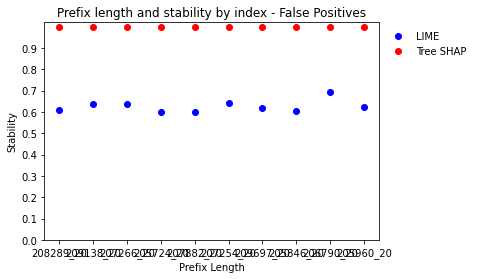

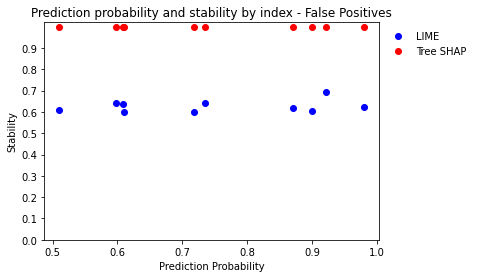

Bucket 21
True Negatives
Average LIME Stability: 0.6498709677419354
Average SHAP Stability: 1.0


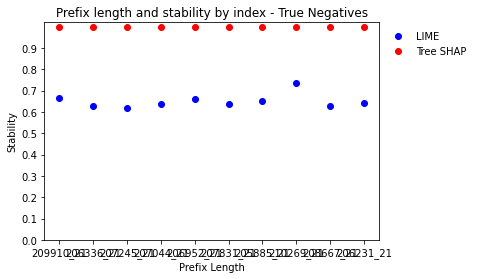

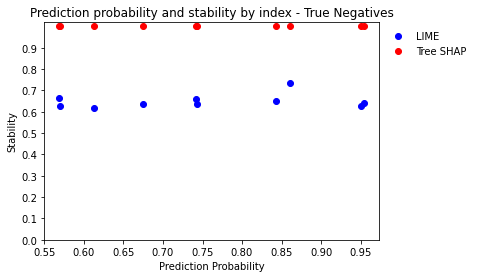

True Positives
Average LIME Stability: 0.6589964157706093
Average SHAP Stability: 1.0


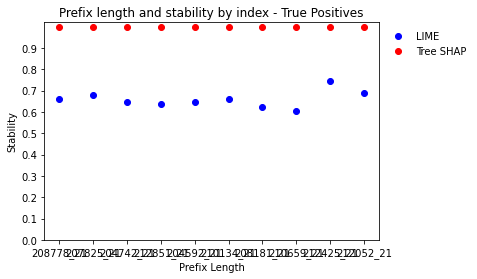

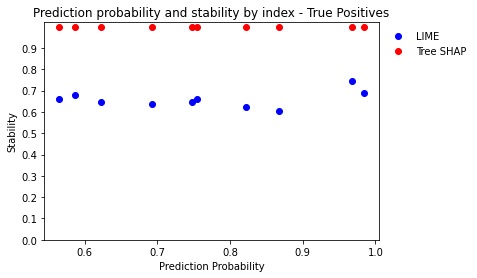

False Negatives
Average LIME Stability: 0.6544336917562724
Average SHAP Stability: 1.0


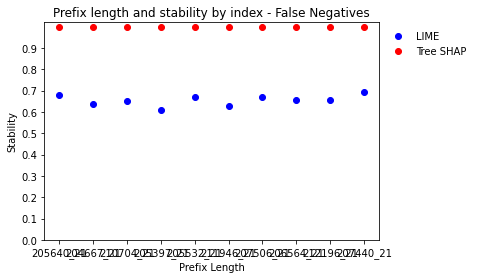

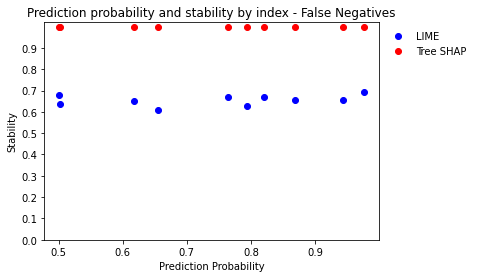

False Positives
Average LIME Stability: 0.6762867383512544
Average SHAP Stability: 1.0


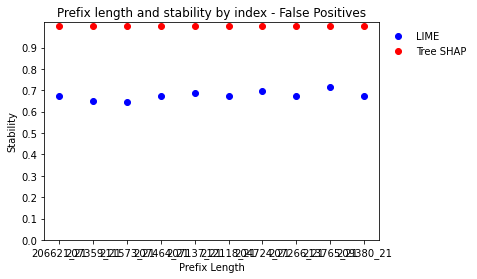

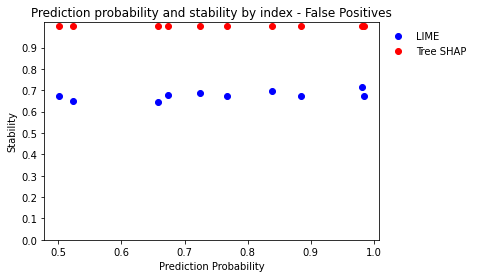

Bucket 22
True Negatives
Average LIME Stability: 0.7060645161290322
Average SHAP Stability: 1.0


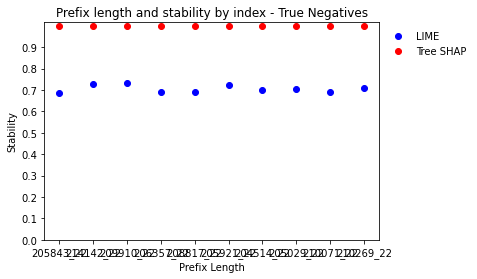

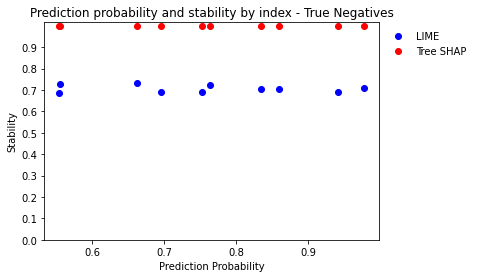

True Positives
Average LIME Stability: 0.707505376344086
Average SHAP Stability: 1.0


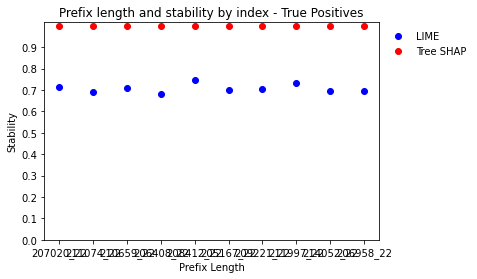

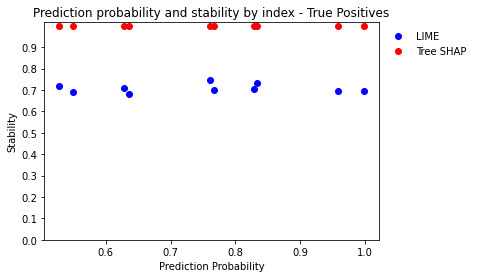

False Negatives
Average LIME Stability: 0.7305591397849462
Average SHAP Stability: 1.0


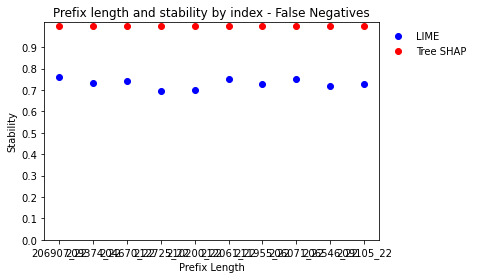

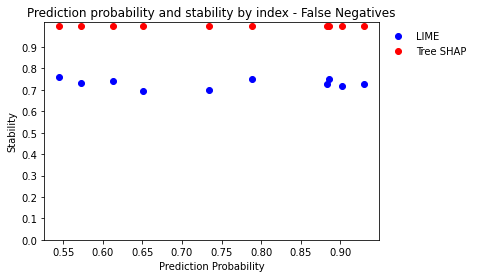

False Positives
Average LIME Stability: 0.7082258064516129
Average SHAP Stability: 1.0


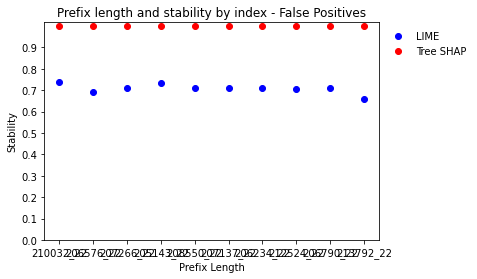

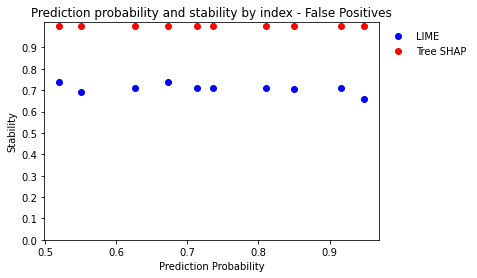

Bucket 23
True Negatives
Average LIME Stability: 0.709426523297491
Average SHAP Stability: 1.0


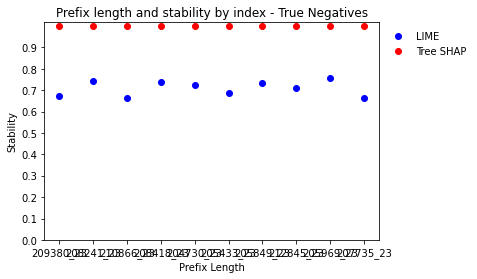

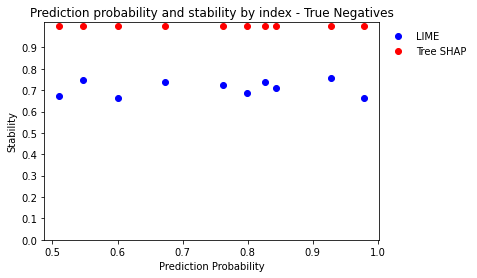

True Positives
Average LIME Stability: 0.7027025089605734
Average SHAP Stability: 1.0


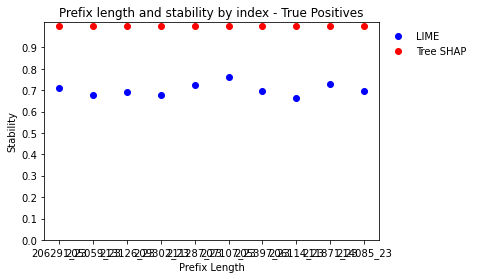

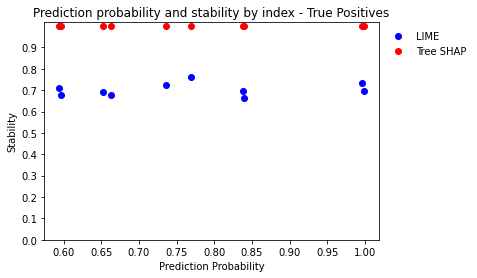

False Negatives
Average LIME Stability: 0.7125483870967741
Average SHAP Stability: 1.0


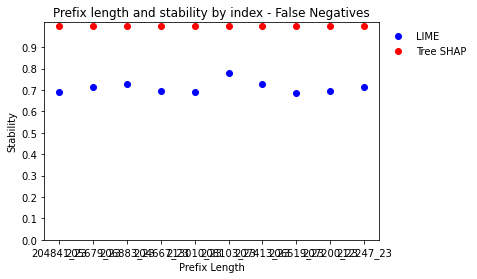

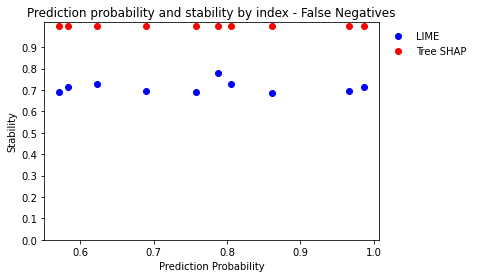

False Positives
Average LIME Stability: 0.7120681003584228
Average SHAP Stability: 1.0


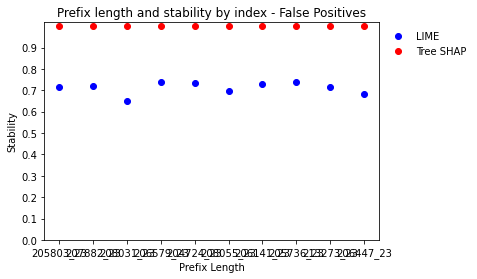

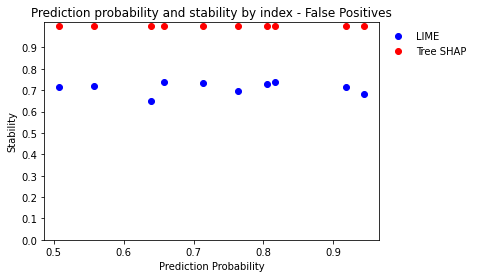

Bucket 24
True Negatives
Average LIME Stability: 0.7504910394265233
Average SHAP Stability: 1.0


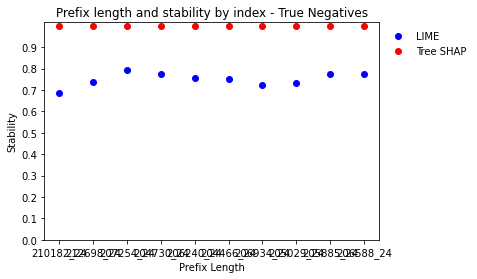

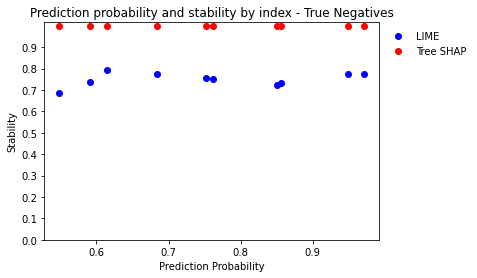

True Positives
Average LIME Stability: 0.7276774193548387
Average SHAP Stability: 1.0


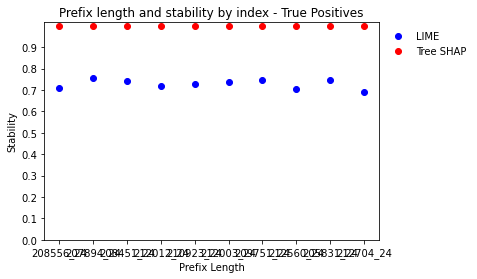

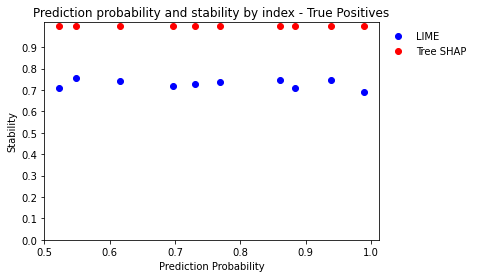

False Negatives
Average LIME Stability: 0.7365627240143369
Average SHAP Stability: 1.0


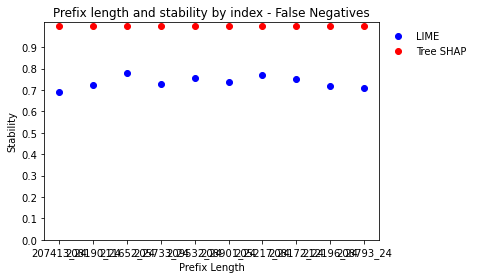

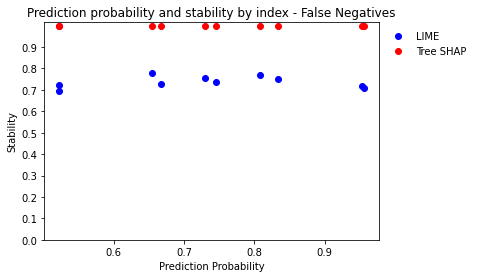

False Positives
Average LIME Stability: 0.7317598566308243
Average SHAP Stability: 1.0


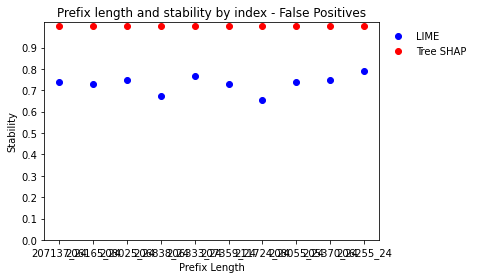

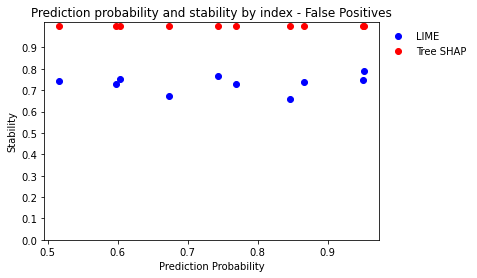

Bucket 25
True Negatives
Average LIME Stability: 0.6352222222222221
Average SHAP Stability: 1.0


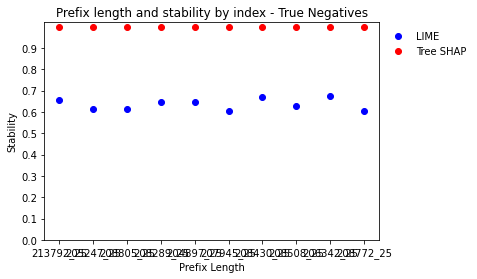

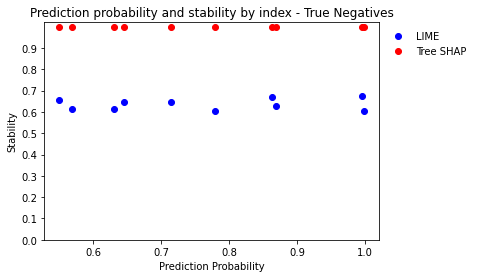

True Positives
Average LIME Stability: 0.648189964157706
Average SHAP Stability: 1.0


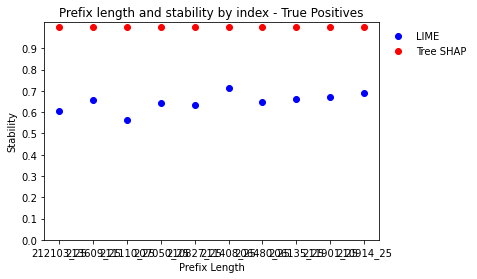

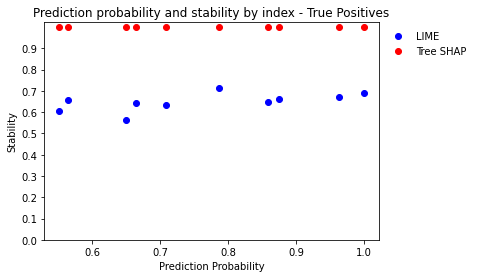

False Negatives
Average LIME Stability: 0.6448279569892473
Average SHAP Stability: 1.0


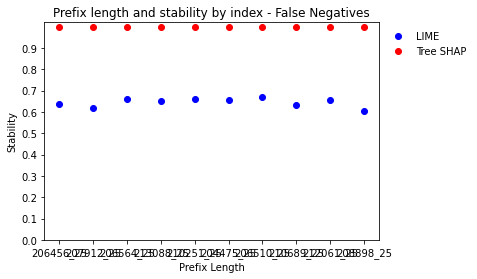

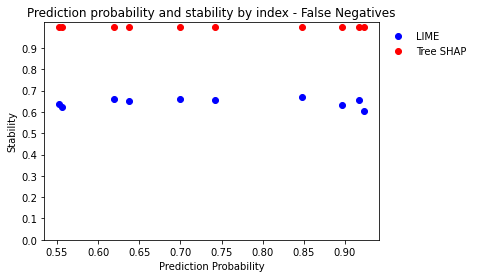

False Positives
Average LIME Stability: 0.6597168458781362
Average SHAP Stability: 1.0


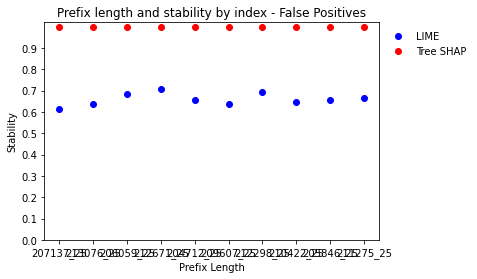

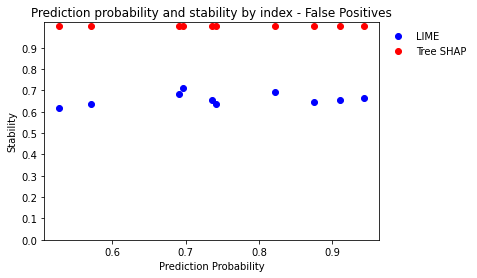

In [5]:
all_caseID = []
all_lengths = []
all_proba = []
all_lime_stab = []
all_shap_stab = []

for dataset_name in datasets:

    dataset_manager = DatasetManager(dataset_name)

    for ii in range(n_iter):
        num_buckets = len([name for name in os.listdir(os.path.join(PATH,'%s/%s_%s/models'% (dataset_ref, cls_method, method_name)))])
        
        if num_buckets < max_prefix:
            max_prefix = num_buckets
            
        buckets = range(0, max_prefix, gap)

        for bucket in buckets:
            bucketID = bucket+1
            print ('Bucket', bucketID)

            #import everything needed to sort and predict
            feat_comb_path = os.path.join(PATH, "%s/%s_%s/bucketers_and_encoders/feature_combiner_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls_path = os.path.join(PATH, "%s/%s_%s/models/cls_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls = joblib.load(cls_path)
            feature_combiner = joblib.load(feat_comb_path)

            #import previously identified samples
            tn_path = os.path.join(PATH, "%s/%s_%s/samples/true_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            tp_path = os.path.join(PATH, "%s/%s_%s/samples/true_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fn_path = os.path.join(PATH, "%s/%s_%s/samples/false_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fp_path = os.path.join(PATH, "%s/%s_%s/samples/false_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))

            sample_instances = []

            with open (tn_path, 'rb') as f:
                tn_list = pickle.load(f)
            with open (tp_path, 'rb') as f:
                tp_list = pickle.load(f)
            with open (fn_path, 'rb') as f:
                fn_list = pickle.load(f)
            with open (fp_path, 'rb') as f:
                fp_list = pickle.load(f)

            #save results to a list
            sample_instances.append(tn_list)
            sample_instances.append(tp_list)
            sample_instances.append(fn_list)
            sample_instances.append(fp_list)
            
            type_list = ["True Negatives", "True Positives", "False Negatives", "False Positives"]
            
            for i in range(len(sample_instances)):
                print (type_list[i])
                data = pd.DataFrame.from_records(sample_instances[i])
                
                case_id = pd.Series(data['caseID'])
                nr_events = pd.Series(data['nr_events'])
                proba = pd.Series(data['proba'])
                lime_stability = pd.Series(data['lime_stability'])
                tree_shap_stability = pd.Series(data['tree_shap_stability'])
                
                all_caseID.extend(case_id)
                all_lengths.extend(nr_events)
                all_proba.extend(proba)
                all_lime_stab.extend(lime_stability)
                all_shap_stab.extend(tree_shap_stability)
                
                print("Average LIME Stability:", statistics.mean(lime_stability))
                print("Average SHAP Stability:", statistics.mean(tree_shap_stability))
                
                fig, ax = plt.subplots()
                ax.plot(case_id, lime_stability, 'bo', label = "LIME")
                ax.plot(case_id, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax.set_xlabel("Prefix Length")
                ax.set_ylabel("Stability")
                ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.yticks(np.arange(0,1, 0.1))
                plt.title("Prefix length and stability by index - "+type_list[i])
                plt.show()
                
                fig2, ax2 = plt.subplots()
                ax2.plot(proba, lime_stability, 'bo', label = "LIME")
                ax2.plot(proba, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax2.set_xlabel("Prediction Probability")
                ax2.set_ylabel("Stability")
                ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.yticks(np.arange(0,1, 0.1))
                plt.title("Prediction probability and stability by index - "+type_list[i])
                plt.show()

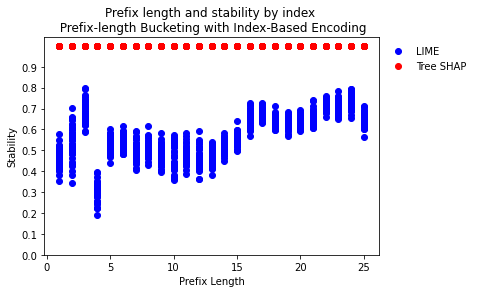

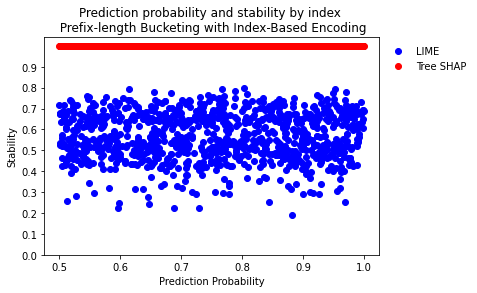

In [6]:
fig, ax = plt.subplots()
ax.plot(all_lengths, all_lime_stab, 'bo', label = "LIME")
ax.plot(all_lengths, all_shap_stab, 'ro', label = "Tree SHAP")
ax.set_xlabel("Prefix Length")
ax.set_ylabel("Stability")
ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,1, 0.1))
plt.title("Prefix length and stability by index \n Prefix-length Bucketing with Index-Based Encoding")
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(all_proba, all_lime_stab, 'bo', label = "LIME")
ax2.plot(all_proba, all_shap_stab, 'ro', label = "Tree SHAP")
ax2.set_xlabel("Prediction Probability")
ax2.set_ylabel("Stability")
ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
plt.yticks(np.arange(0,1, 0.1))
plt.title("Prediction probability and stability by index \n Prefix-length Bucketing with Index-Based Encoding")
plt.show()

Bucket 1
True Negatives
Average LIME Weights Stability: 0.09574170288938298
Average SHAP Weights Stability: 1.8421334110691018e-16
10


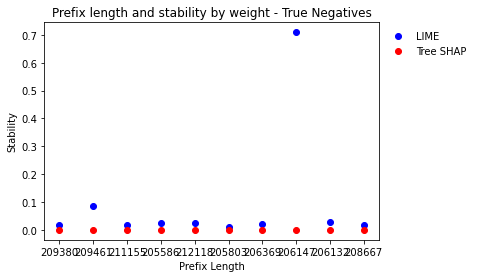

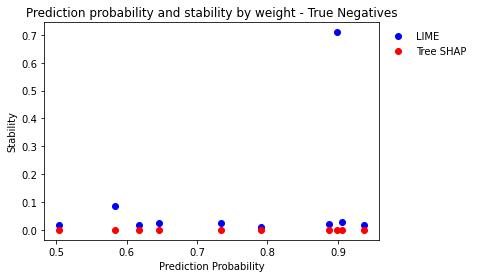

True Positives
Average LIME Weights Stability: 0.02842522701552794
Average SHAP Weights Stability: 1.2638139352585207e-16
10


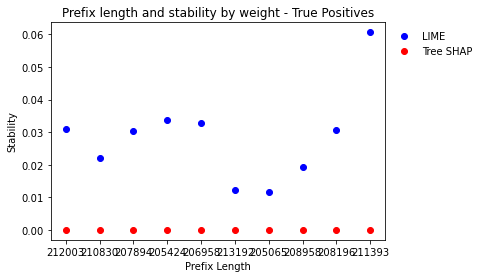

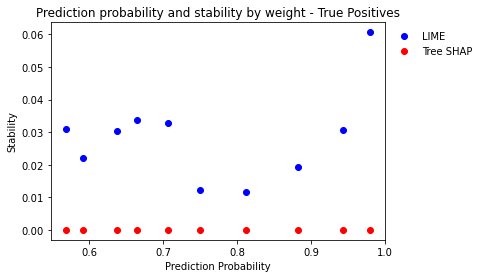

False Negatives
Average LIME Weights Stability: 0.02212193562933297
Average SHAP Weights Stability: 1.1041807030467187e-16
10


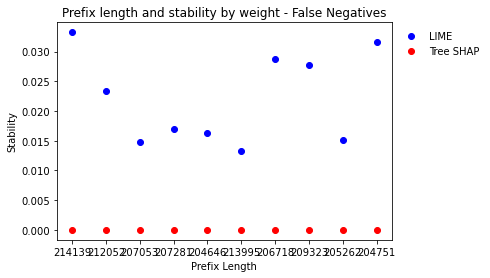

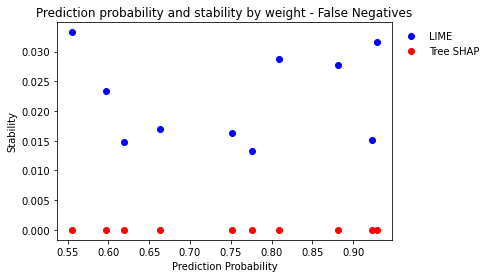

False Positives
Average LIME Weights Stability: 0.04074740140257238
Average SHAP Weights Stability: 1.514028074872346e-16
10


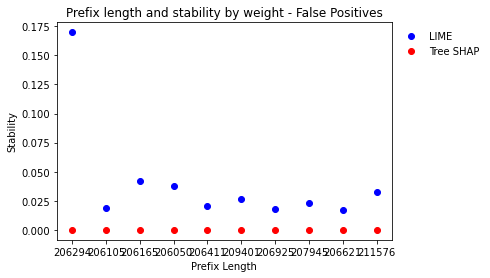

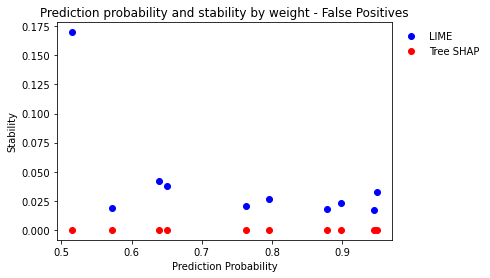

Bucket 2
True Negatives
Average LIME Weights Stability: 0.11620858359999736
Average SHAP Weights Stability: 2.3146398525001757e-16
10


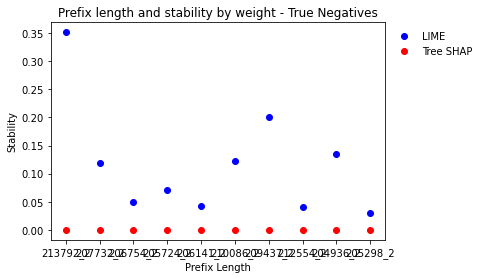

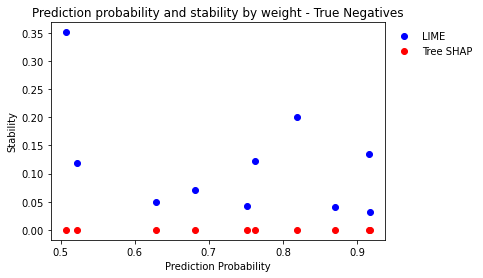

True Positives
Average LIME Weights Stability: 0.34371606149255146
Average SHAP Weights Stability: 2.6847117852029764e-16
10


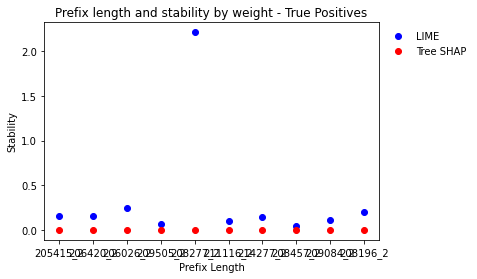

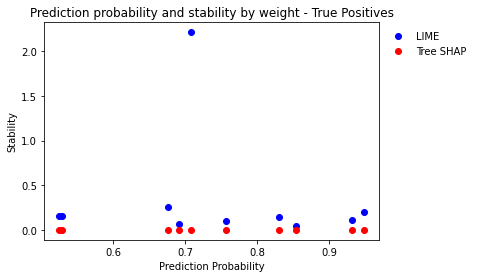

False Negatives
Average LIME Weights Stability: 0.11845417644184342
Average SHAP Weights Stability: 1.5635019885643369e-16
10


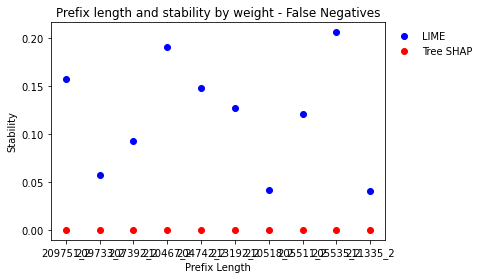

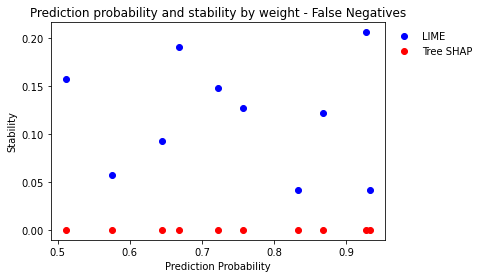

False Positives
Average LIME Weights Stability: 0.1679937670559931
Average SHAP Weights Stability: 2.522536159983123e-16
10


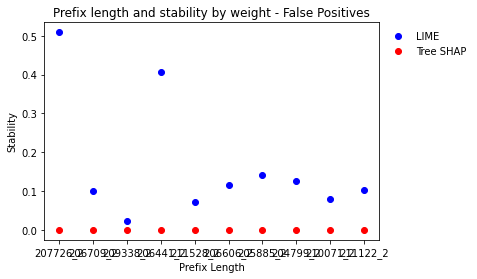

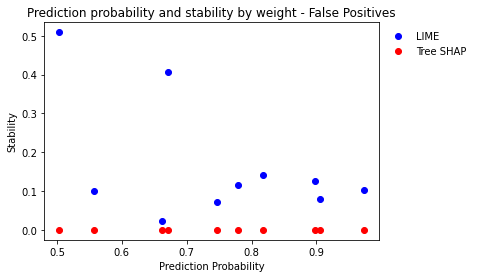

Bucket 3
True Negatives
Average LIME Weights Stability: 0.09786575277367524
Average SHAP Weights Stability: 2.350762804429168e-16
10


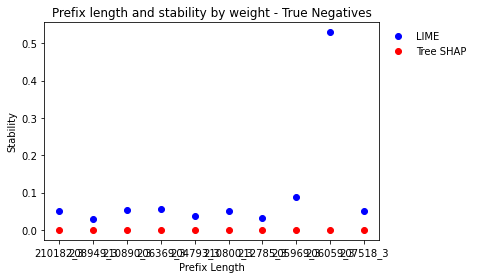

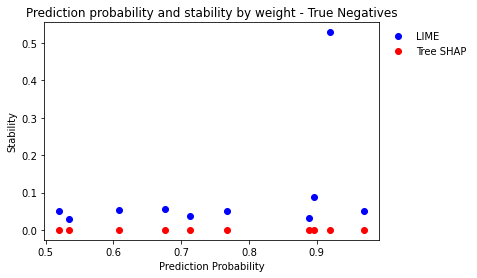

True Positives
Average LIME Weights Stability: 0.07281590281881853
Average SHAP Weights Stability: 2.4848380522620133e-16
10


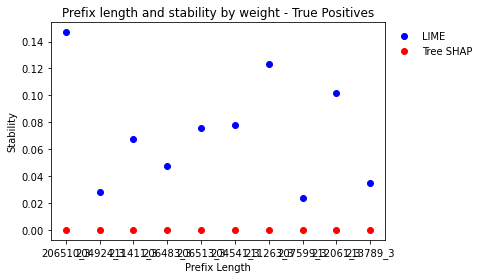

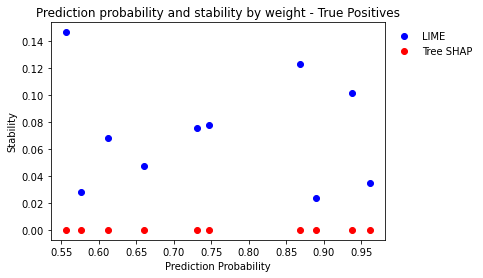

False Negatives
Average LIME Weights Stability: 0.0583254904809313
Average SHAP Weights Stability: 2.550031449486929e-16
10


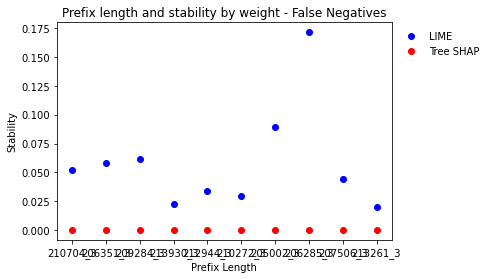

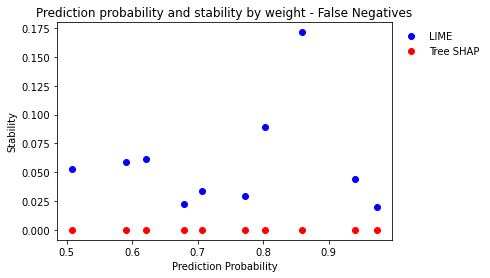

False Positives
Average LIME Weights Stability: 0.0483273354446047
Average SHAP Weights Stability: 1.693669026349364e-16
10


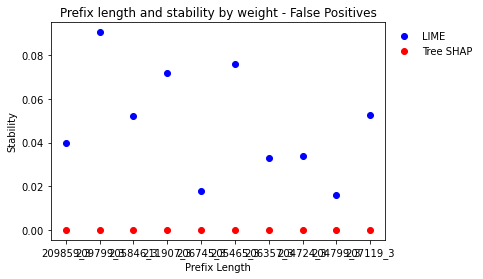

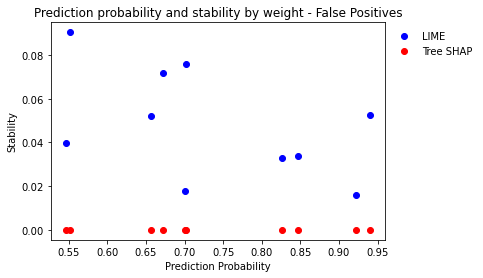

Bucket 4
True Negatives
Average LIME Weights Stability: 0.41468578152911945
Average SHAP Weights Stability: 1.5840740957075112e-16
10


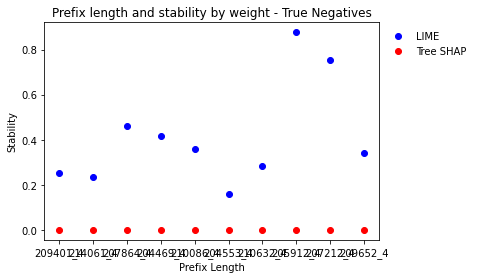

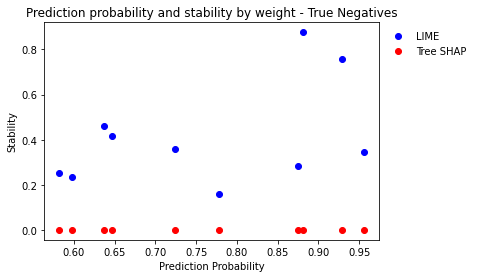

True Positives
Average LIME Weights Stability: 0.3608857554411504
Average SHAP Weights Stability: 1.2687197032583805e-16
10


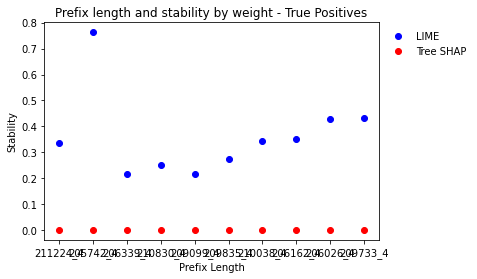

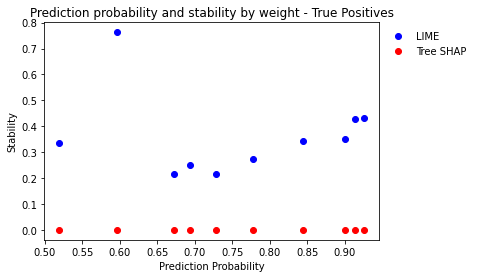

False Negatives
Average LIME Weights Stability: 0.7243969842345805
Average SHAP Weights Stability: 1.3040559330512232e-16
10


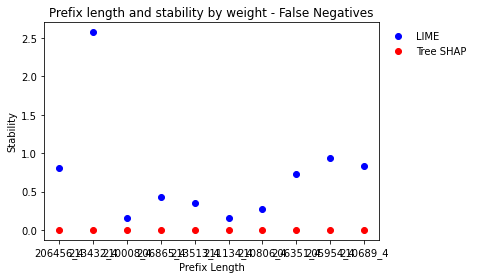

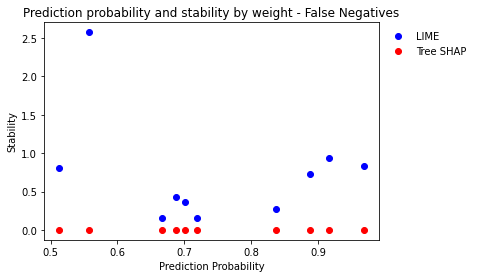

False Positives
Average LIME Weights Stability: 0.5038156173616418
Average SHAP Weights Stability: 1.234259300675678e-16
10


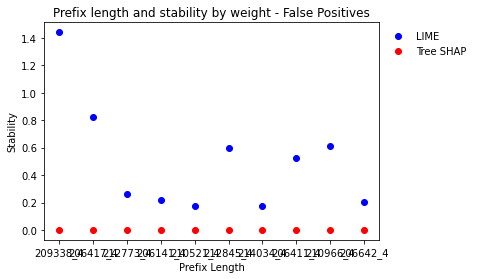

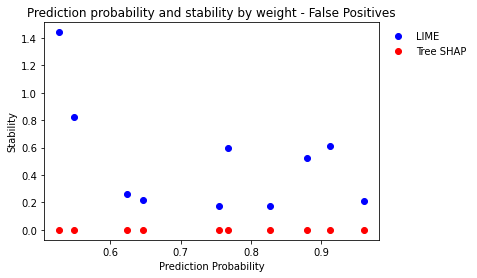

Bucket 5
True Negatives
Average LIME Weights Stability: 0.19261340327963922
Average SHAP Weights Stability: 1.423811255322487e-16
10


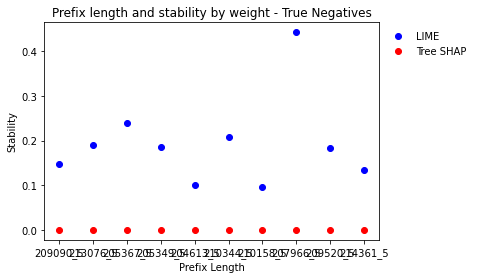

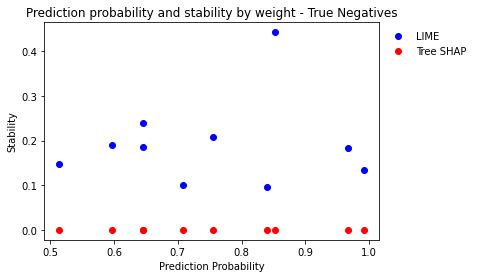

True Positives
Average LIME Weights Stability: 0.32200816991636816
Average SHAP Weights Stability: 1.1808119013800236e-16
10


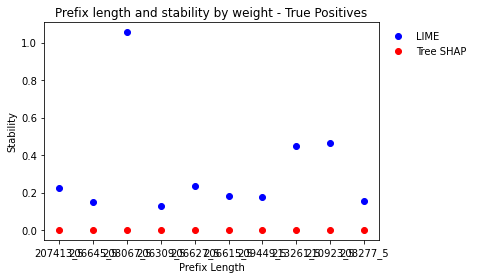

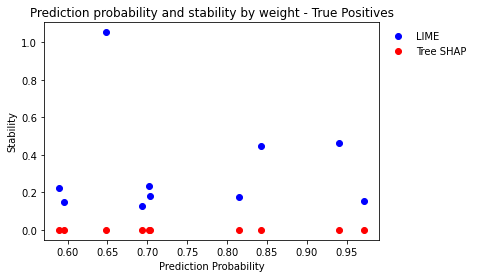

False Negatives
Average LIME Weights Stability: 0.45547089175656474
Average SHAP Weights Stability: 1.0929858033154306e-16
10


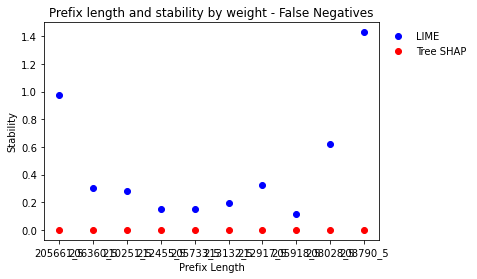

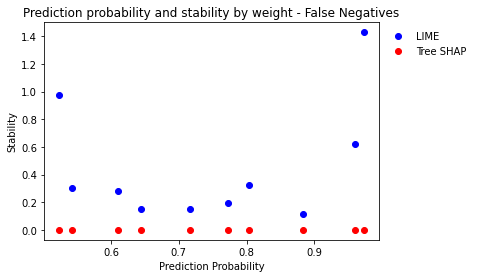

False Positives
Average LIME Weights Stability: 0.32676883644379584
Average SHAP Weights Stability: 1.3764193969220834e-16
10


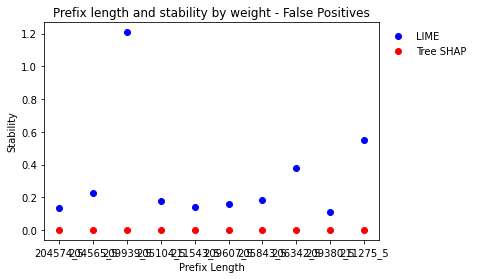

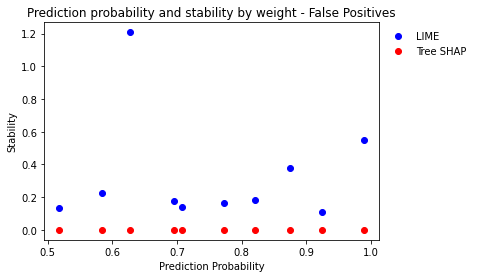

Bucket 6
True Negatives
Average LIME Weights Stability: 0.21459345226803045
Average SHAP Weights Stability: 1.1578569727263152e-16
10


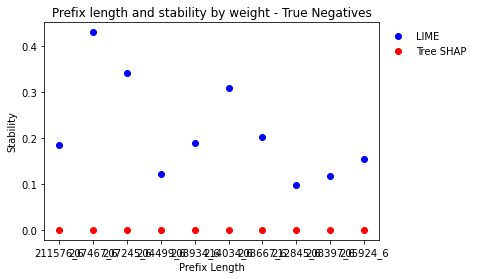

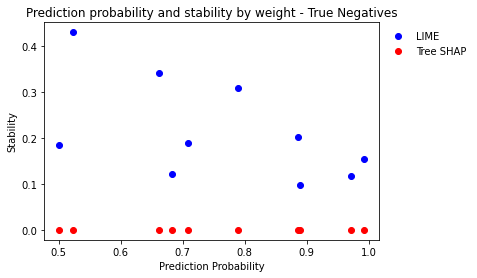

True Positives
Average LIME Weights Stability: 0.19770075984246108
Average SHAP Weights Stability: 1.4833728444363948e-16
10


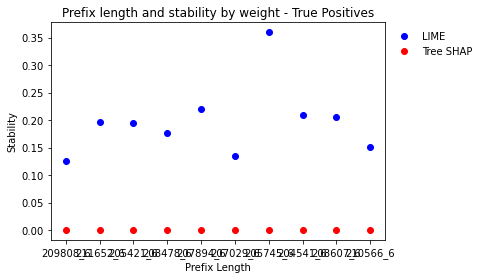

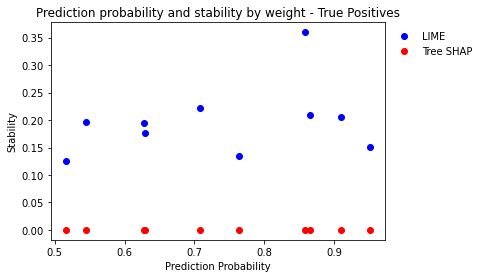

False Negatives
Average LIME Weights Stability: 0.33833131997092236
Average SHAP Weights Stability: 1.3658593248406566e-16
10


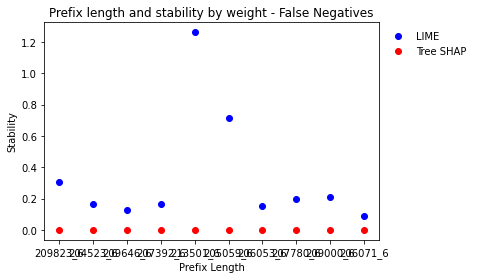

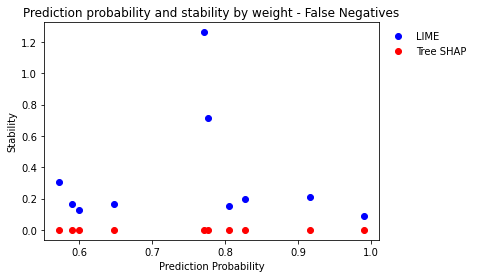

False Positives
Average LIME Weights Stability: 0.6010768036695225
Average SHAP Weights Stability: 1.4038398956448799e-16
10


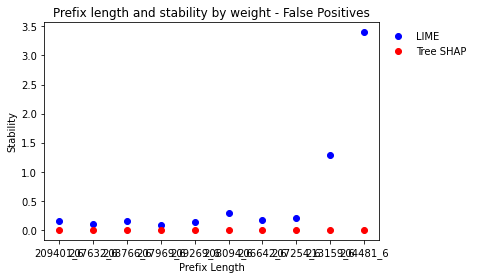

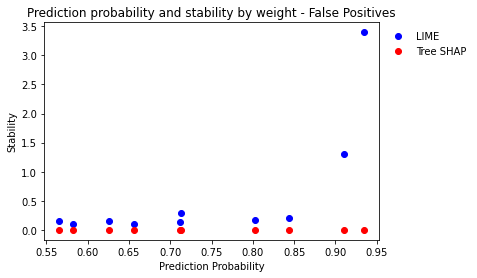

Bucket 7
True Negatives
Average LIME Weights Stability: 0.24779381566383432
Average SHAP Weights Stability: 1.762198883228532e-16
10


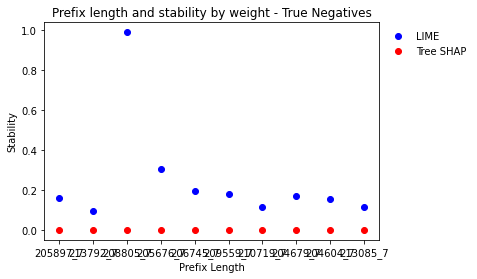

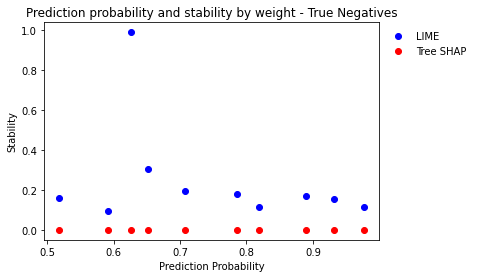

True Positives
Average LIME Weights Stability: 0.8787518304982996
Average SHAP Weights Stability: 1.6022415645202356e-16
10


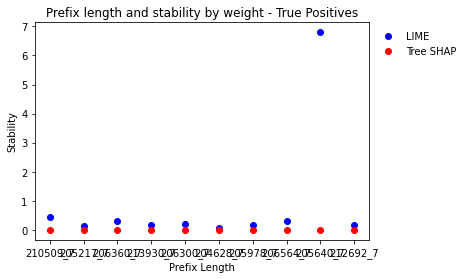

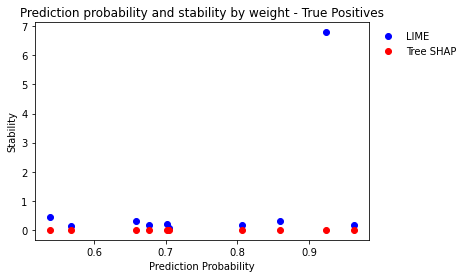

False Negatives
Average LIME Weights Stability: 0.29166639159287233
Average SHAP Weights Stability: 1.2563067159512128e-16
10


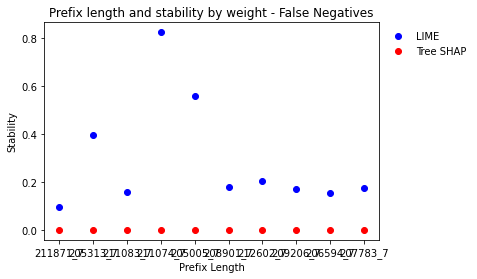

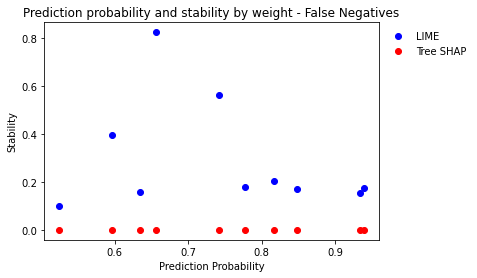

False Positives
Average LIME Weights Stability: 0.24782808992287372
Average SHAP Weights Stability: 1.7868469418920237e-16
10


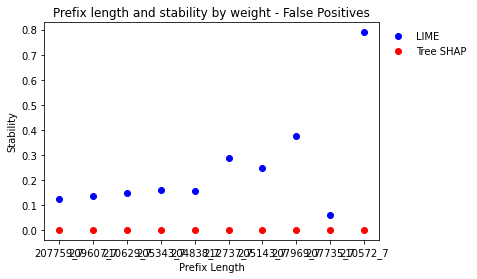

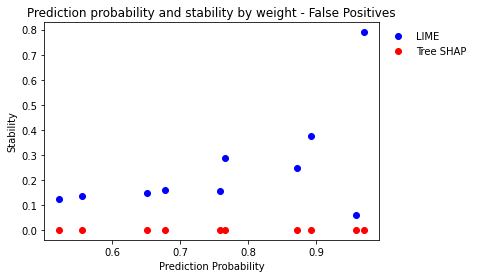

Bucket 8
True Negatives
Average LIME Weights Stability: 0.17658330151940618
Average SHAP Weights Stability: 1.508640763764414e-16
10


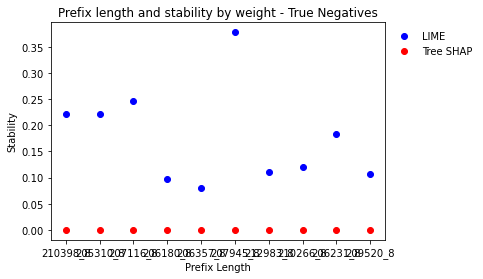

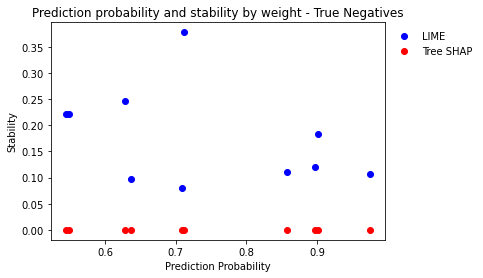

True Positives
Average LIME Weights Stability: 0.152282687155224
Average SHAP Weights Stability: 1.42658644733829e-16
10


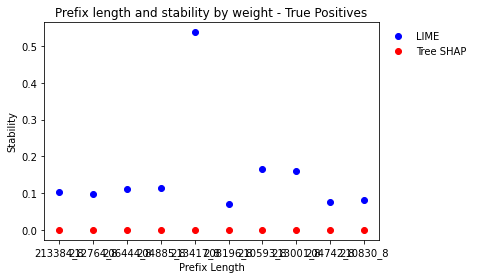

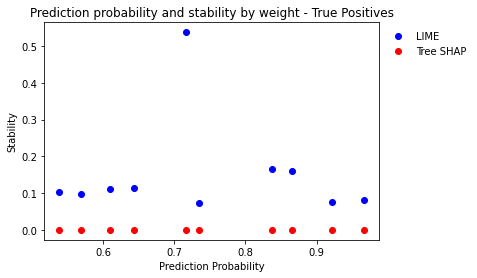

False Negatives
Average LIME Weights Stability: 0.4982829216910602
Average SHAP Weights Stability: 1.3385991840278843e-16
10


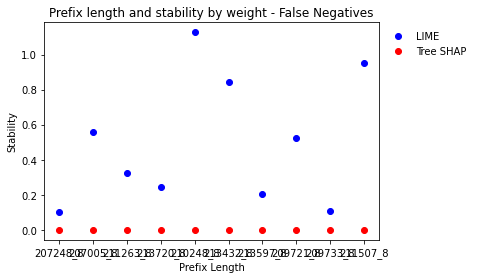

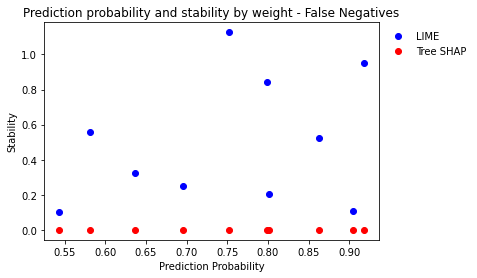

False Positives
Average LIME Weights Stability: 0.14376237820334195
Average SHAP Weights Stability: 9.751867376149443e-17
10


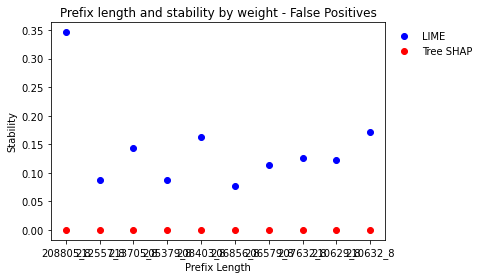

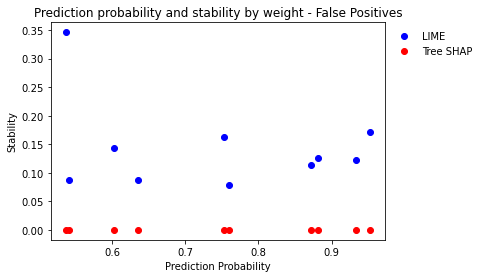

Bucket 9
True Negatives
Average LIME Weights Stability: 0.17094601139898644
Average SHAP Weights Stability: 1.2641255866108357e-16
10


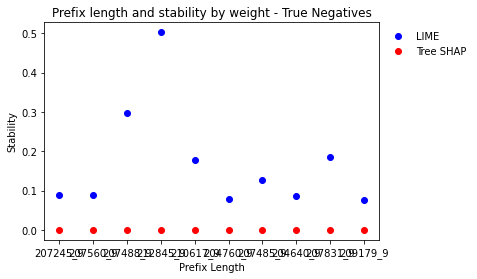

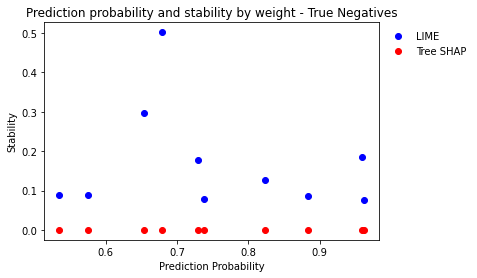

True Positives
Average LIME Weights Stability: 0.32409060278366436
Average SHAP Weights Stability: 1.3048131037598046e-16
10


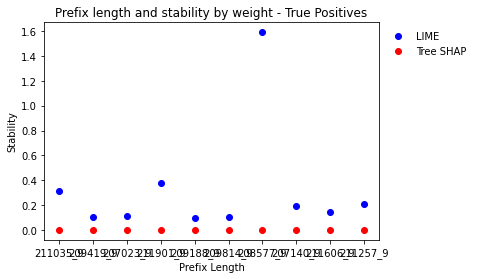

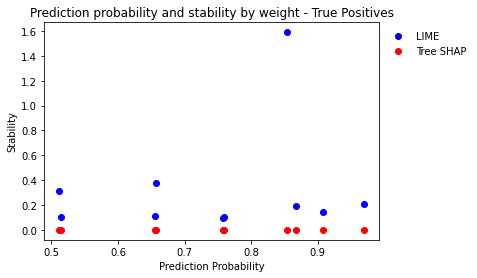

False Negatives
Average LIME Weights Stability: 0.26734721689731017
Average SHAP Weights Stability: 1.793768711452902e-16
10


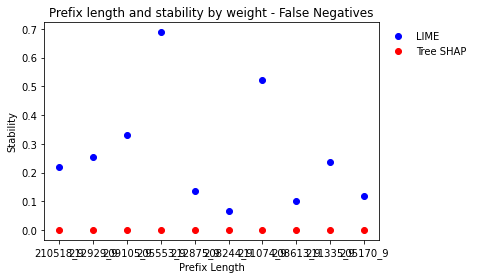

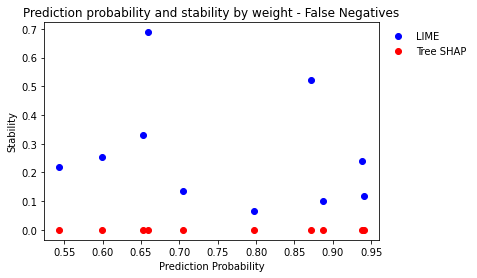

False Positives
Average LIME Weights Stability: 0.2653543472892987
Average SHAP Weights Stability: 1.555118182242037e-16
10


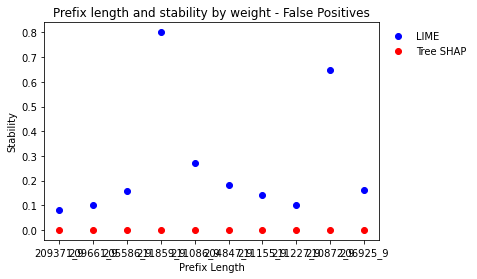

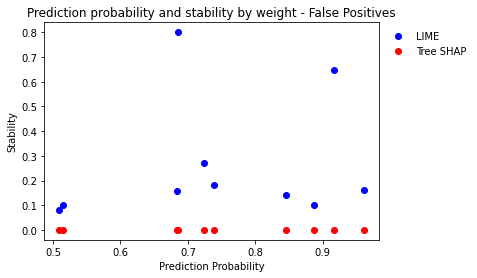

Bucket 10
True Negatives
Average LIME Weights Stability: 0.17162946958049222
Average SHAP Weights Stability: 1.5080460410590114e-16
10


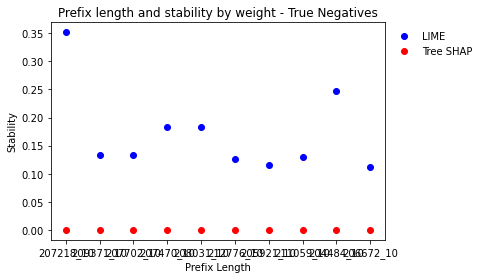

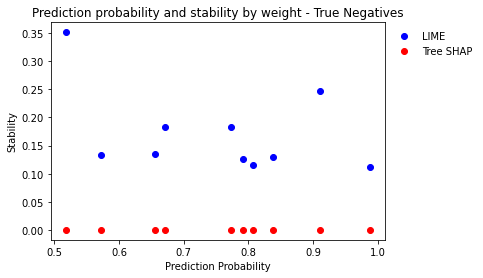

True Positives
Average LIME Weights Stability: 0.29871674159323225
Average SHAP Weights Stability: 1.6371822326805039e-16
10


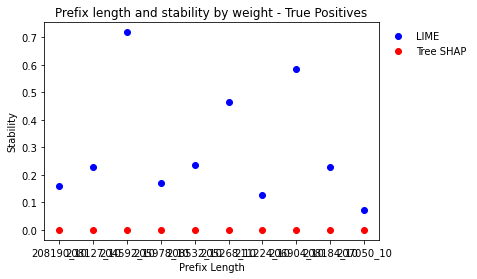

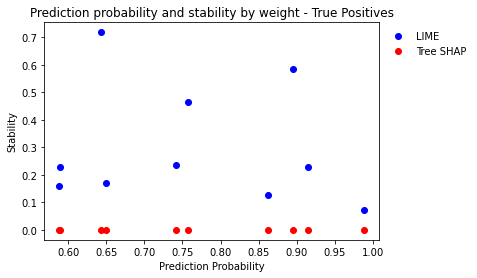

False Negatives
Average LIME Weights Stability: 0.1855692839160122
Average SHAP Weights Stability: 1.347708910482067e-16
10


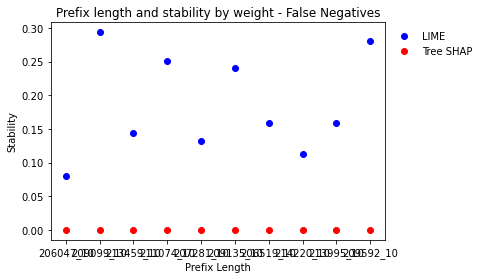

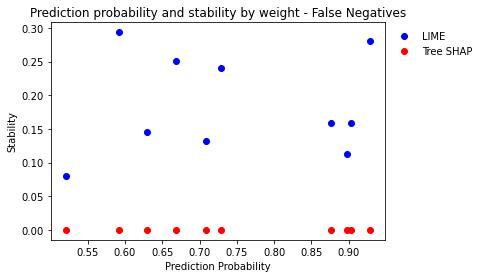

False Positives
Average LIME Weights Stability: 0.16188176114066535
Average SHAP Weights Stability: 1.5912329445684216e-16
10


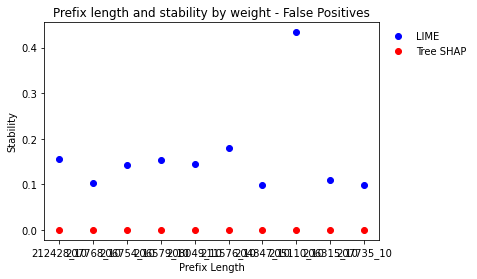

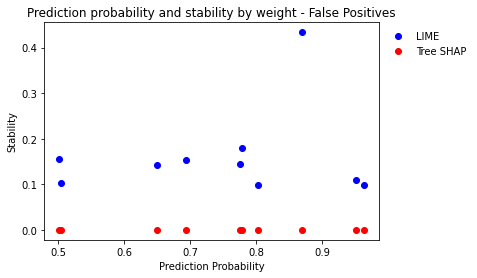

Bucket 11
True Negatives
Average LIME Weights Stability: 0.4565928227665153
Average SHAP Weights Stability: 1.7573886492693563e-16
10


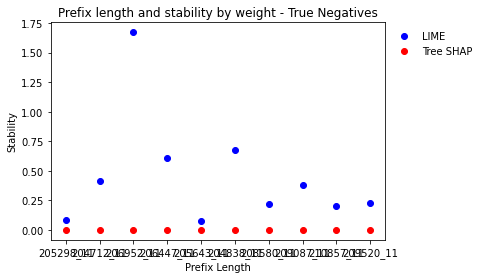

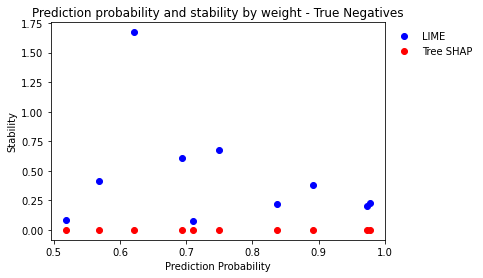

True Positives
Average LIME Weights Stability: 0.15992099779742353
Average SHAP Weights Stability: 1.4226300088034345e-16
10


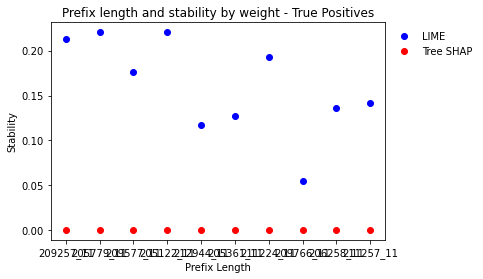

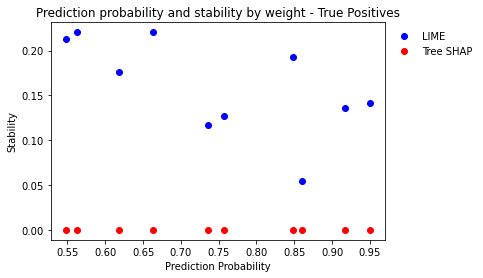

False Negatives
Average LIME Weights Stability: 0.2365861197045558
Average SHAP Weights Stability: 1.2823511572334636e-16
10


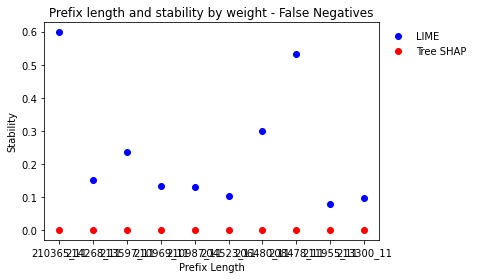

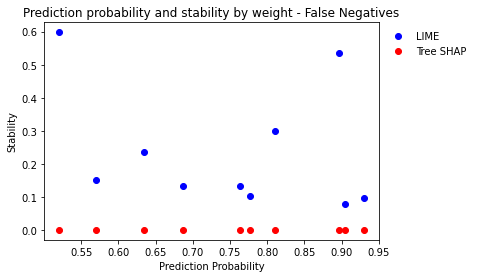

False Positives
Average LIME Weights Stability: 0.16932723868225083
Average SHAP Weights Stability: 1.500391639861403e-16
10


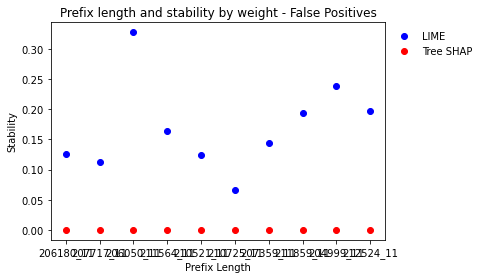

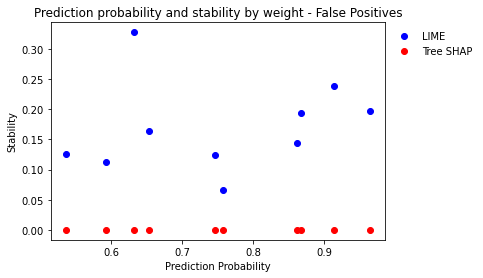

Bucket 12
True Negatives
Average LIME Weights Stability: 0.2494565361164571
Average SHAP Weights Stability: 1.1715146507857686e-16
10


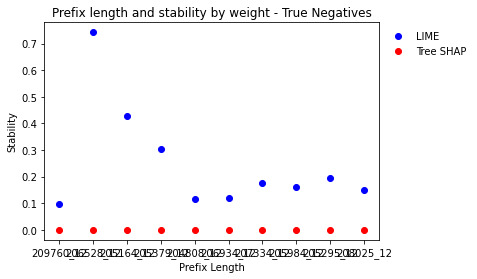

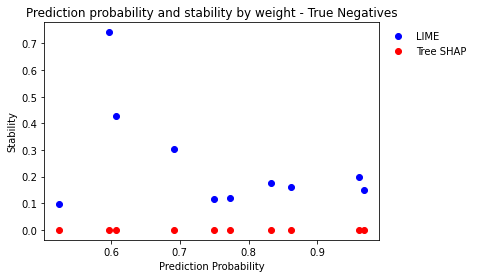

True Positives
Average LIME Weights Stability: 0.17500038526803527
Average SHAP Weights Stability: 1.271414018136806e-16
10


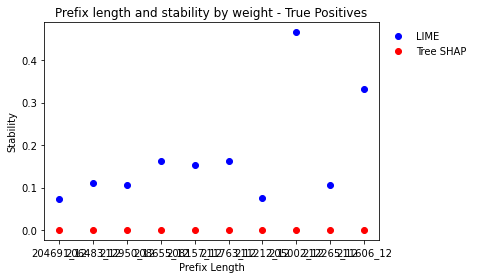

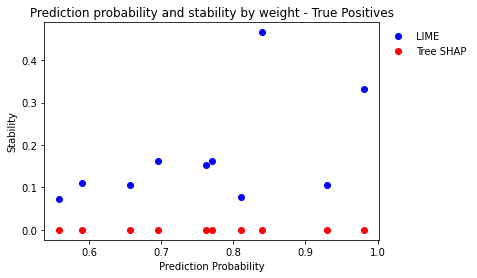

False Negatives
Average LIME Weights Stability: 0.2656399027986125
Average SHAP Weights Stability: 1.6941924250897165e-16
10


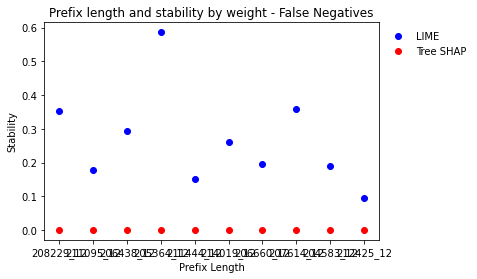

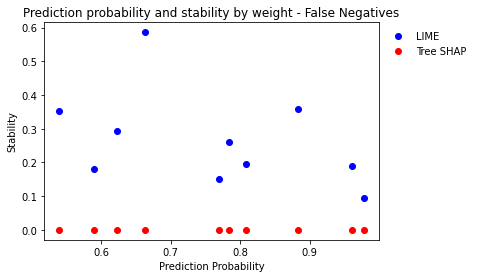

False Positives
Average LIME Weights Stability: 0.3074054054426272
Average SHAP Weights Stability: 1.2493563027000518e-16
10


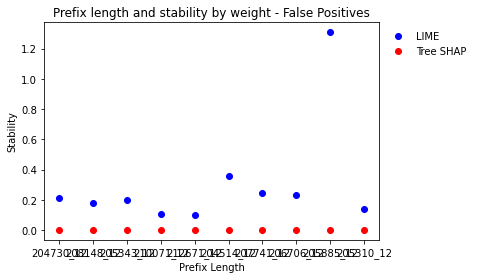

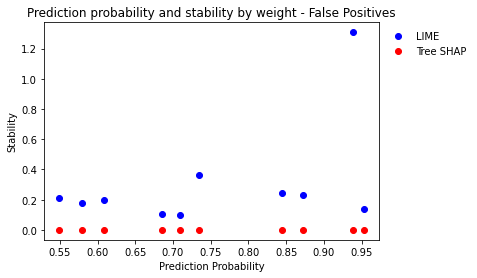

Bucket 13
True Negatives
Average LIME Weights Stability: 0.16749509543051208
Average SHAP Weights Stability: 1.3077279079771833e-16
10


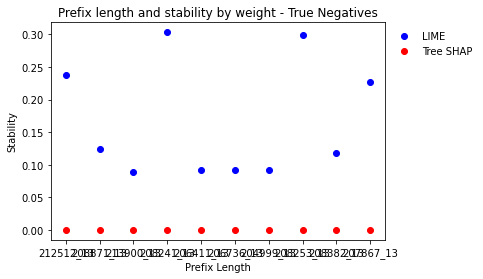

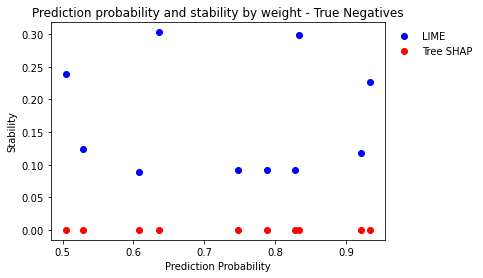

True Positives
Average LIME Weights Stability: 0.24661657390465802
Average SHAP Weights Stability: 1.3052380339647835e-16
10


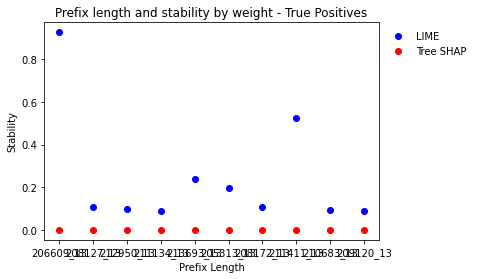

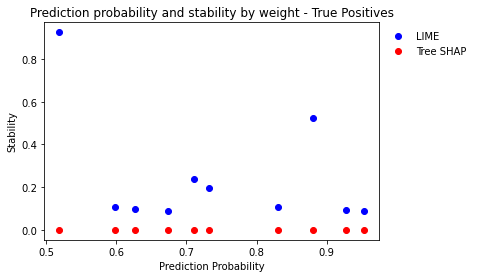

False Negatives
Average LIME Weights Stability: 0.1816886244370558
Average SHAP Weights Stability: 1.6554886906916332e-16
10


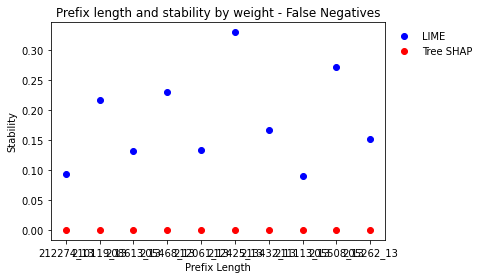

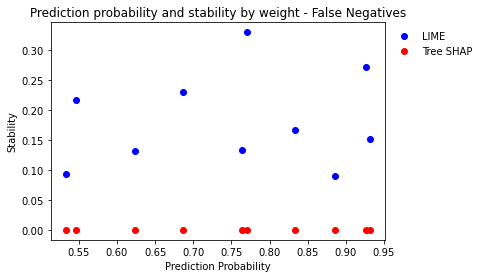

False Positives
Average LIME Weights Stability: 0.2614551903485287
Average SHAP Weights Stability: 1.256798243852954e-16
10


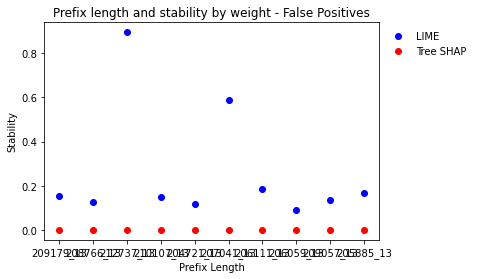

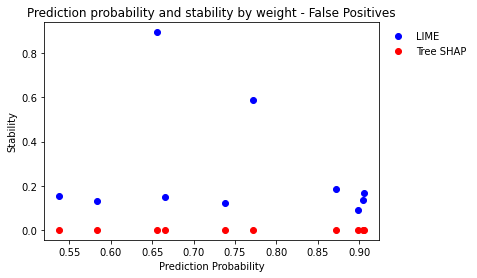

Bucket 14
True Negatives
Average LIME Weights Stability: 0.16691973677473965
Average SHAP Weights Stability: 1.8257597663666529e-16
10


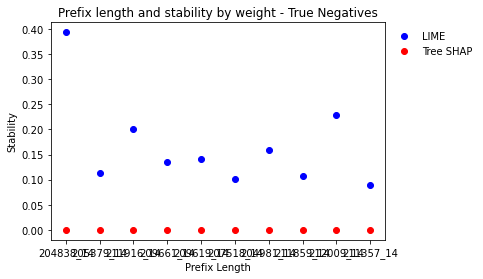

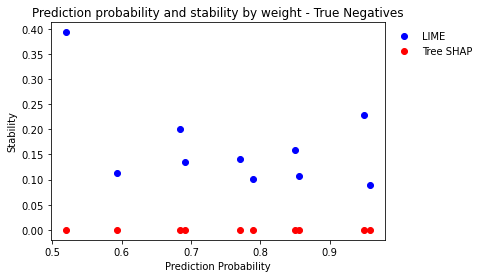

True Positives
Average LIME Weights Stability: 0.18416914698789805
Average SHAP Weights Stability: 1.3171927583098697e-16
10


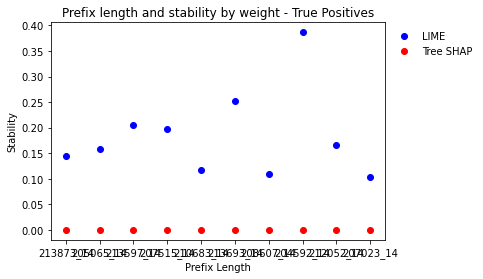

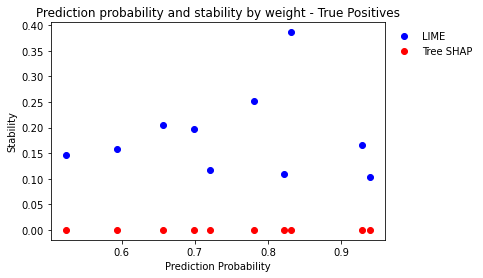

False Negatives
Average LIME Weights Stability: 0.18347764107087133
Average SHAP Weights Stability: 1.595880497450118e-16
10


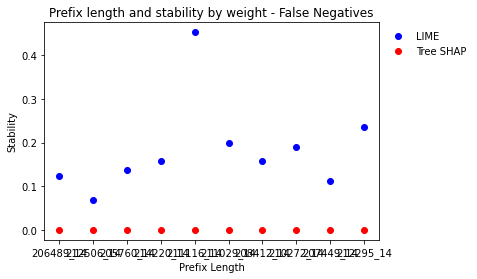

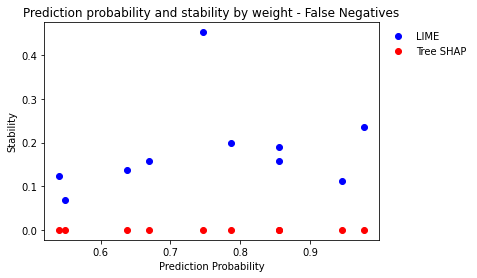

False Positives
Average LIME Weights Stability: 0.31356634946234546
Average SHAP Weights Stability: 1.1601280553548295e-16
10


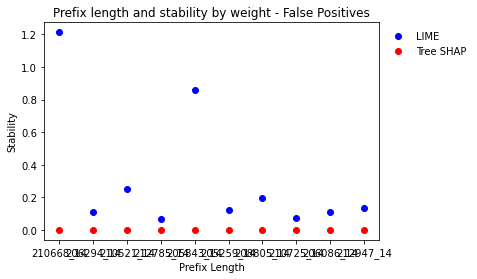

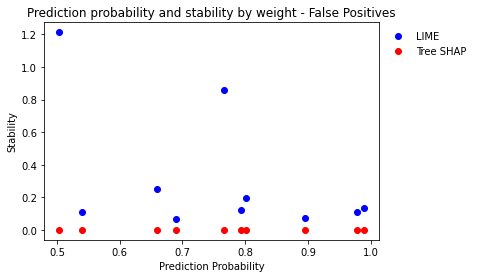

Bucket 15
True Negatives
Average LIME Weights Stability: 0.2323531270869885
Average SHAP Weights Stability: 1.430400092169257e-16
10


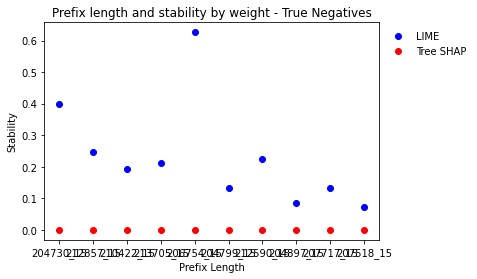

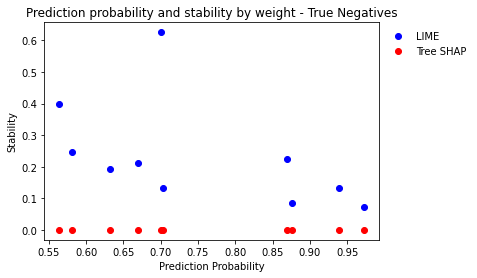

True Positives
Average LIME Weights Stability: 0.1735752719598741
Average SHAP Weights Stability: 1.3344497188468452e-16
10


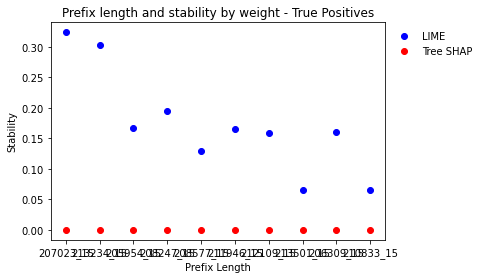

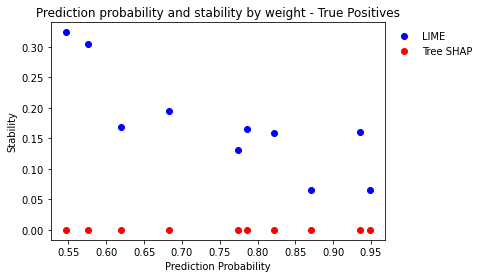

False Negatives
Average LIME Weights Stability: 0.17908462510604728
Average SHAP Weights Stability: 1.4295189407593173e-16
10


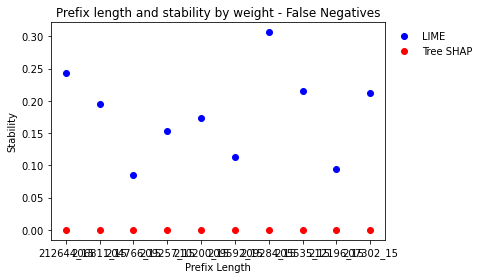

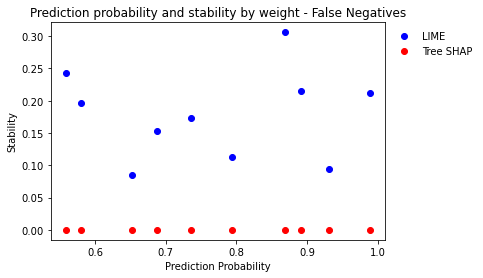

False Positives
Average LIME Weights Stability: 0.23862554503670563
Average SHAP Weights Stability: 1.2986901562737808e-16
10


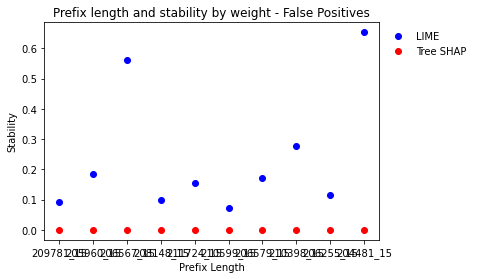

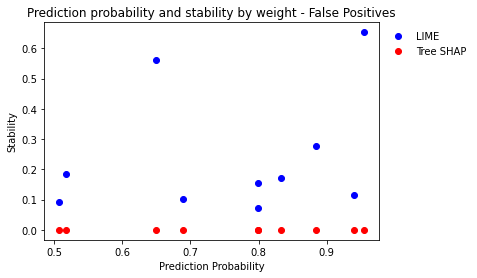

Bucket 16
True Negatives
Average LIME Weights Stability: 0.294013856706148
Average SHAP Weights Stability: 1.6733130583044915e-16
10


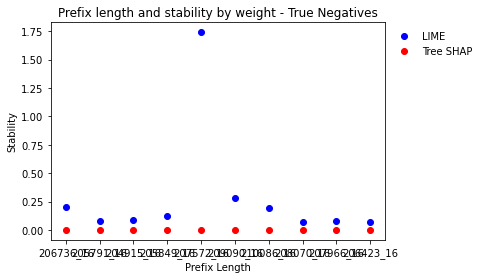

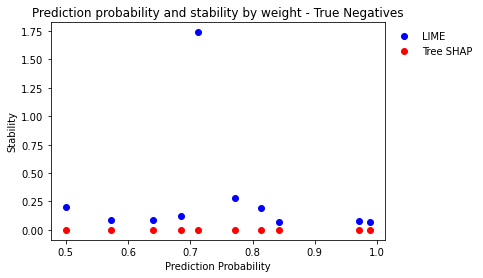

True Positives
Average LIME Weights Stability: 0.5538002096282012
Average SHAP Weights Stability: 1.3538940741275152e-16
10


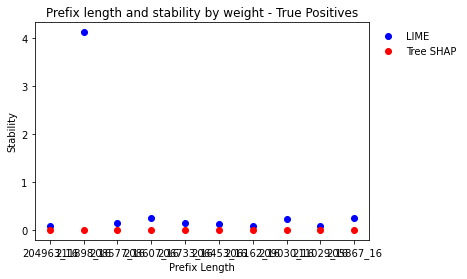

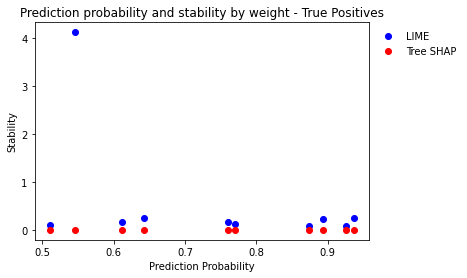

False Negatives
Average LIME Weights Stability: 0.1528599024889076
Average SHAP Weights Stability: 1.5916181297397132e-16
10


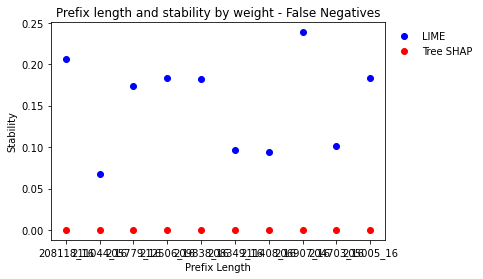

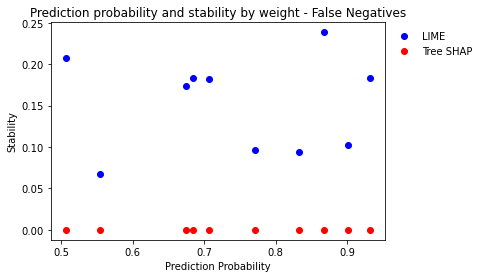

False Positives
Average LIME Weights Stability: 0.21829079378802366
Average SHAP Weights Stability: 1.4644859795603018e-16
10


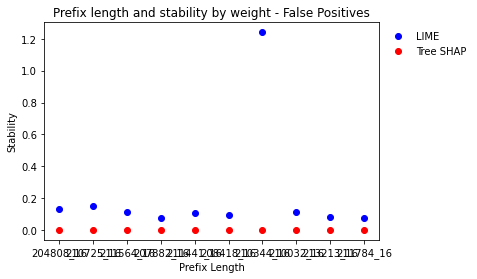

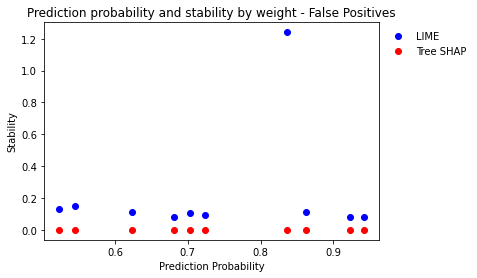

Bucket 17
True Negatives
Average LIME Weights Stability: 0.17201174578263978
Average SHAP Weights Stability: 1.7502573961805809e-16
10


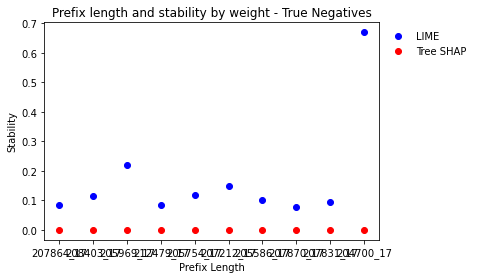

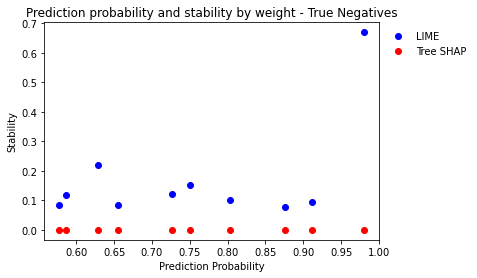

True Positives
Average LIME Weights Stability: 0.13762928229071555
Average SHAP Weights Stability: 1.3430878542713877e-16
10


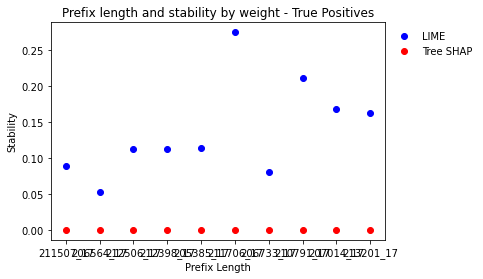

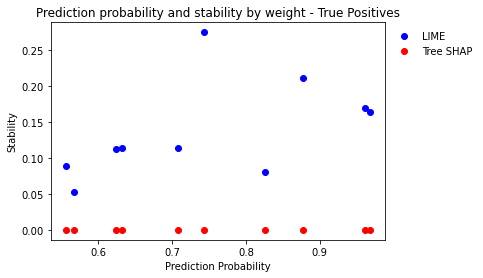

False Negatives
Average LIME Weights Stability: 0.20893048380003387
Average SHAP Weights Stability: 1.4443118997416152e-16
10


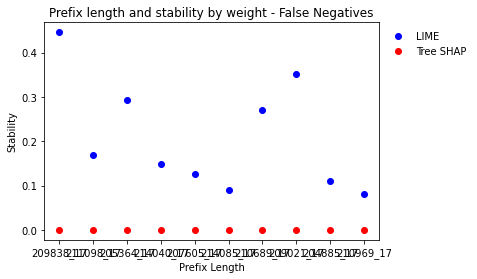

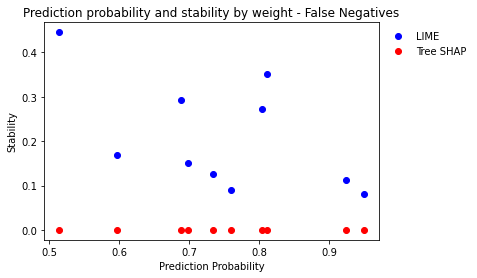

False Positives
Average LIME Weights Stability: 0.17235476552763787
Average SHAP Weights Stability: 1.6182077134699259e-16
10


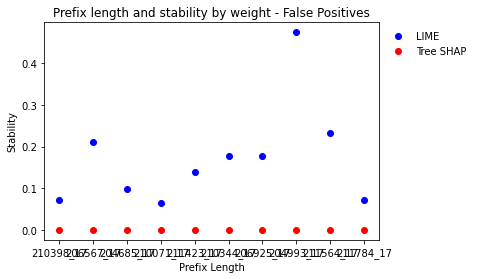

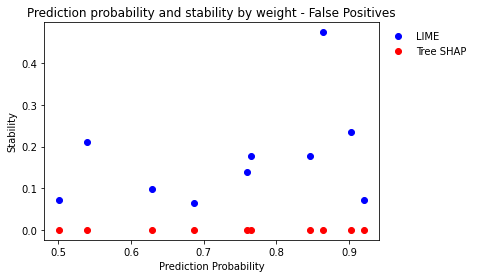

Bucket 18
True Negatives
Average LIME Weights Stability: 0.14501025980543508
Average SHAP Weights Stability: 1.3179187571537057e-16
10


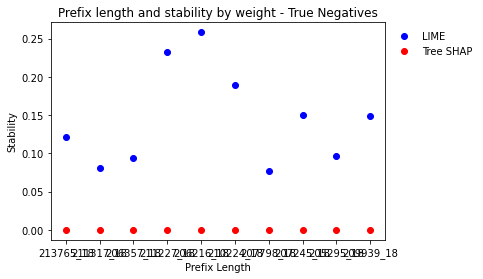

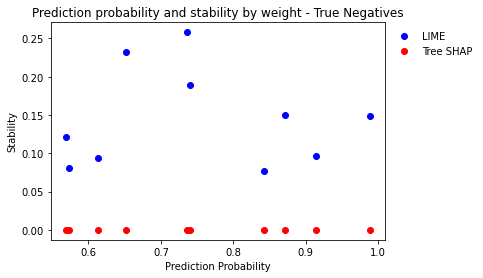

True Positives
Average LIME Weights Stability: 0.4526709791701707
Average SHAP Weights Stability: 1.5311163498090053e-16
10


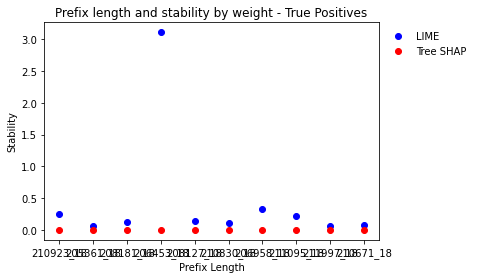

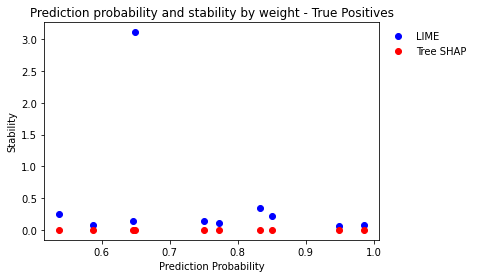

False Negatives
Average LIME Weights Stability: 0.19123685152409683
Average SHAP Weights Stability: 1.149621949503742e-16
10


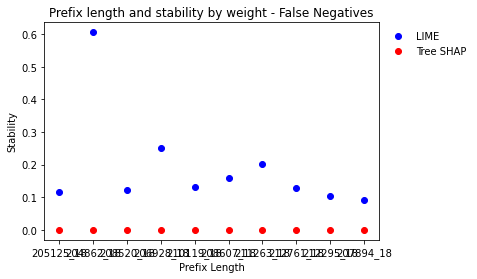

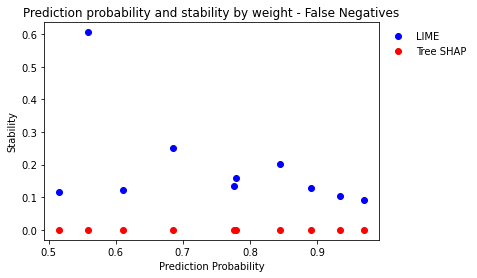

False Positives
Average LIME Weights Stability: 0.17640722772860457
Average SHAP Weights Stability: 1.802919066841548e-16
10


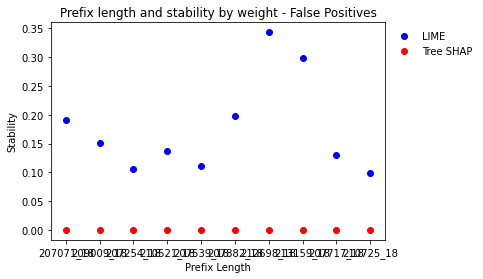

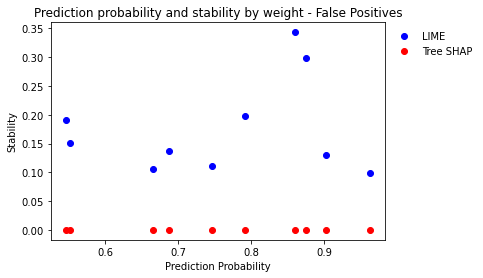

Bucket 19
True Negatives
Average LIME Weights Stability: 0.18087713001035857
Average SHAP Weights Stability: 1.4969722268174212e-16
10


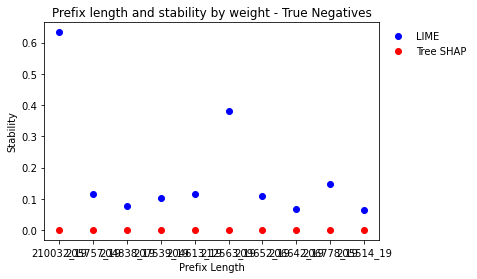

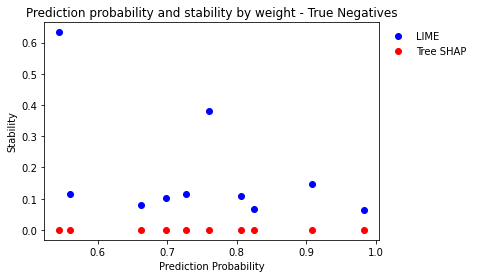

True Positives
Average LIME Weights Stability: 0.16056999216752682
Average SHAP Weights Stability: 1.5506721240392323e-16
10


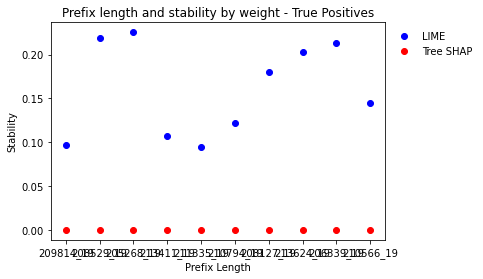

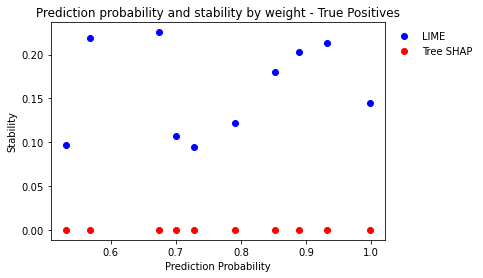

False Negatives
Average LIME Weights Stability: 0.13317874059069906
Average SHAP Weights Stability: 1.5008141233848357e-16
10


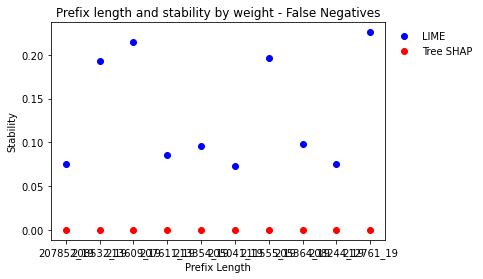

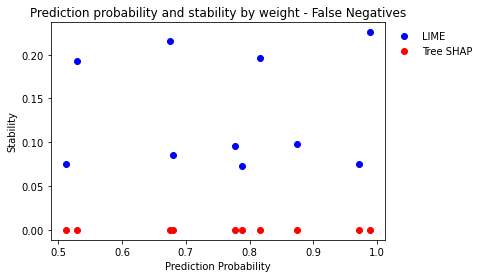

False Positives
Average LIME Weights Stability: 0.14118608282171918
Average SHAP Weights Stability: 1.5737306732799987e-16
10


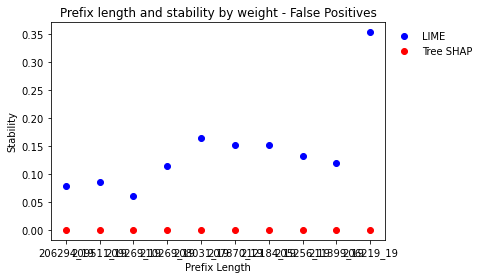

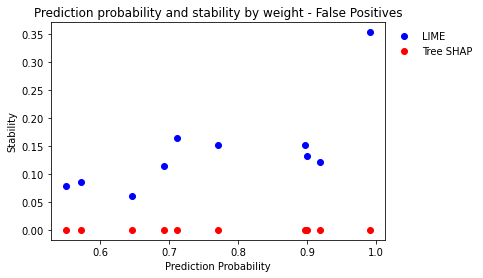

Bucket 20
True Negatives
Average LIME Weights Stability: 0.9936038222855549
Average SHAP Weights Stability: 1.6218577735457832e-16
10


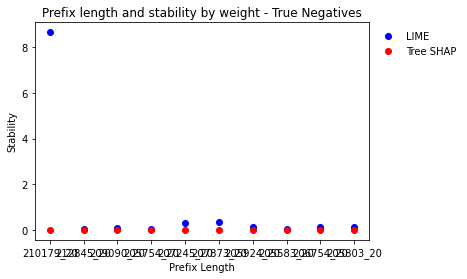

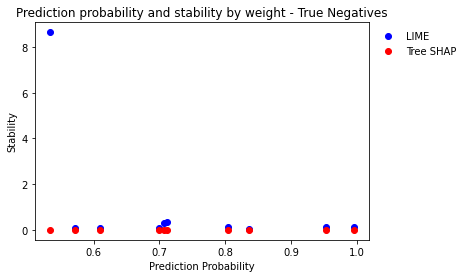

True Positives
Average LIME Weights Stability: 0.18914655467548186
Average SHAP Weights Stability: 1.7532978212392441e-16
10


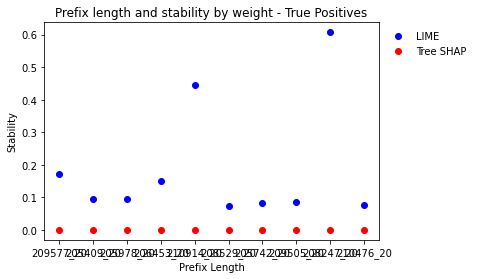

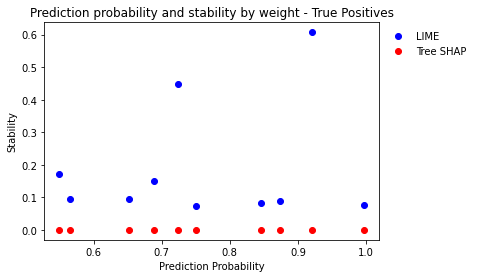

False Negatives
Average LIME Weights Stability: 0.4040742706948235
Average SHAP Weights Stability: 1.7850435073696219e-16
10


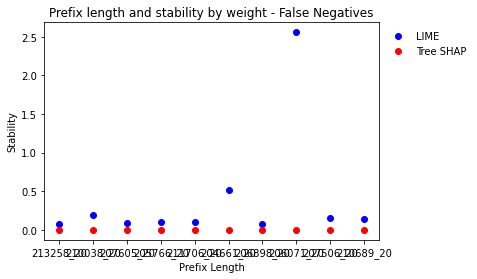

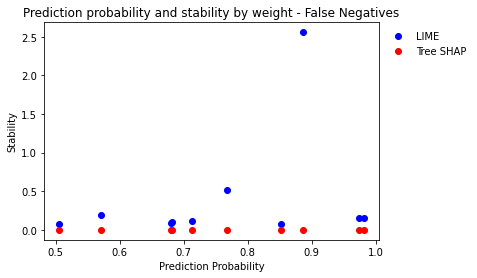

False Positives
Average LIME Weights Stability: 0.1669405696461668
Average SHAP Weights Stability: 1.6576195612879012e-16
10


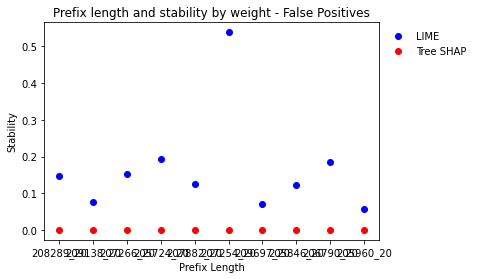

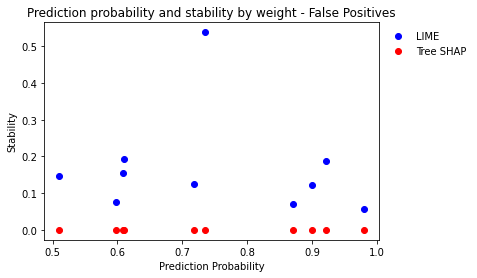

Bucket 21
True Negatives
Average LIME Weights Stability: 0.14701433528428456
Average SHAP Weights Stability: 1.6861866621968902e-16
10


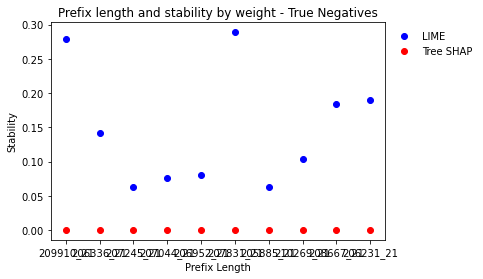

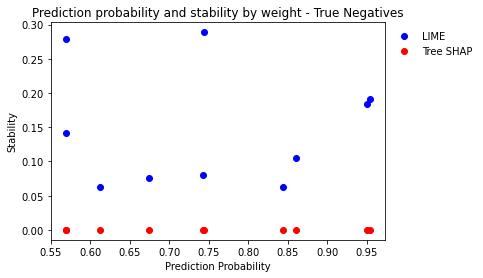

True Positives
Average LIME Weights Stability: 0.13296177197511955
Average SHAP Weights Stability: 1.8987114762750875e-16
10


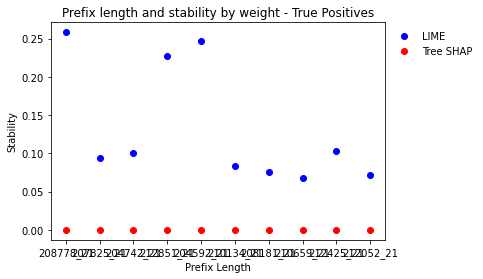

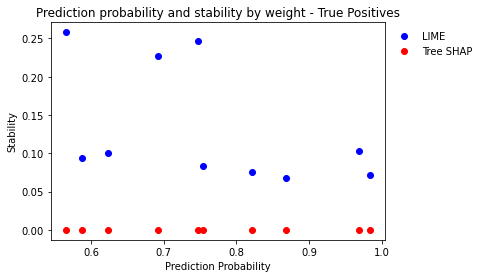

False Negatives
Average LIME Weights Stability: 0.15546159353415753
Average SHAP Weights Stability: 1.9176949177396398e-16
10


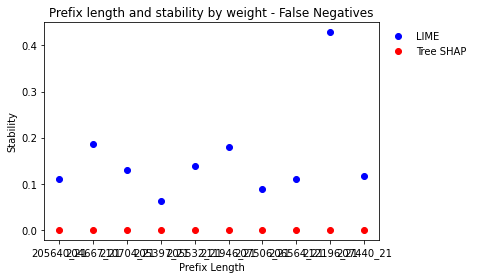

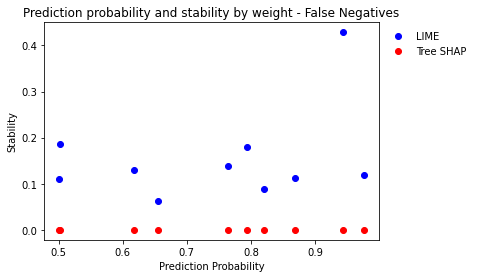

False Positives
Average LIME Weights Stability: 0.5954877590271633
Average SHAP Weights Stability: 2.0137874510672382e-16
10


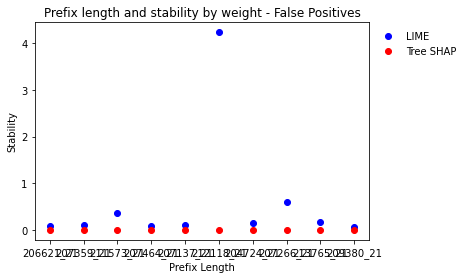

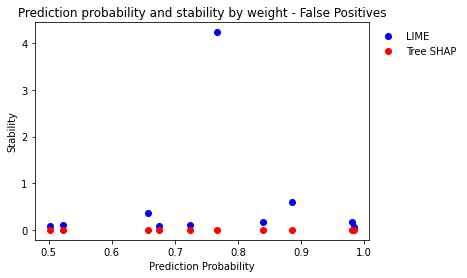

Bucket 22
True Negatives
Average LIME Weights Stability: 0.12268031853147962
Average SHAP Weights Stability: 1.9730972433132257e-16
10


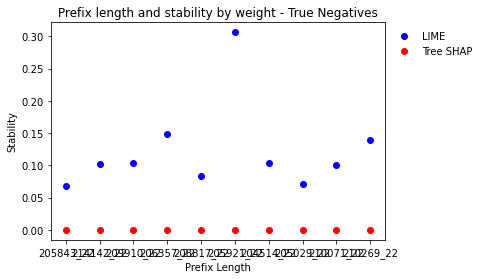

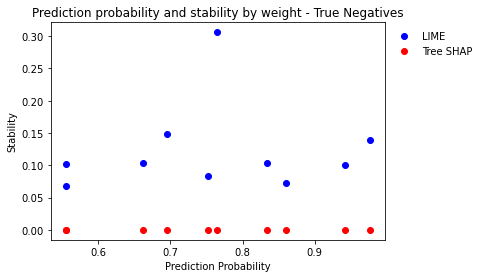

True Positives
Average LIME Weights Stability: 0.07998292055406352
Average SHAP Weights Stability: 1.8397062960981465e-16
10


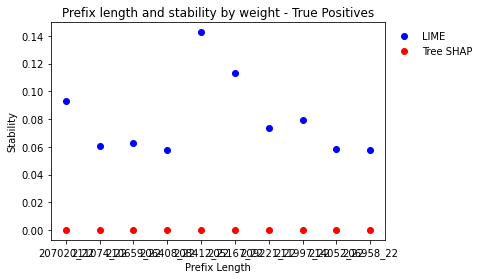

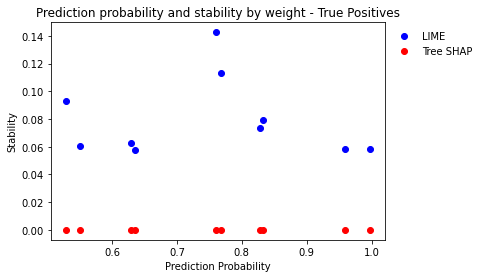

False Negatives
Average LIME Weights Stability: 0.3605595208661921
Average SHAP Weights Stability: 2.068173465413362e-16
10


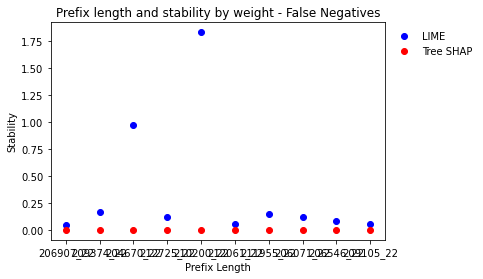

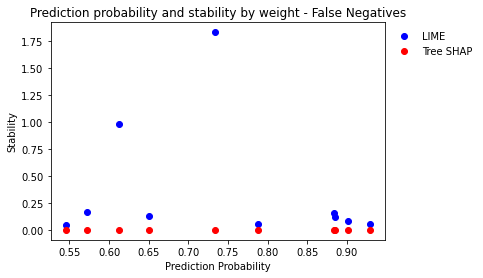

False Positives
Average LIME Weights Stability: 0.11032171391248555
Average SHAP Weights Stability: 1.705682442901498e-16
10


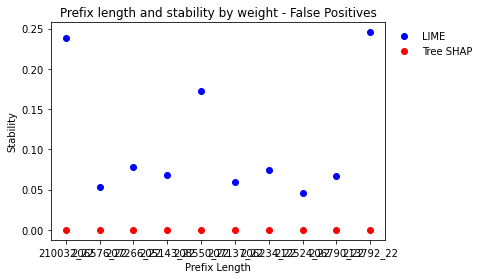

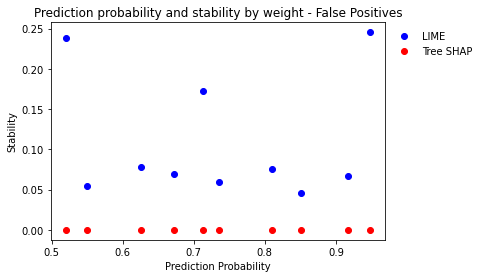

Bucket 23
True Negatives
Average LIME Weights Stability: 0.42522252866897153
Average SHAP Weights Stability: 1.652325905743813e-16
10


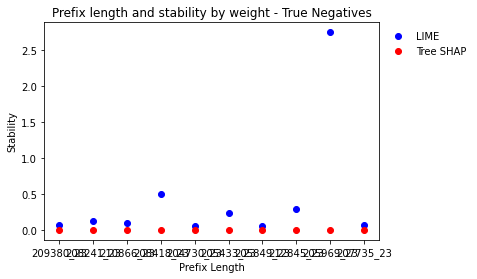

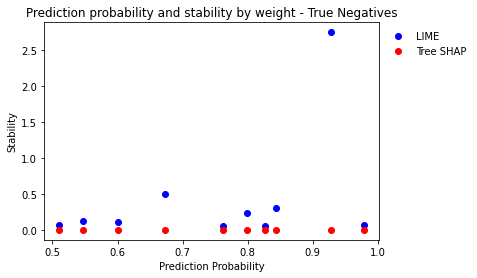

True Positives
Average LIME Weights Stability: 0.1852414158871637
Average SHAP Weights Stability: 2.2539400151976614e-16
10


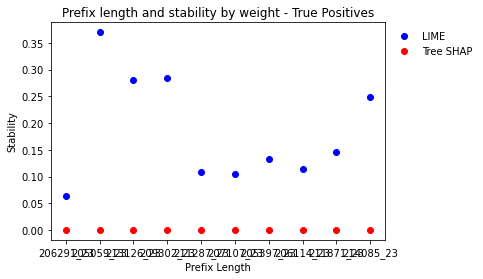

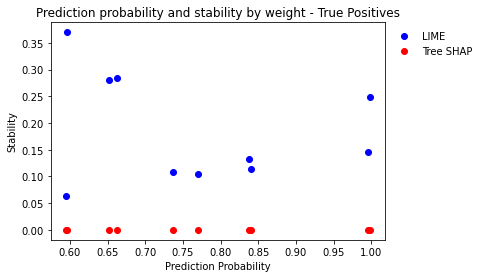

False Negatives
Average LIME Weights Stability: 0.3673098344486018
Average SHAP Weights Stability: 2.1768015380798492e-16
10


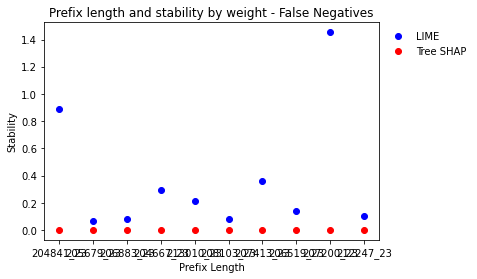

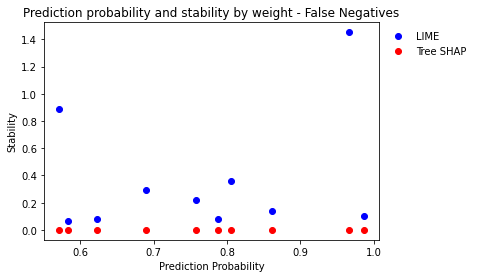

False Positives
Average LIME Weights Stability: 8.356709244014615
Average SHAP Weights Stability: 2.0021823243629652e-16
10


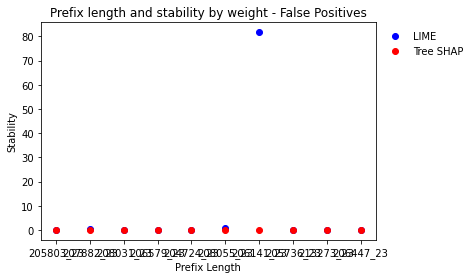

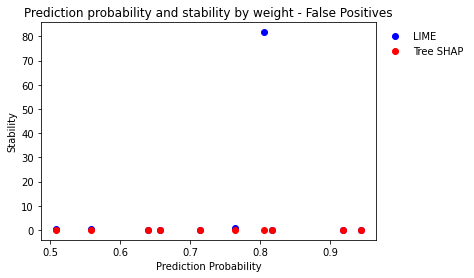

Bucket 24
True Negatives
Average LIME Weights Stability: 0.1156868250142029
Average SHAP Weights Stability: 1.7906828270965735e-16
10


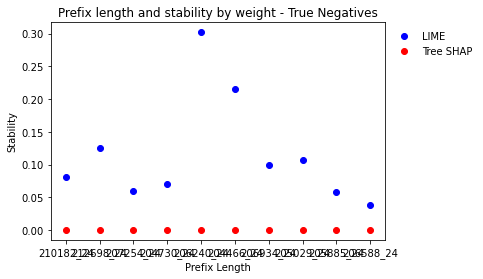

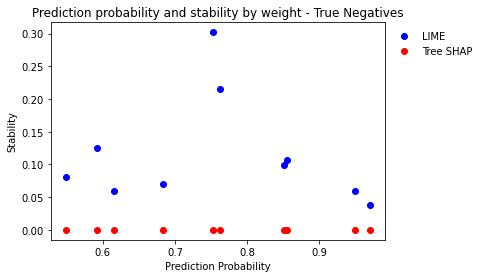

True Positives
Average LIME Weights Stability: 0.10352507916093286
Average SHAP Weights Stability: 1.7295096261913548e-16
10


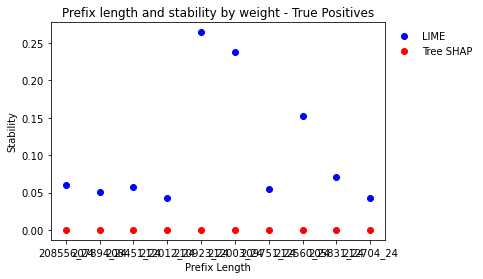

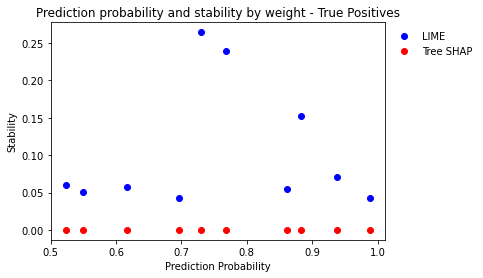

False Negatives
Average LIME Weights Stability: 0.22753083384809764
Average SHAP Weights Stability: 1.5747289968028132e-16
10


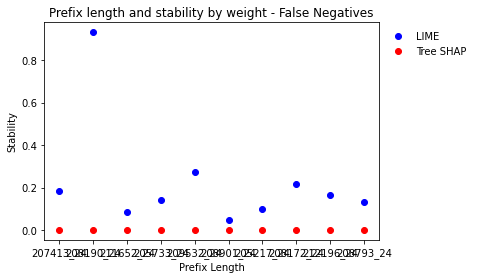

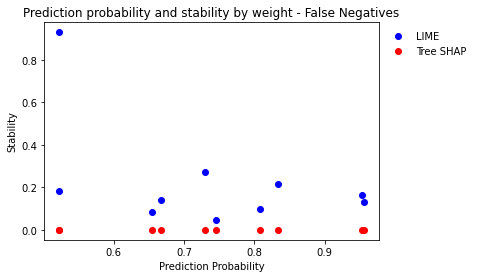

False Positives
Average LIME Weights Stability: 1.2738251580318016
Average SHAP Weights Stability: 1.7503964938524e-16
10


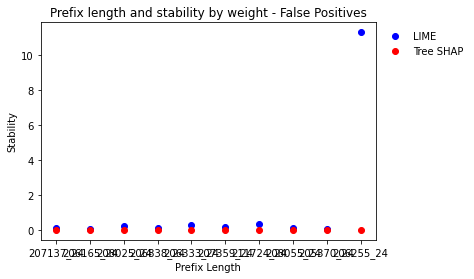

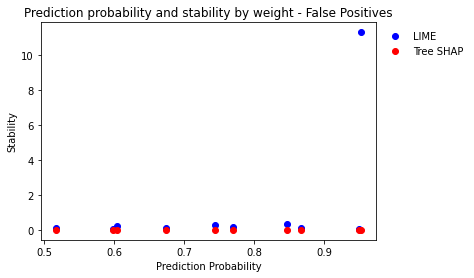

Bucket 25
True Negatives
Average LIME Weights Stability: 0.10305259250473132
Average SHAP Weights Stability: 1.7312441974402142e-16
10


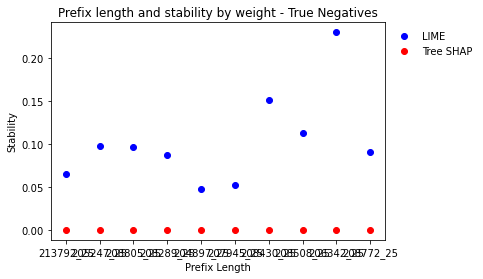

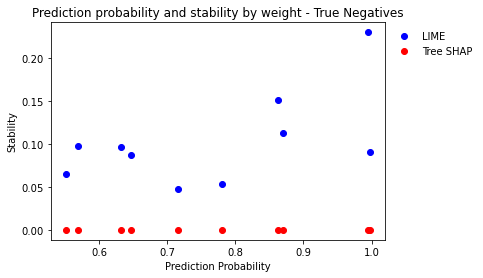

True Positives
Average LIME Weights Stability: 0.126001643249037
Average SHAP Weights Stability: 1.8639780170438707e-16
10


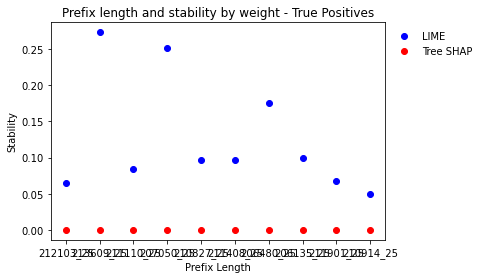

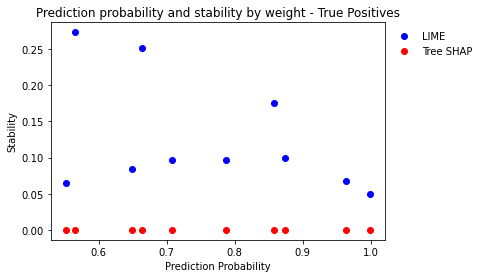

False Negatives
Average LIME Weights Stability: 0.08623082511696625
Average SHAP Weights Stability: 1.508934010209509e-16
10


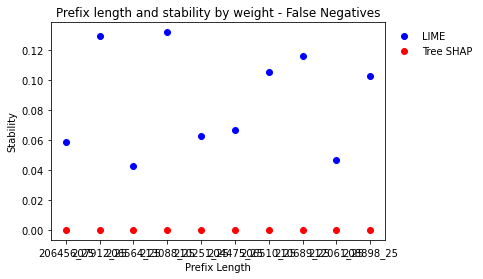

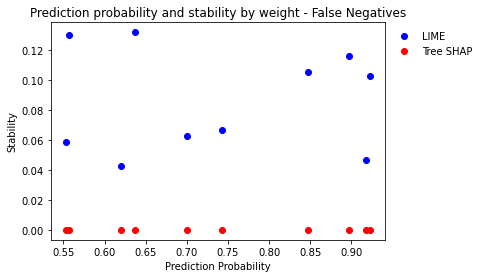

False Positives
Average LIME Weights Stability: 0.12248365793934789
Average SHAP Weights Stability: 2.0721799013057192e-16
10


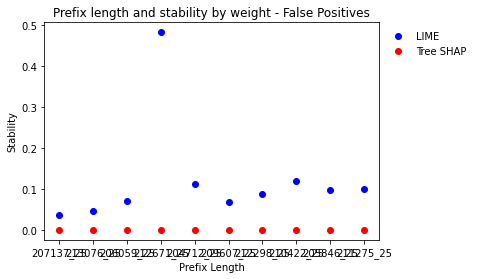

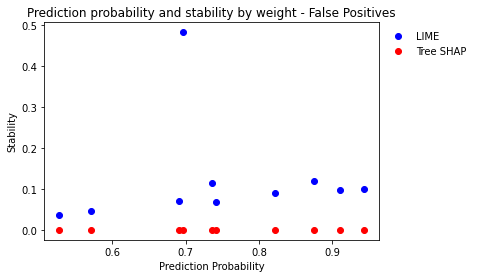

In [7]:
all_caseID = []
all_lengths = []
all_proba = []
all_lime_stab = []
all_shap_stab = []

for dataset_name in datasets:

    dataset_manager = DatasetManager(dataset_name)

    for ii in range(n_iter):
        num_buckets = len([name for name in os.listdir(os.path.join(PATH,'%s/%s_%s/models'% (dataset_ref, cls_method, method_name)))])
        
        if num_buckets < max_prefix:
            max_prefix = num_buckets
            
        buckets = range(0, max_prefix, gap)

        for bucket in buckets:
            bucketID = bucket+1
            print ('Bucket', bucketID)

            #import everything needed to sort and predict
            feat_comb_path = os.path.join(PATH, "%s/%s_%s/bucketers_and_encoders/feature_combiner_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls_path = os.path.join(PATH, "%s/%s_%s/models/cls_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls = joblib.load(cls_path)
            feature_combiner = joblib.load(feat_comb_path)

            #import previously identified samples
            tn_path = os.path.join(PATH, "%s/%s_%s/samples/true_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            tp_path = os.path.join(PATH, "%s/%s_%s/samples/true_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fn_path = os.path.join(PATH, "%s/%s_%s/samples/false_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fp_path = os.path.join(PATH, "%s/%s_%s/samples/false_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))

            sample_instances = []

            with open (tn_path, 'rb') as f:
                tn_list = pickle.load(f)
            with open (tp_path, 'rb') as f:
                tp_list = pickle.load(f)
            with open (fn_path, 'rb') as f:
                fn_list = pickle.load(f)
            with open (fp_path, 'rb') as f:
                fp_list = pickle.load(f)

            #save results to a list
            sample_instances.append(tn_list)
            sample_instances.append(tp_list)
            sample_instances.append(fn_list)
            sample_instances.append(fp_list)
            
            type_list = ["True Negatives", "True Positives", "False Negatives", "False Positives"]
            
            for i in range(len(sample_instances)):
                print (type_list[i])
                data = pd.DataFrame.from_records(sample_instances[i])
                
                dispersal_lime = []
                dispersal_shap = []
                adj_dispersal_lime = []
                adj_dispersal_shap = []
                
                case_id = pd.Series(data['caseID'])
                nr_events = pd.Series(data['nr_events'])
                proba = pd.Series(data['proba'])
                lime_stability = pd.Series(data['adjusted_lime_importance_stability'])
                tree_shap_stability = pd.Series(data['adjusted_shap_importance_stability'])
                
                all_caseID.extend(case_id)
                all_lengths.extend(nr_events)
                all_proba.extend(proba)
                all_lime_stab.extend(lime_stability)
                all_shap_stab.extend(tree_shap_stability)
                
                print("Average LIME Weights Stability:", statistics.mean(lime_stability))
                print("Average SHAP Weights Stability:", statistics.mean(tree_shap_stability))
                
                shap_dispersion = [disp for disp in tree_shap_stability if disp > 0]
                
                print (len(shap_dispersion))
                
                fig, ax = plt.subplots()
                ax.plot(case_id, lime_stability, 'bo', label = "LIME")
                ax.plot(case_id, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax.set_xlabel("Prefix Length")
                ax.set_ylabel("Stability")
                ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.title("Prefix length and stability by weight - "+type_list[i])
                plt.show()
                
                fig2, ax2 = plt.subplots()
                ax2.plot(proba, lime_stability, 'bo', label = "LIME")
                ax2.plot(proba, tree_shap_stability, 'ro', label = "Tree SHAP")
                ax2.set_xlabel("Prediction Probability")
                ax2.set_ylabel("Stability")
                ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                plt.title("Prediction probability and stability by weight - "+type_list[i])
                plt.show()

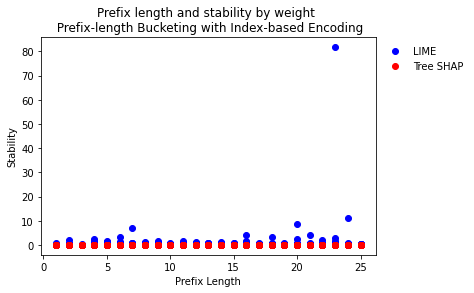

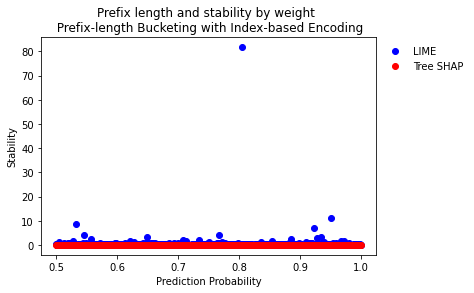

In [8]:
fig, ax = plt.subplots()
ax.plot(all_lengths, all_lime_stab, 'bo', label = "LIME")
ax.plot(all_lengths, all_shap_stab, 'ro', label = "Tree SHAP")
ax.set_xlabel("Prefix Length")
ax.set_ylabel("Stability")
ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prefix length and stability by weight \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(all_proba, all_lime_stab, 'bo', label = "LIME")
ax2.plot(all_proba, all_shap_stab, 'ro', label = "Tree SHAP")
ax2.set_xlabel("Prediction Probability")
ax2.set_ylabel("Stability")
ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prefix length and stability by weight \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

In [9]:
lime_mean = np.mean(all_lime_stab)
lime_std = np.std(all_lime_stab)
lime_upper = lime_mean + (3*lime_std)
lime_lower = lime_mean - (3*lime_std)

shap_mean = np.mean(all_shap_stab)
shap_std = np.std(all_shap_stab)
shap_upper = shap_mean + (3*shap_std)
shap_lower = shap_mean - (3*shap_std)

lime_outliers = [i for i in all_lime_stab if i > lime_upper or i < lime_lower]
shap_outliers = [i for i in all_shap_stab if i > shap_upper or i < shap_lower]

print (lime_mean)
print (shap_mean)
print(len(lime_outliers))
print(len(shap_outliers))
print(str(len(lime_outliers)/len(all_lime_stab)*100)+"%")
print(str(len(shap_outliers)/len(all_shap_stab)*100)+"%")

0.3333661739249066
1.5988073218339562e-16
3
15
0.3%
1.5%


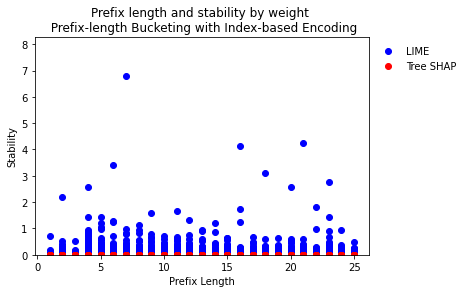

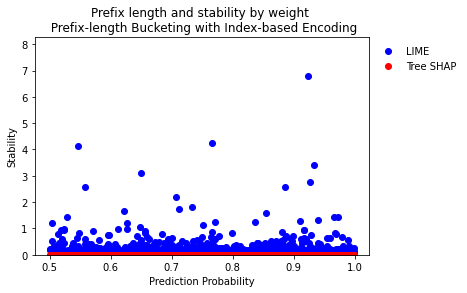

In [10]:
fig, ax = plt.subplots()
ax.plot(all_lengths, all_lime_stab, 'bo', label = "LIME")
ax.plot(all_lengths, all_shap_stab, 'ro', label = "Tree SHAP")
ax.set_xlabel("Prefix Length")
ax.set_ylabel("Stability")
ax.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.ylim(0, lime_upper)
plt.title("Prefix length and stability by weight \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(all_proba, all_lime_stab, 'bo', label = "LIME")
ax2.plot(all_proba, all_shap_stab, 'ro', label = "Tree SHAP")
ax2.set_xlabel("Prediction Probability")
ax2.set_ylabel("Stability")
ax2.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.ylim(0, lime_upper)
plt.title("Prefix length and stability by weight \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

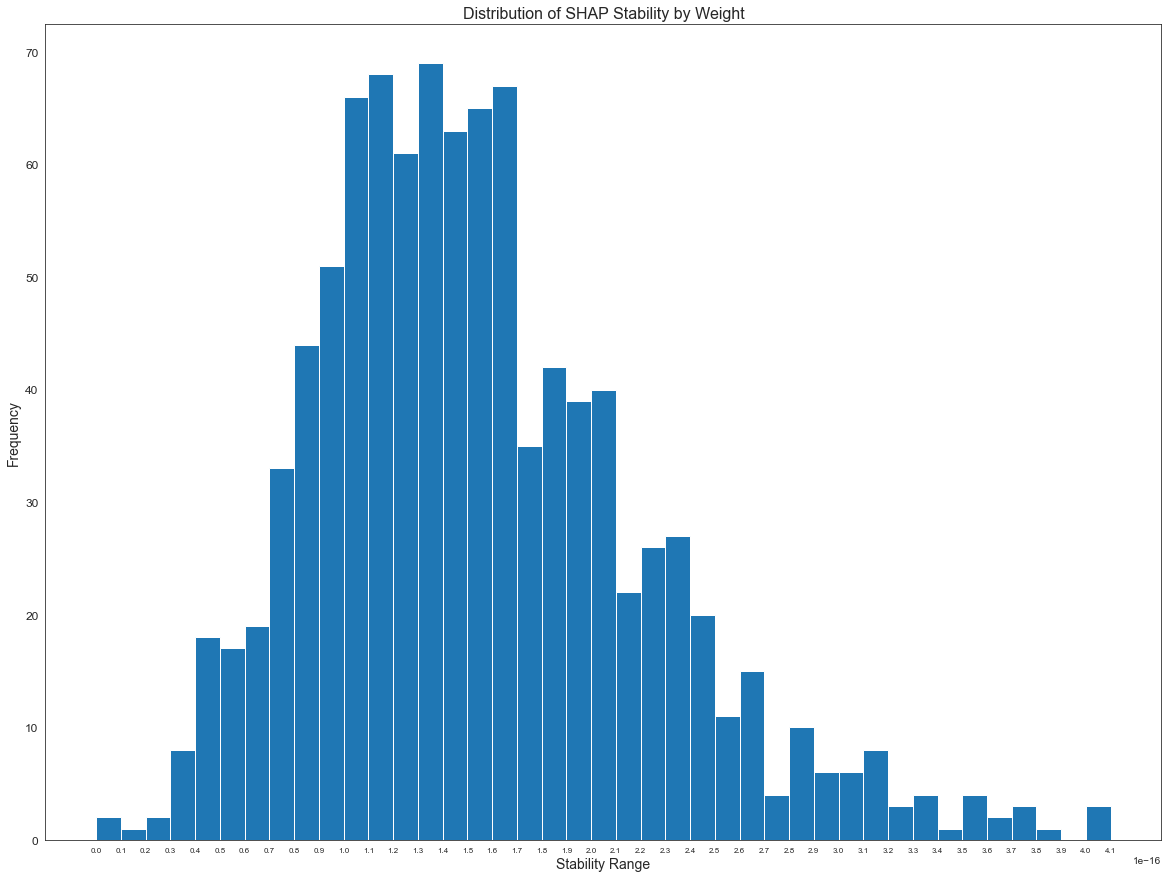

In [29]:
bins = np.arange(0, shap_upper+1e-17, 1e-17)
yticks = np.arange(0, 80, 10)
sns.set_style("white")
plt.subplots(figsize=(20, 15))
plt.hist(all_shap_stab, bins = bins)
#plt.figsize([50, 50])
plt.xticks(bins, fontsize = 8)
plt.yticks(yticks, fontsize = 12)
plt.title("Distribution of SHAP Stability by Weight", fontsize = 16)
plt.xlabel("Stability Range", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

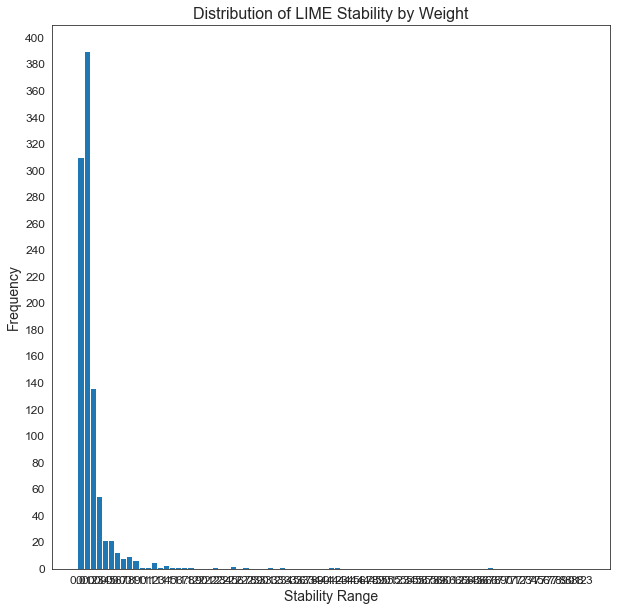

In [34]:
bins = np.arange(0, lime_upper+0.1, 0.1)
yticks = np.arange(0, 420, 20)
sns.set_style("white")
plt.subplots(figsize=(10, 10))
plt.hist(all_lime_stab, bins = bins)
#plt.figsize([50, 50])
plt.xticks(bins, fontsize = 12)
plt.yticks(yticks, fontsize = 12)
plt.title("Distribution of LIME Stability by Weight", fontsize = 16)
plt.xlabel("Stability Range", fontsize = 14)
plt.ylabel("Frequency", fontsize = 14)
plt.show()

In [13]:
all_caseID = []
all_lengths = []
all_proba = []

sep_caseID = [[],[],[],[]]
sep_lengths = [[],[],[],[]]
sep_proba = [[],[],[],[]]

all_lime_diffs = []
all_shap_diffs = []

sep_lime_diffs = [[],[],[],[]]
sep_shap_diffs = [[],[],[],[]]

all_lime_MSE = []
all_lime_RMSE = []
all_lime_MAE = []
all_lime_MAPE = []

sep_lime_MSE = [[],[],[],[]]
sep_lime_RMSE = [[],[],[],[]]
sep_lime_MAE = [[],[],[],[]]
sep_lime_MAPE = [[],[],[],[]]

all_shap_MSE = []
all_shap_RMSE = []
all_shap_MAE = []
all_shap_MAPE = []

sep_shap_MSE = [[],[],[],[]]
sep_shap_RMSE = [[],[],[],[]]
sep_shap_MAE = [[],[],[],[]]
sep_shap_MAPE = [[],[],[],[]]

for dataset_name in datasets:

    dataset_manager = DatasetManager(dataset_name)

    for ii in range(n_iter):
        num_buckets = len([name for name in os.listdir(os.path.join(PATH,'%s/%s_%s/models'% (dataset_ref, cls_method, method_name)))])
        
        if num_buckets < max_prefix:
            max_prefix = num_buckets
        
        buckets = range(0, max_prefix, gap)

        for bucket in buckets:
            bucketID = bucket+1
            print ('Bucket', bucketID)

            #import everything needed to sort and predict
            feat_comb_path = os.path.join(PATH, "%s/%s_%s/bucketers_and_encoders/feature_combiner_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls_path = os.path.join(PATH, "%s/%s_%s/models/cls_bucket_%s.joblib" % (dataset_ref, cls_method, method_name, bucketID))
            cls = joblib.load(cls_path)
            feature_combiner = joblib.load(feat_comb_path)

            #import previously identified samples
            tn_path = os.path.join(PATH, "%s/%s_%s/samples/true_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            tp_path = os.path.join(PATH, "%s/%s_%s/samples/true_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fn_path = os.path.join(PATH, "%s/%s_%s/samples/false_neg_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))
            fp_path = os.path.join(PATH, "%s/%s_%s/samples/false_pos_bucket_%s_.pickle" % (dataset_ref, cls_method, method_name, bucketID))

            sample_instances = []

            with open (tn_path, 'rb') as f:
                tn_list = pickle.load(f)
            with open (tp_path, 'rb') as f:
                tp_list = pickle.load(f)
            with open (fn_path, 'rb') as f:
                fn_list = pickle.load(f)
            with open (fp_path, 'rb') as f:
                fp_list = pickle.load(f)

            #save results to a list
            sample_instances.append(tn_list)
            sample_instances.append(tp_list)
            sample_instances.append(fn_list)
            sample_instances.append(fp_list)
            
            type_list = ["True Negatives", "True Positives", "False Negatives", "False Positives"]
            
            for i in range(len(sample_instances)):
                print (type_list[i])
                data = pd.DataFrame.from_records(sample_instances[i])
                
                lime_MSE = []
                lime_RMSE = []
                lime_MAE = []
                lime_MAPE = []
                
                shap_MSE = []
                shap_RMSE = []
                shap_MAE = []
                shap_MAPE = []
                
                case_id = pd.Series(data['caseID'])
                nr_events = pd.Series(data['nr_events'])
                proba = pd.Series(data['proba'])
                lime_diffs = pd.Series(data['lime_fid_change'])
                shap_diffs = pd.Series(data['shap_fid_change'])
                
                for j in range(len(lime_diffs)):
                    p1 = proba[j]
                    
                    lime_diff = lime_diffs[j]
                    shap_diff = shap_diffs[j]
                    
                    all_lime_diffs.append(lime_diff)
                    all_shap_diffs.append(shap_diff)
                    
                    lime_sq_changes = []
                    lime_abs_changes = []
                    lime_rel_changes = []
                    
                    shap_sq_changes = []
                    shap_abs_changes = []
                    shap_rel_changes = []
                    
                    for each in lime_diff:
                        lime_sq_changes.append(each**2)
                        lime_abs_changes.append(abs(each))
                        lime_rel_changes.append(abs(each)/p1)
                        
                    for each in shap_diff:
                        shap_sq_changes.append(each**2)
                        shap_abs_changes.append(abs(each))
                        shap_rel_changes.append(abs(each)/p1)
                    
                    lime_MSE.append(sum(lime_sq_changes)/len(lime_sq_changes))
                    lime_RMSE.append(math.sqrt(sum(lime_sq_changes)/len(lime_sq_changes)))
                    lime_MAE.append(sum(lime_abs_changes)/len(lime_abs_changes))
                    lime_MAPE.append(sum(lime_rel_changes)/len(lime_rel_changes))
                    
                    shap_MSE.append(sum(shap_sq_changes)/len(shap_sq_changes))
                    shap_RMSE.append(math.sqrt(sum(shap_sq_changes)/len(shap_sq_changes)))
                    shap_MAE.append(sum(shap_abs_changes)/len(shap_abs_changes))
                    shap_MAPE.append(sum(shap_rel_changes)/len(shap_rel_changes))
                
                all_caseID.extend(case_id)
                all_lengths.extend(nr_events)
                all_proba.extend(proba)
                
                all_lime_MSE.extend(lime_MSE)
                all_lime_RMSE.extend(lime_RMSE)
                all_lime_MAE.extend(lime_MAE)
                all_lime_MAPE.extend(lime_MAPE)
                
                all_shap_MSE.extend(shap_MSE)
                all_shap_RMSE.extend(shap_RMSE)
                all_shap_MAE.extend(shap_MAE)
                all_shap_MAPE.extend(shap_MAPE)
                
                sep_caseID[i].extend(case_id)
                sep_lengths[i].extend(nr_events)
                sep_proba[i].extend(proba)
                
                sep_lime_MSE[i].extend(lime_MSE)
                sep_lime_RMSE[i].extend(lime_RMSE)
                sep_lime_MAE[i].extend(lime_MAE)
                sep_lime_MAPE[i].extend(lime_MAPE)
                
                sep_shap_MSE[i].extend(shap_MSE)
                sep_shap_RMSE[i].extend(shap_RMSE)
                sep_shap_MAE[i].extend(shap_MAE)
                sep_shap_MAPE[i].extend(shap_MAPE)
                
                print("Average LIME MSE:", statistics.mean(lime_MSE))
                print("Average SHAP MSE:", statistics.mean(shap_MSE))
                print("\n")
                
                #plt.plot(nr_events, lime_MSE, 'bo', label = "LIME")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prefix length and MSE \n"+type_list[i])
                #plt.show()

                #plt.plot(nr_events, shap_MSE, 'ro', label = "Tree SHAP")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                ##plt.yticks(np.arange(0,15,1))
                #plt.title("Prefix length and MSE \n"+type_list[i])
                #plt.show()

                #plt.plot(proba, lime_MSE, 'bo', label = "LIME")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prediction probability and MSE \n"+type_list[i])
                #plt.show()

                #plt.plot(proba, shap_MSE, 'ro', label = "Tree SHAP")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prediction probability and MSE \n"+type_list[i])
                #plt.show()
                
                print("Average LIME RMSE:", statistics.mean(lime_RMSE))
                print("Average SHAP RMSE:", statistics.mean(shap_RMSE))
                print("\n")
                
                #plt.plot(nr_events, lime_RMSE, 'bo', label = "LIME")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prefix length and RMSE \n"+type_list[i])
                #plt.show()

                #plt.plot(nr_events, shap_RMSE, 'ro', label = "Tree SHAP")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prefix length and RMSE \n"+type_list[i])
                #plt.show()

                #plt.plot(proba, lime_RMSE, 'bo', label = "LIME")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prediction probability and RMSE \n"+type_list[i])
                #plt.show()

                #plt.plot(proba, shap_RMSE, 'ro', label = "Tree SHAP")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prediction probability and RMSE \n"+type_list[i])
                #plt.show()
                
                print("Average LIME MAE:", statistics.mean(lime_MAE))
                print("Average SHAP MAE:", statistics.mean(shap_MAE))
                print("\n")
                
                #plt.plot(nr_events, lime_MAE, 'bo', label = "LIME")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prefix length and MAE \n"+type_list[i])
                #plt.show()

                #plt.plot(nr_events, shap_MAE, 'ro', label = "Tree SHAP")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prefix length and MAE \n"+type_list[i])
                #plt.show()

                #plt.plot(proba, lime_MAE, 'bo', label = "LIME")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prediction probability and MAE \n"+type_list[i])
                #plt.show()

                #plt.plot(proba, shap_MAE, 'ro', label = "Tree SHAP")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prediction probability and MAE \n"+type_list[i])
                #plt.show()
                
                print("Average LIME MAPE:", statistics.mean(lime_MAPE))
                print("Average SHAP MAPE:", statistics.mean(shap_MAPE))
                print("\n")
                
                #plt.plot(nr_events, lime_MAPE, 'bo', label = "LIME")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prefix length and MAPE \n"+type_list[i])
                #plt.show()

                #plt.plot(nr_events, shap_MAPE, 'ro', label = "Tree SHAP")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prefix length and MAPE \n"+type_list[i])
                #plt.show()

                #plt.plot(proba, lime_MAPE, 'bo', label = "LIME")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prediction probability and MAPE \n"+type_list[i])
                #plt.show()

                #plt.plot(proba, shap_MAPE, 'ro', label = "Tree SHAP")
                #plt.xlabel("Prefix Length")
                #plt.ylabel("Change in Prediction Probability")
                #plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
                #plt.yticks(np.arange(0,15,1))
                #plt.title("Prediction probability and MAPE \n"+type_list[i])
                #plt.show()

Bucket 1
True Negatives
Average LIME MSE: 0.13591570547732965
Average SHAP MSE: 0.2086730328856058


Average LIME RMSE: 0.34760057277053896
Average SHAP RMSE: 0.382446584391877


Average LIME MAE: 0.29447621166706084
Average SHAP MAE: 0.3695100429654121


Average LIME MAPE: 0.4069230466815706
Average SHAP MAPE: 0.4810072115346192


True Positives
Average LIME MSE: 0.1217457111559132
Average SHAP MSE: 0.09519158471079145


Average LIME RMSE: 0.33203653998189236
Average SHAP RMSE: 0.285280463112293


Average LIME MAE: 0.2866774141788483
Average SHAP MAE: 0.26976009011268615


Average LIME MAPE: 0.37727077914741486
Average SHAP MAPE: 0.36866757645161563


False Negatives
Average LIME MSE: 0.11196698691861579
Average SHAP MSE: 0.015043664376801135


Average LIME RMSE: 0.32695280889301404
Average SHAP RMSE: 0.09267857575583671


Average LIME MAE: 0.2789159958064556
Average SHAP MAE: 0.08729683056473732


Average LIME MAPE: 0.3762042262442037
Average SHAP MAPE: 0.11674181762008186


False Po

True Negatives
Average LIME MSE: 0.07265582606243401
Average SHAP MSE: 0.088862300173291


Average LIME RMSE: 0.24159208775652408
Average SHAP RMSE: 0.23835370719339055


Average LIME MAE: 0.20991964250802994
Average SHAP MAE: 0.2256100321561098


Average LIME MAPE: 0.29341769704809617
Average SHAP MAPE: 0.30369696556565734


True Positives
Average LIME MSE: 0.31106845088187496
Average SHAP MSE: 0.0798038496357891


Average LIME RMSE: 0.5137407106462935
Average SHAP RMSE: 0.24251303054113738


Average LIME MAE: 0.4967331892251968
Average SHAP MAE: 0.22764692723751068


Average LIME MAPE: 0.6310138043828157
Average SHAP MAPE: 0.29797643872300694


False Negatives
Average LIME MSE: 0.04025107350120329
Average SHAP MSE: 0.10477242669160168


Average LIME RMSE: 0.17808006464028112
Average SHAP RMSE: 0.2729747310425347


Average LIME MAE: 0.15635501146316527
Average SHAP MAE: 0.2579002514481544


Average LIME MAPE: 0.21694054623306677
Average SHAP MAPE: 0.3309732139253729


False Positives



Average LIME MAPE: 0.6100053780463108
Average SHAP MAPE: 0.5003282011713062


Bucket 18
True Negatives
Average LIME MSE: 0.363665714706441
Average SHAP MSE: 0.0441912993994134


Average LIME RMSE: 0.5844386788253739
Average SHAP RMSE: 0.1811997187720243


Average LIME MAE: 0.569075664896518
Average SHAP MAE: 0.1662519550509751


Average LIME MAPE: 0.7616076134448464
Average SHAP MAPE: 0.24822549593230822


True Positives
Average LIME MSE: 0.24279037649948076
Average SHAP MSE: 0.13383727431644957


Average LIME RMSE: 0.41620853203040403
Average SHAP RMSE: 0.32887552341525556


Average LIME MAE: 0.4073928481340408
Average SHAP MAE: 0.306067488193512


Average LIME MAPE: 0.5556449955777375
Average SHAP MAPE: 0.40227359053276773


False Negatives
Average LIME MSE: 0.266474977202145
Average SHAP MSE: 0.048217664938668074


Average LIME RMSE: 0.4712072976761681
Average SHAP RMSE: 0.19344906836465653


Average LIME MAE: 0.45189661130309106
Average SHAP MAE: 0.16115142688155173


Average LIME

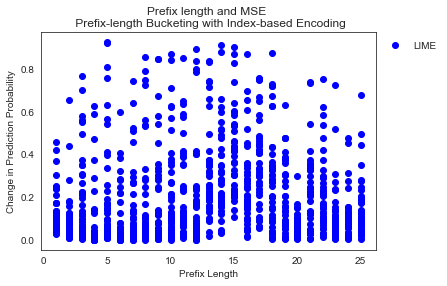

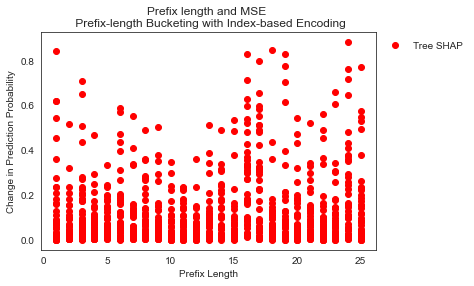

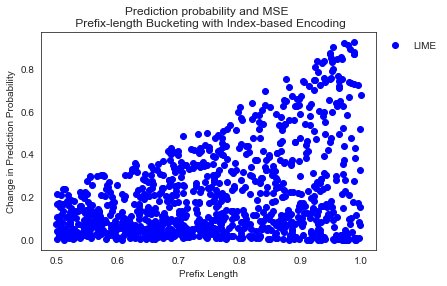

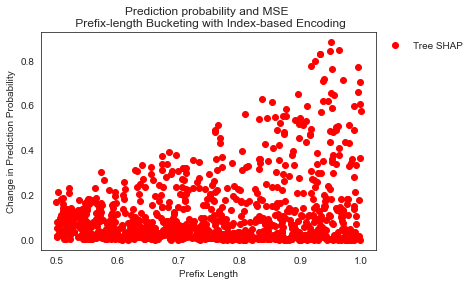

In [14]:
plt.plot(all_lengths, all_lime_MSE, 'bo', label = "LIME")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prefix length and MSE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

plt.plot(all_lengths, all_shap_MSE, 'ro', label = "Tree SHAP")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prefix length and MSE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

plt.plot(all_proba, all_lime_MSE, 'bo', label = "LIME")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prediction probability and MSE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

plt.plot(all_proba, all_shap_MSE, 'ro', label = "Tree SHAP")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prediction probability and MSE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

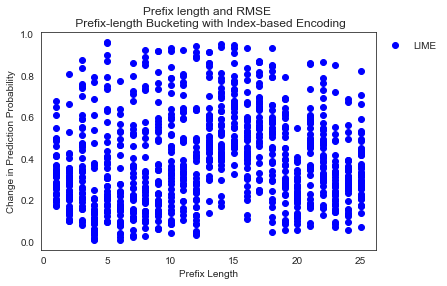

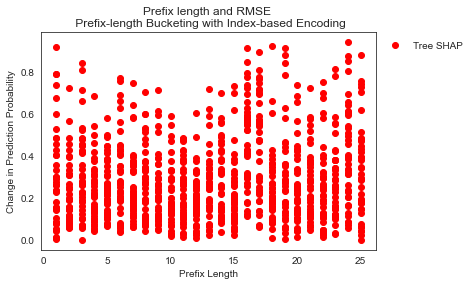

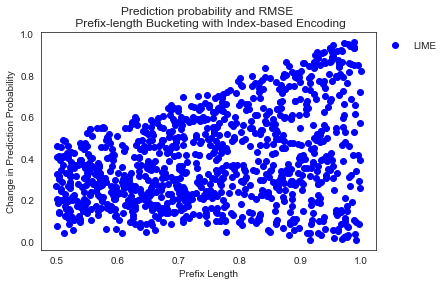

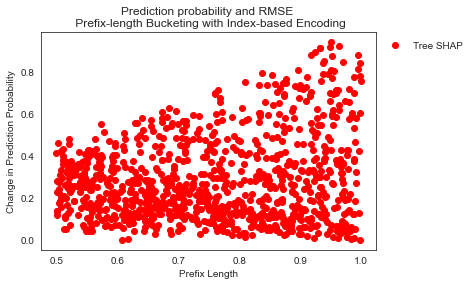

In [15]:
plt.plot(all_lengths, all_lime_RMSE, 'bo', label = "LIME")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prefix length and RMSE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

plt.plot(all_lengths, all_shap_RMSE, 'ro', label = "Tree SHAP")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prefix length and RMSE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

plt.plot(all_proba, all_lime_RMSE, 'bo', label = "LIME")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prediction probability and RMSE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

plt.plot(all_proba, all_shap_RMSE, 'ro', label = "Tree SHAP")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prediction probability and RMSE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

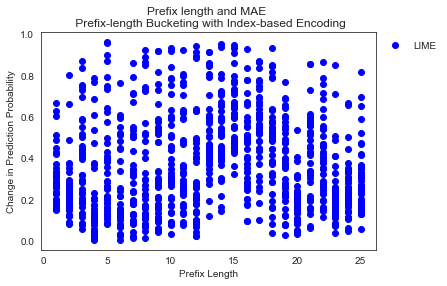

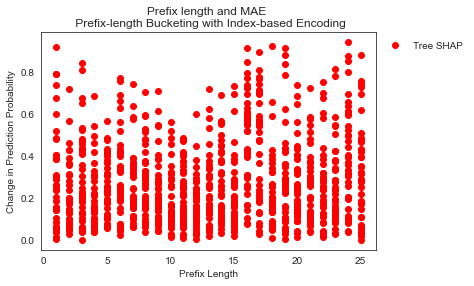

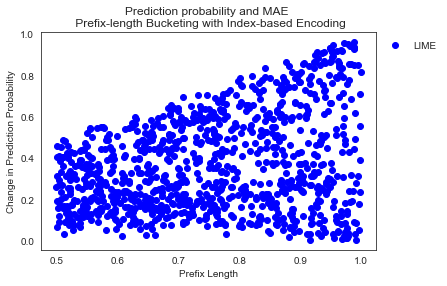

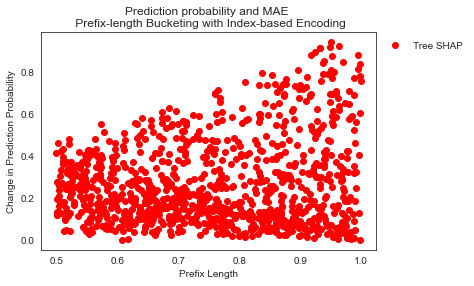

In [16]:
plt.plot(all_lengths, all_lime_MAE, 'bo', label = "LIME")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prefix length and MAE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

plt.plot(all_lengths, all_shap_MAE, 'ro', label = "Tree SHAP")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prefix length and MAE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

plt.plot(all_proba, all_lime_MAE, 'bo', label = "LIME")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prediction probability and MAE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

plt.plot(all_proba, all_shap_MAE, 'ro', label = "Tree SHAP")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prediction probability and MAE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

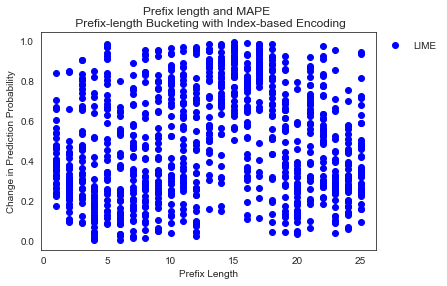

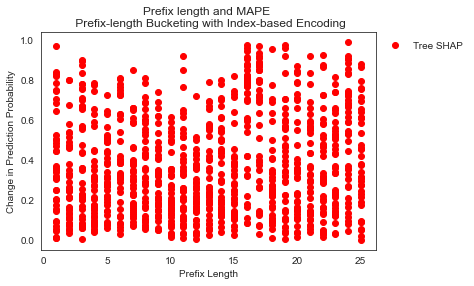

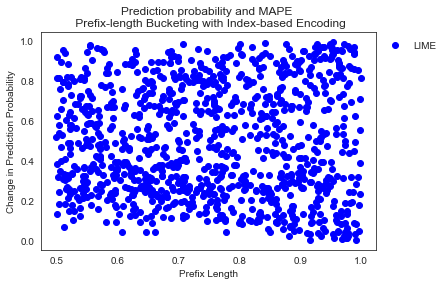

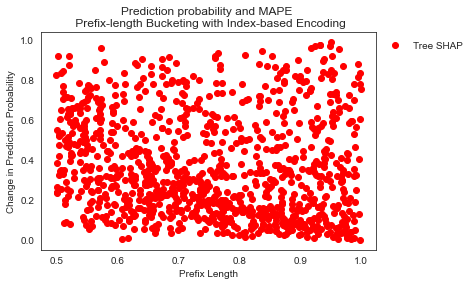

In [17]:
plt.plot(all_lengths, all_lime_MAPE, 'bo', label = "LIME")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prefix length and MAPE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

plt.plot(all_lengths, all_shap_MAPE, 'ro', label = "Tree SHAP")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prefix length and MAPE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

plt.plot(all_proba, all_lime_MAPE, 'bo', label = "LIME")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prediction probability and MAPE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

plt.plot(all_proba, all_shap_MAPE, 'ro', label = "Tree SHAP")
plt.xlabel("Prefix Length")
plt.ylabel("Change in Prediction Probability")
plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
#plt.yticks(np.arange(0,15,1))
plt.title("Prediction probability and MAPE \n Prefix-length Bucketing with Index-based Encoding")
plt.show()

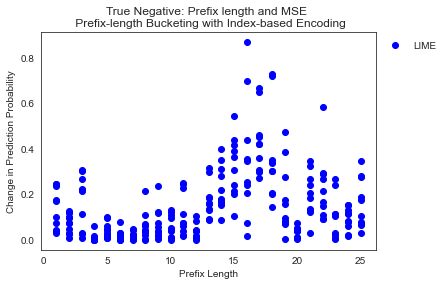

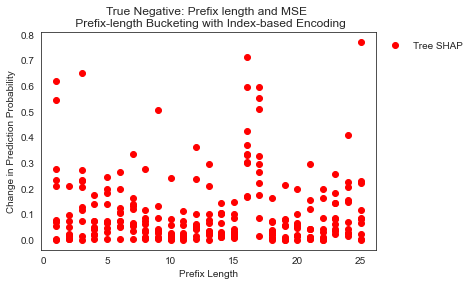

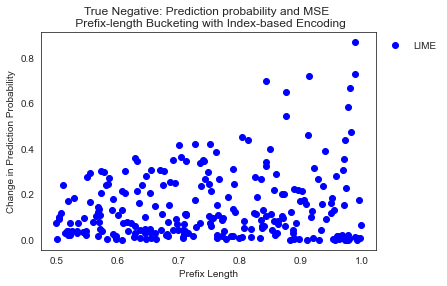

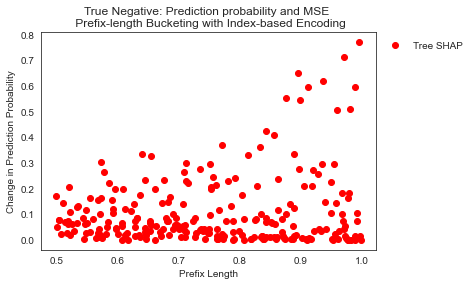

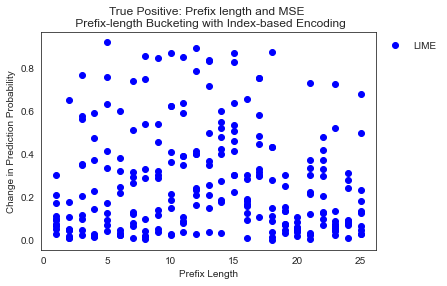

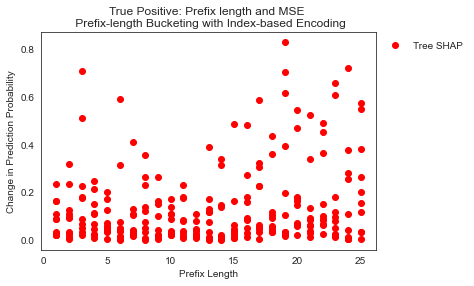

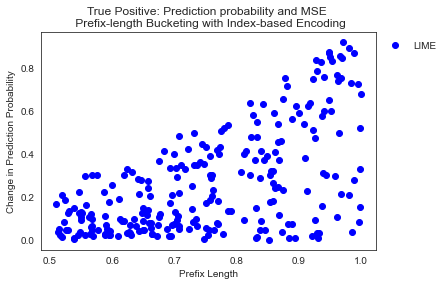

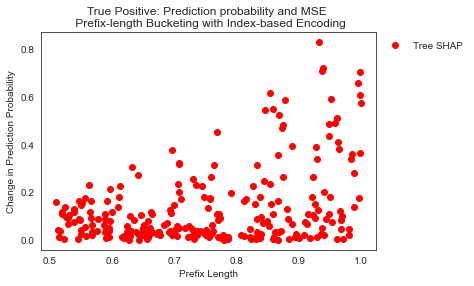

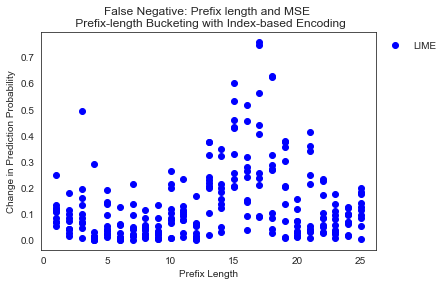

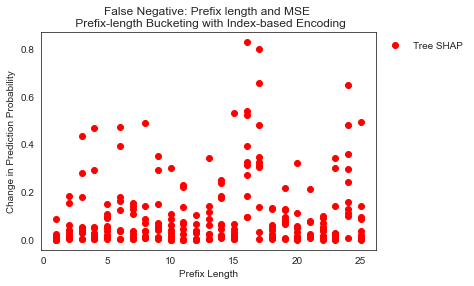

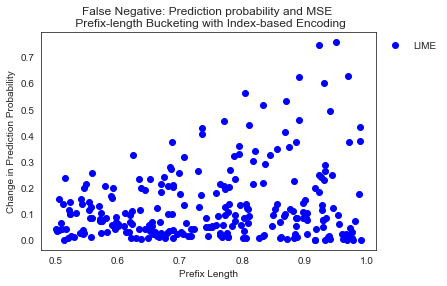

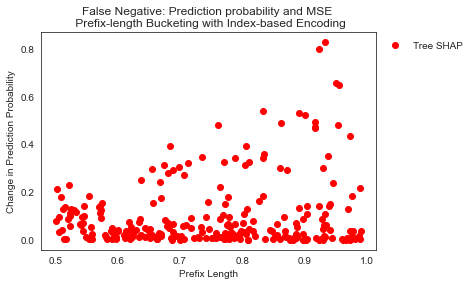

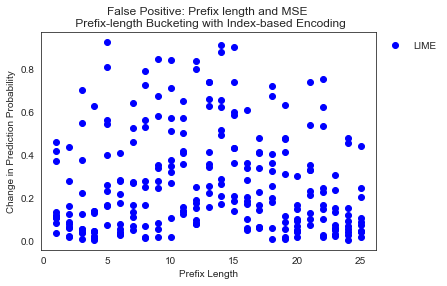

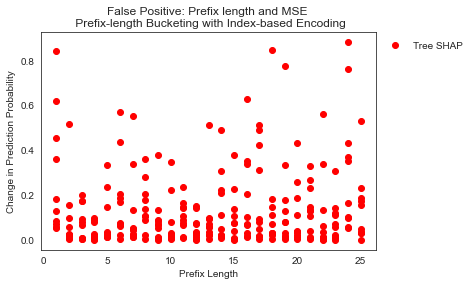

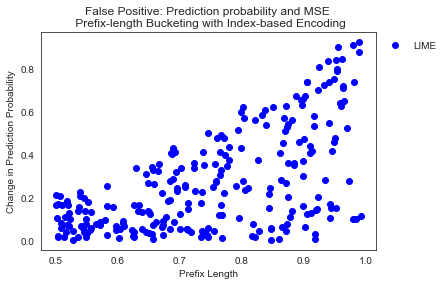

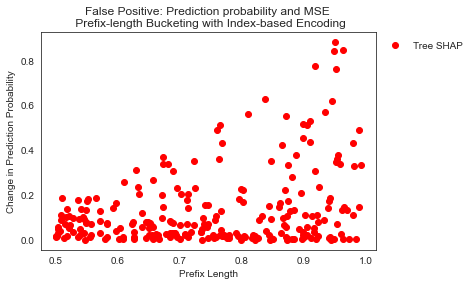

In [18]:
type_list = ['True Negative', 'True Positive', 'False Negative', 'False Positive']

for i in range(len(type_list)):
    plt.plot(sep_lengths[i], sep_lime_MSE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and MSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(sep_lengths[i], sep_shap_MSE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and MSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(sep_proba[i], sep_lime_MSE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and MSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(sep_proba[i], sep_shap_MSE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and MSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

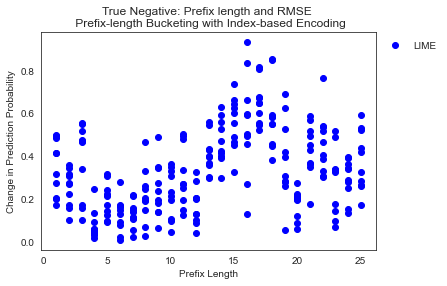

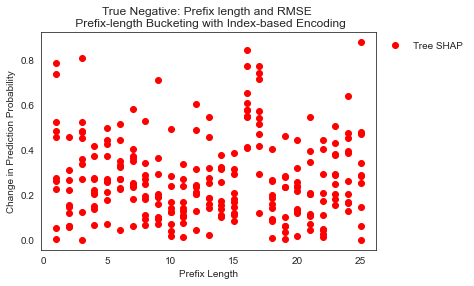

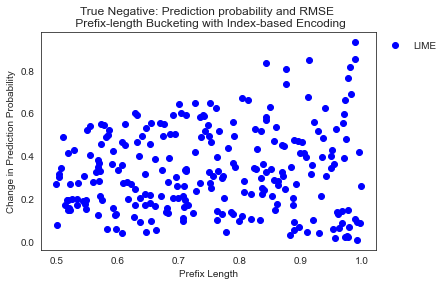

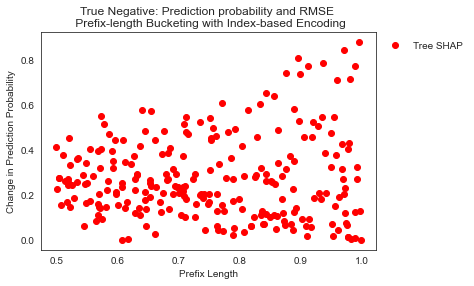

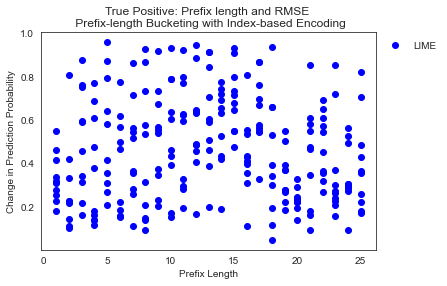

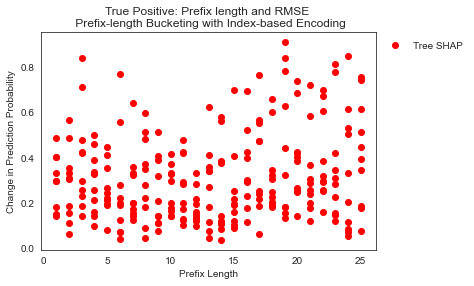

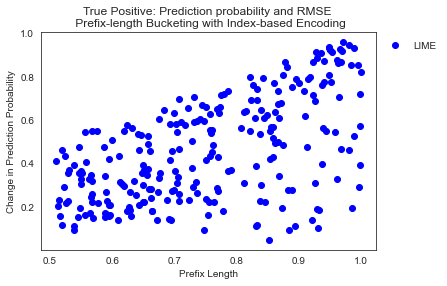

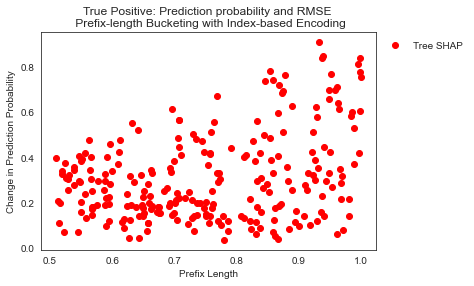

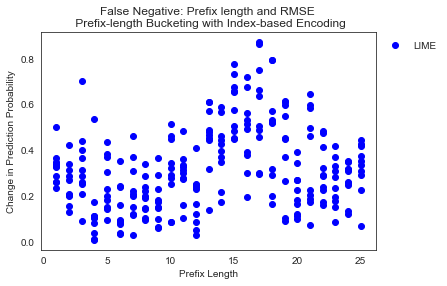

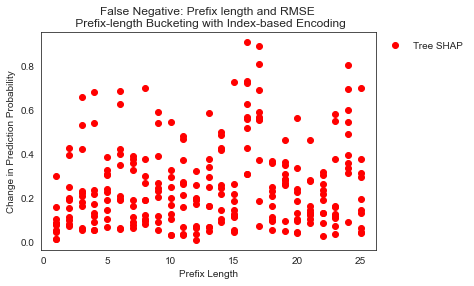

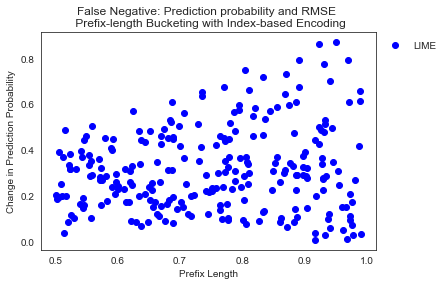

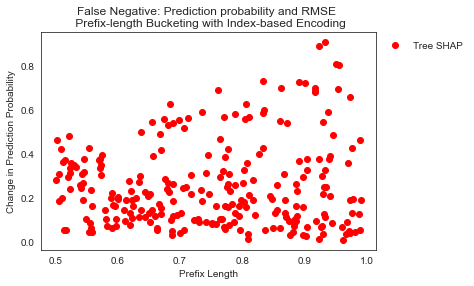

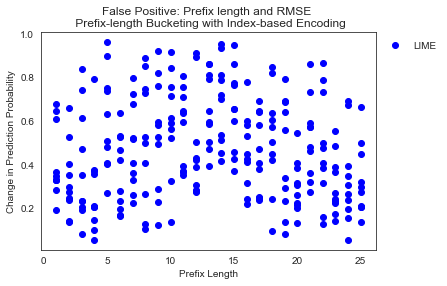

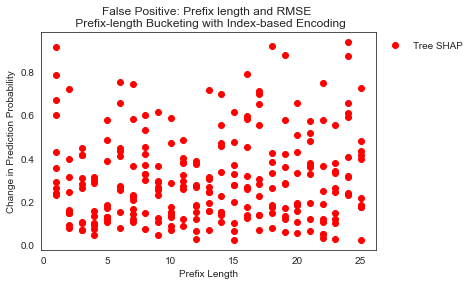

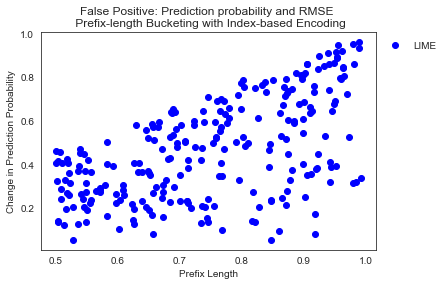

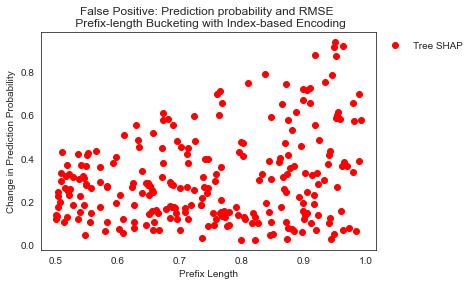

In [19]:
type_list = ['True Negative', 'True Positive', 'False Negative', 'False Positive']

for i in range(len(type_list)):
    plt.plot(sep_lengths[i], sep_lime_RMSE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and RMSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(sep_lengths[i], sep_shap_RMSE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and RMSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(sep_proba[i], sep_lime_RMSE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and RMSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(sep_proba[i], sep_shap_RMSE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and RMSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

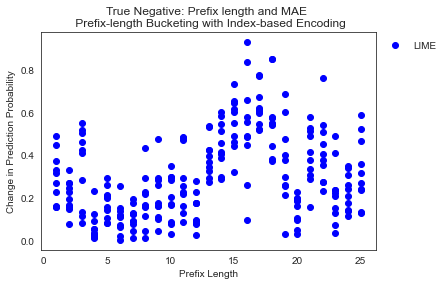

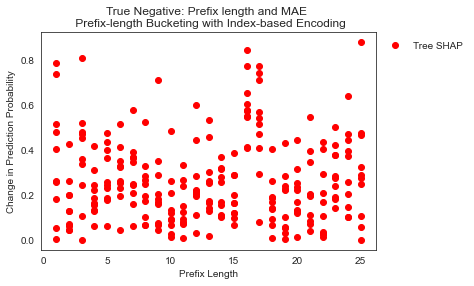

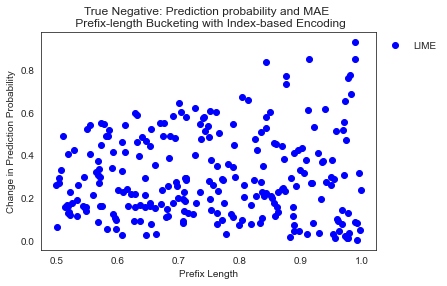

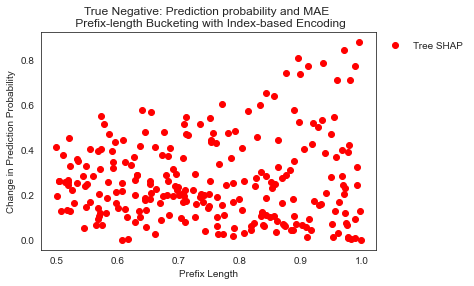

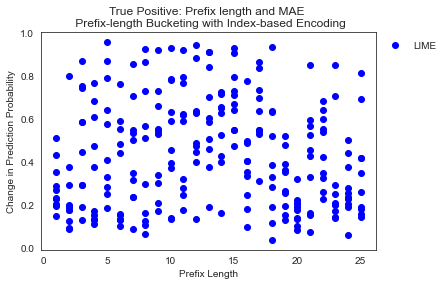

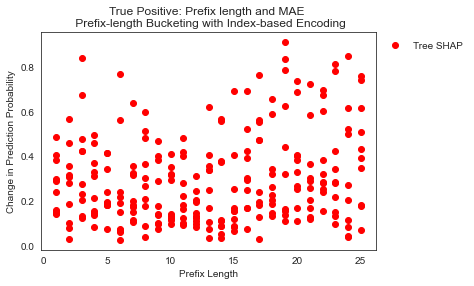

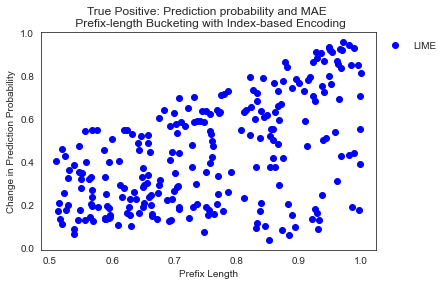

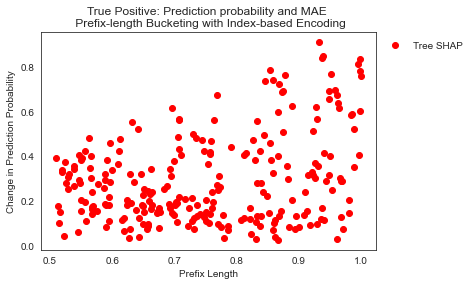

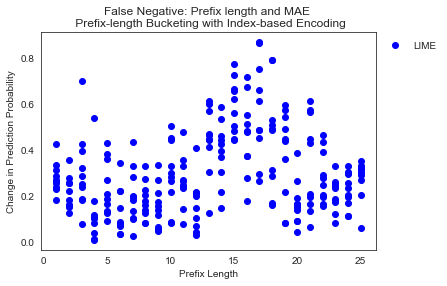

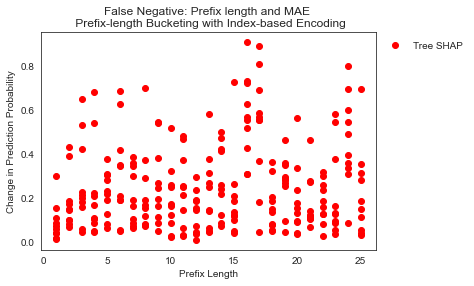

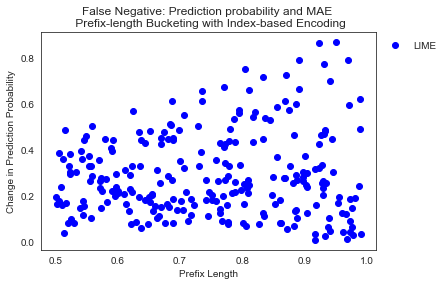

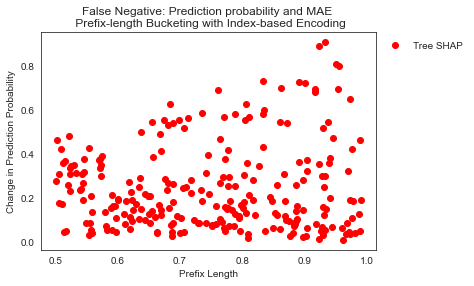

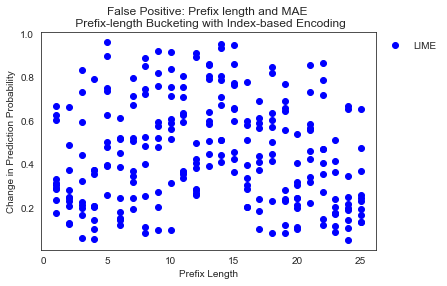

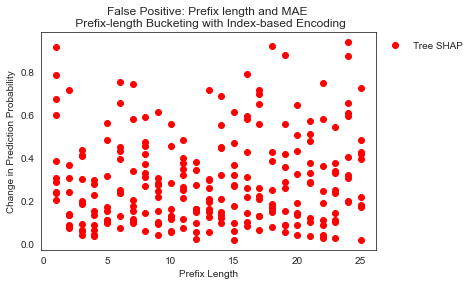

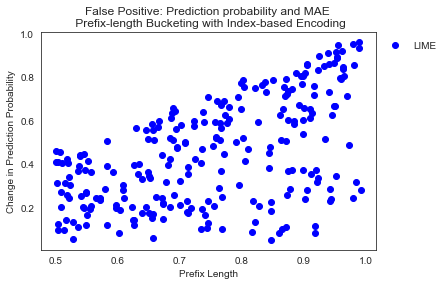

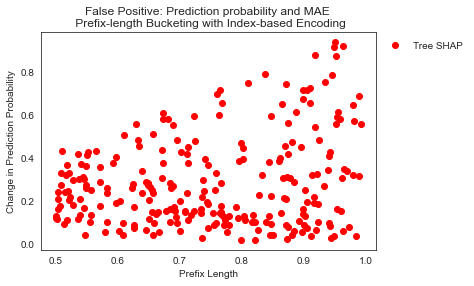

In [20]:
type_list = ['True Negative', 'True Positive', 'False Negative', 'False Positive']

for i in range(len(type_list)):
    plt.plot(sep_lengths[i], sep_lime_MAE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and MAE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(sep_lengths[i], sep_shap_MAE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and MAE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(sep_proba[i], sep_lime_MAE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and MAE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(sep_proba[i], sep_shap_MAE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and MAE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

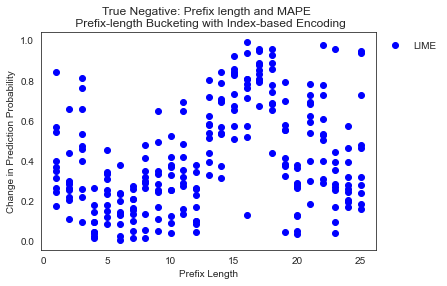

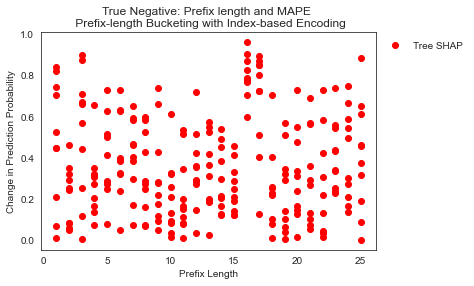

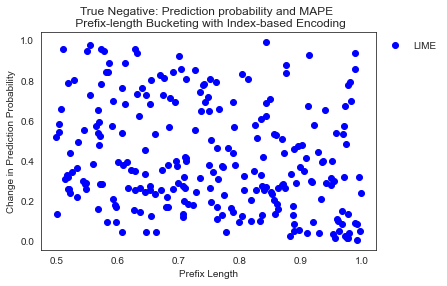

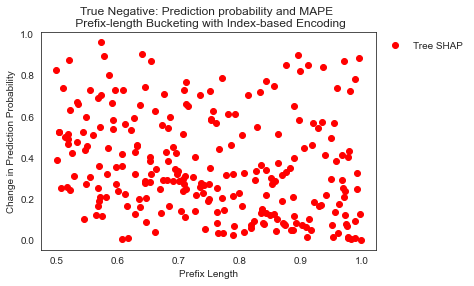

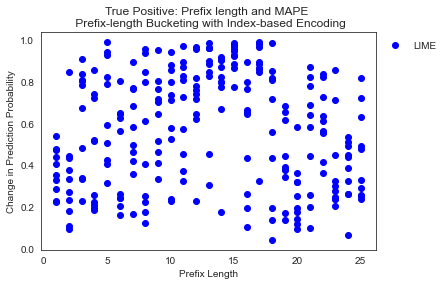

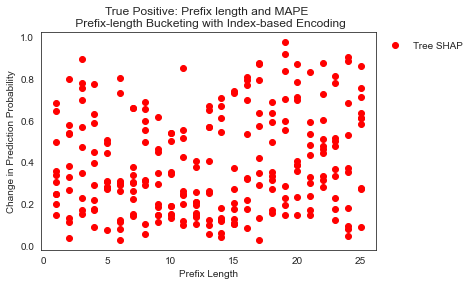

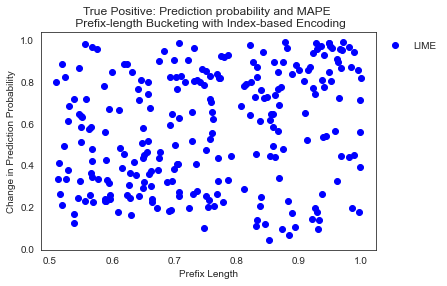

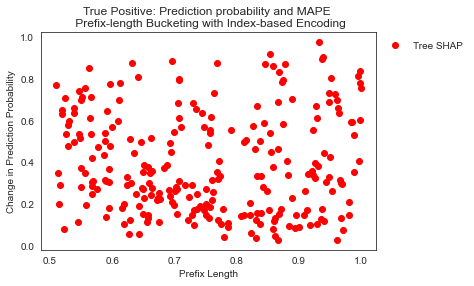

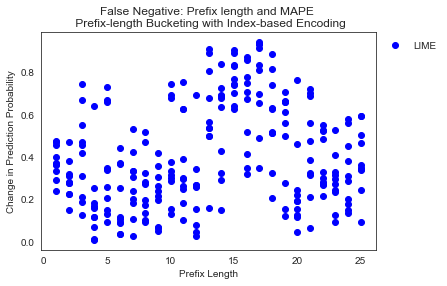

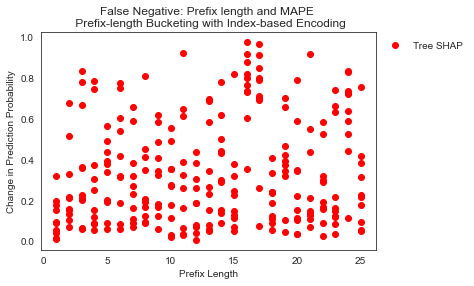

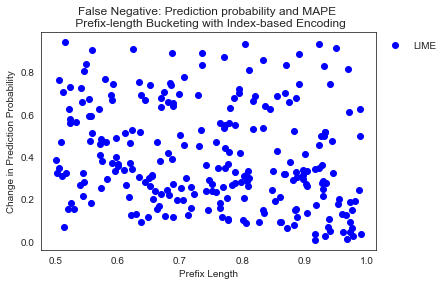

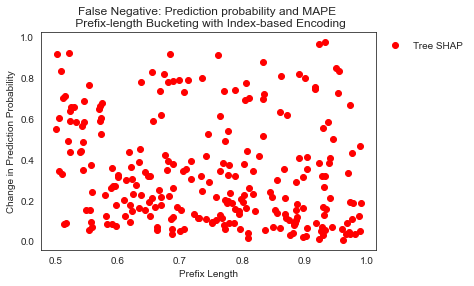

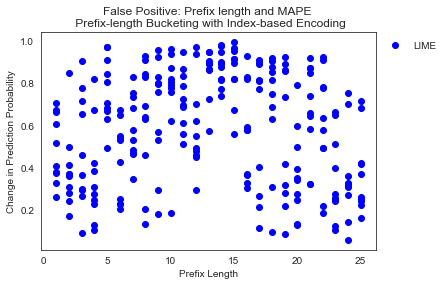

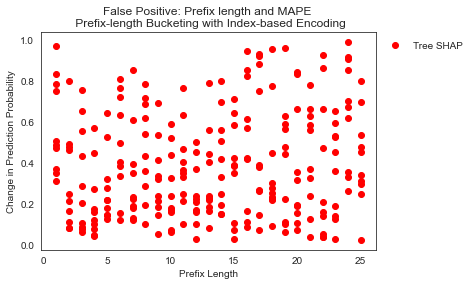

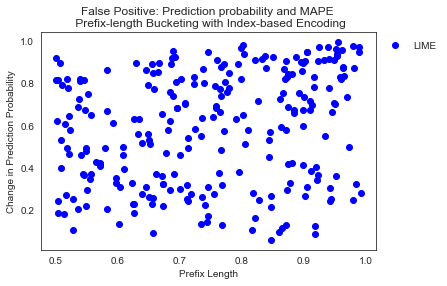

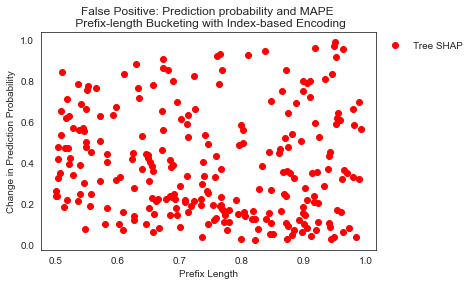

In [21]:
type_list = ['True Negative', 'True Positive', 'False Negative', 'False Positive']

for i in range(len(type_list)):
    plt.plot(sep_lengths[i], sep_lime_MAPE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and MAPE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(sep_lengths[i], sep_shap_MAPE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and MAPE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(sep_proba[i], sep_lime_MAPE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and MAPE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(sep_proba[i], sep_shap_MAPE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and MAPE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

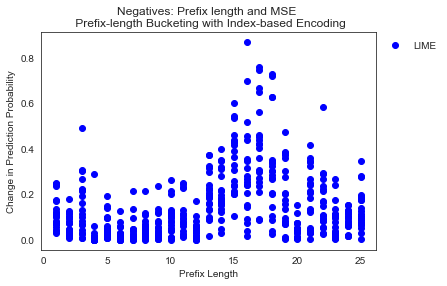

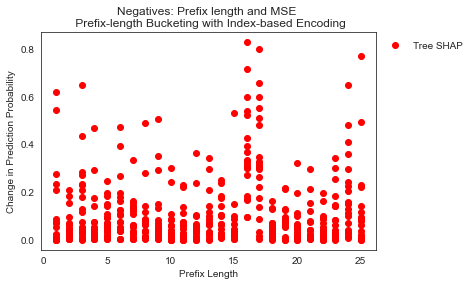

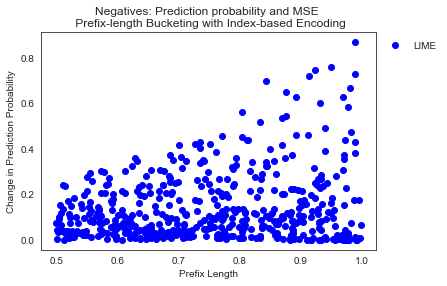

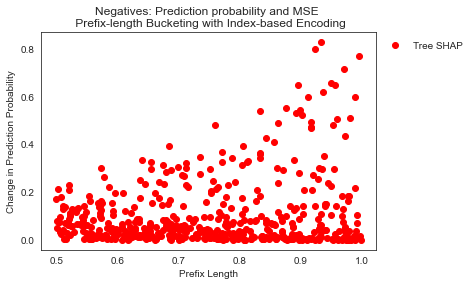

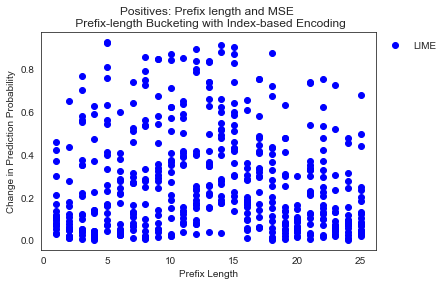

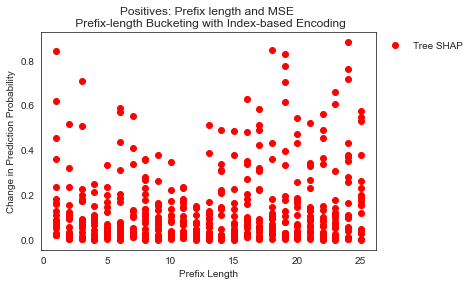

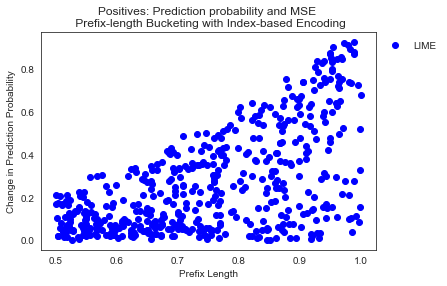

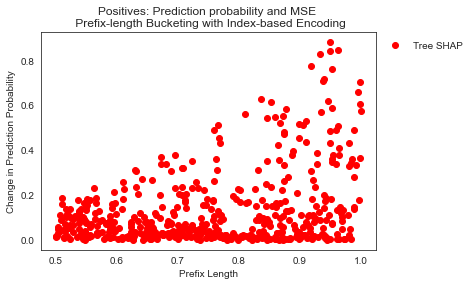

In [22]:
type_list = ['Negatives', 'Positives']

type_lengths = [[], []]
type_proba = [[],[]]

type_lengths[0].extend(sep_lengths[0])
type_lengths[0].extend(sep_lengths[2])
type_lengths[1].extend(sep_lengths[1])
type_lengths[1].extend(sep_lengths[3])

type_proba[0].extend(sep_proba[0])
type_proba[0].extend(sep_proba[2])
type_proba[1].extend(sep_proba[1])
type_proba[1].extend(sep_proba[3])

type_lime_MSE = [[],[]]
type_shap_MSE = [[],[]]

type_lime_MSE[0].extend(sep_lime_MSE[0])
type_lime_MSE[0].extend(sep_lime_MSE[2])
type_lime_MSE[1].extend(sep_lime_MSE[1])
type_lime_MSE[1].extend(sep_lime_MSE[3])

type_shap_MSE[0].extend(sep_shap_MSE[0])
type_shap_MSE[0].extend(sep_shap_MSE[2])
type_shap_MSE[1].extend(sep_shap_MSE[1])
type_shap_MSE[1].extend(sep_shap_MSE[3])

for i in range(len(type_list)):
    plt.plot(type_lengths[i], type_lime_MSE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and MSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(type_lengths[i], type_shap_MSE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and MSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(type_proba[i], type_lime_MSE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and MSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(type_proba[i], type_shap_MSE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and MSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

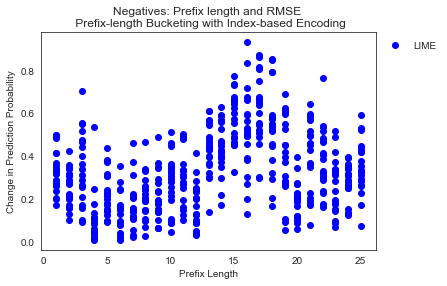

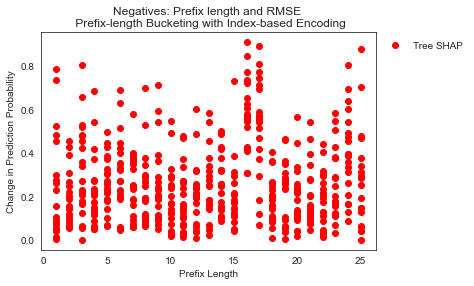

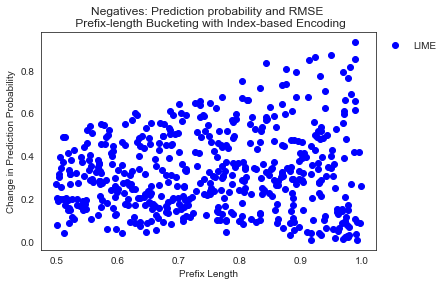

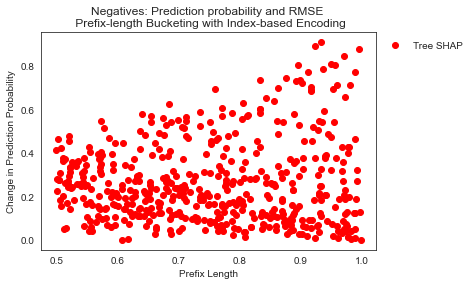

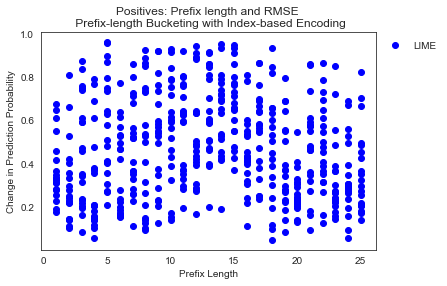

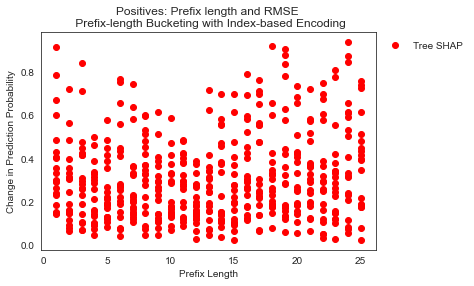

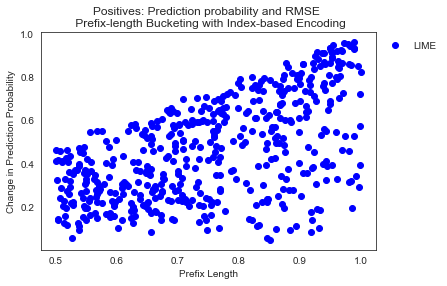

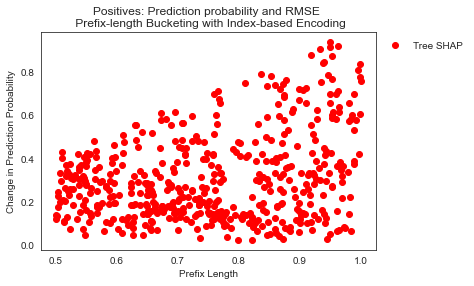

In [23]:
type_list = ['Negatives', 'Positives']

type_lengths = [[], []]
type_proba = [[],[]]

type_lengths[0].extend(sep_lengths[0])
type_lengths[0].extend(sep_lengths[2])
type_lengths[1].extend(sep_lengths[1])
type_lengths[1].extend(sep_lengths[3])

type_proba[0].extend(sep_proba[0])
type_proba[0].extend(sep_proba[2])
type_proba[1].extend(sep_proba[1])
type_proba[1].extend(sep_proba[3])

type_lime_RMSE = [[],[]]
type_shap_RMSE = [[],[]]

type_lime_RMSE[0].extend(sep_lime_RMSE[0])
type_lime_RMSE[0].extend(sep_lime_RMSE[2])
type_lime_RMSE[1].extend(sep_lime_RMSE[1])
type_lime_RMSE[1].extend(sep_lime_RMSE[3])

type_shap_RMSE[0].extend(sep_shap_RMSE[0])
type_shap_RMSE[0].extend(sep_shap_RMSE[2])
type_shap_RMSE[1].extend(sep_shap_RMSE[1])
type_shap_RMSE[1].extend(sep_shap_RMSE[3])

for i in range(len(type_list)):
    plt.plot(type_lengths[i], type_lime_RMSE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and RMSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(type_lengths[i], type_shap_RMSE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and RMSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(type_proba[i], type_lime_RMSE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and RMSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(type_proba[i], type_shap_RMSE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and RMSE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

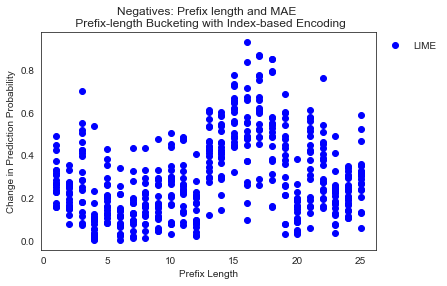

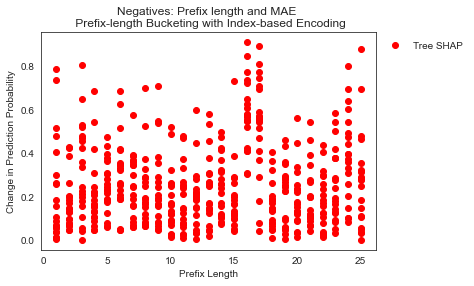

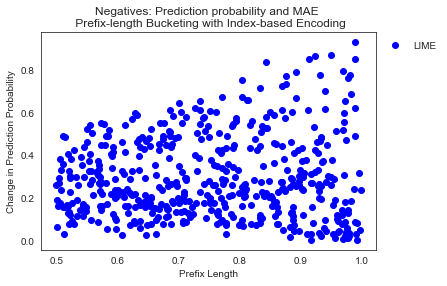

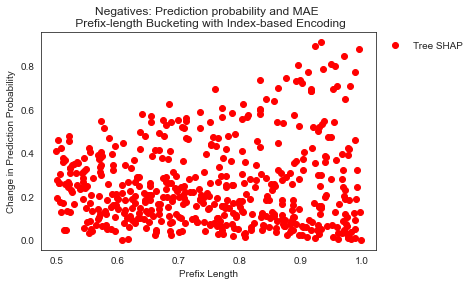

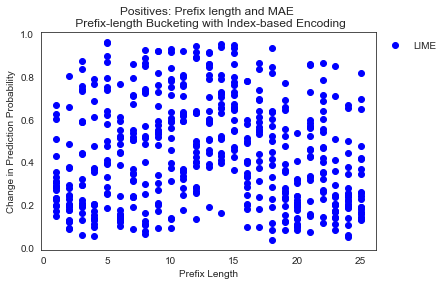

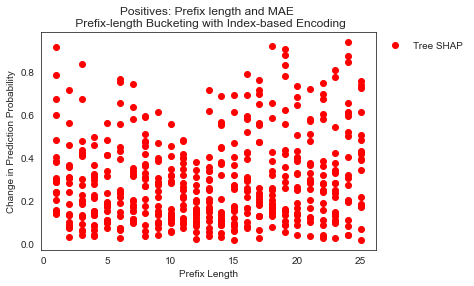

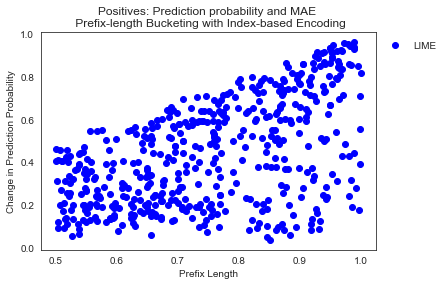

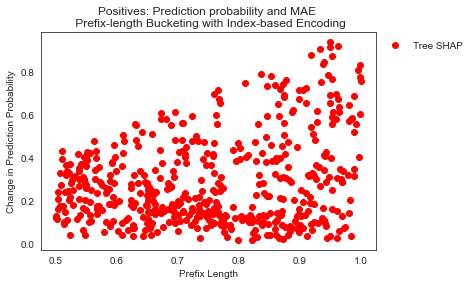

In [24]:
type_list = ['Negatives', 'Positives']

type_lengths = [[], []]
type_proba = [[],[]]

type_lengths[0].extend(sep_lengths[0])
type_lengths[0].extend(sep_lengths[2])
type_lengths[1].extend(sep_lengths[1])
type_lengths[1].extend(sep_lengths[3])

type_proba[0].extend(sep_proba[0])
type_proba[0].extend(sep_proba[2])
type_proba[1].extend(sep_proba[1])
type_proba[1].extend(sep_proba[3])

type_lime_MAE = [[],[]]
type_shap_MAE = [[],[]]

type_lime_MAE[0].extend(sep_lime_MAE[0])
type_lime_MAE[0].extend(sep_lime_MAE[2])
type_lime_MAE[1].extend(sep_lime_MAE[1])
type_lime_MAE[1].extend(sep_lime_MAE[3])

type_shap_MAE[0].extend(sep_shap_MAE[0])
type_shap_MAE[0].extend(sep_shap_MAE[2])
type_shap_MAE[1].extend(sep_shap_MAE[1])
type_shap_MAE[1].extend(sep_shap_MAE[3])

for i in range(len(type_list)):
    plt.plot(type_lengths[i], type_lime_MAE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and MAE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(type_lengths[i], type_shap_MAE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and MAE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(type_proba[i], type_lime_MAE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and MAE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(type_proba[i], type_shap_MAE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and MAE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

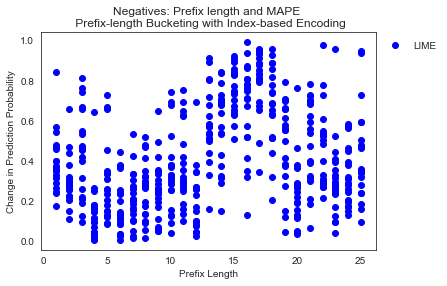

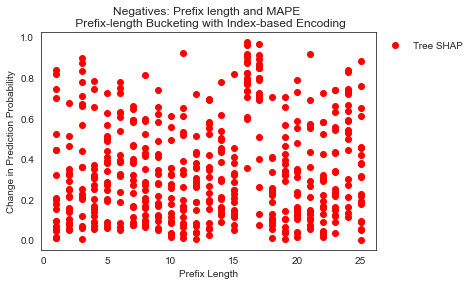

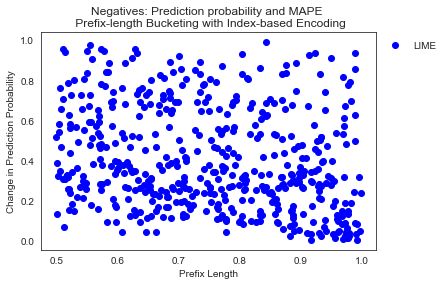

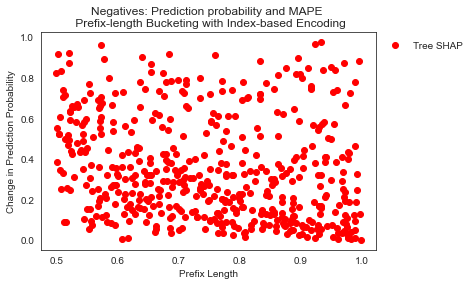

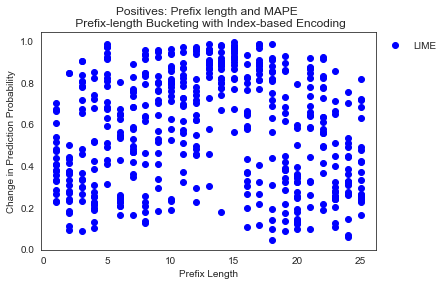

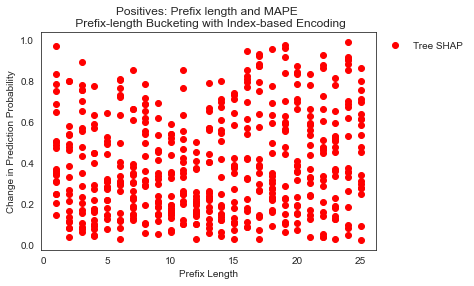

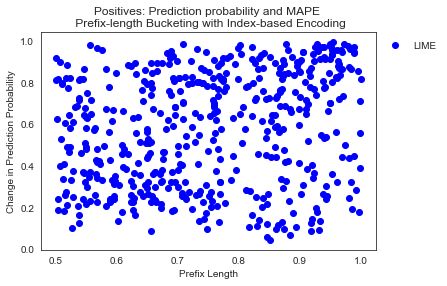

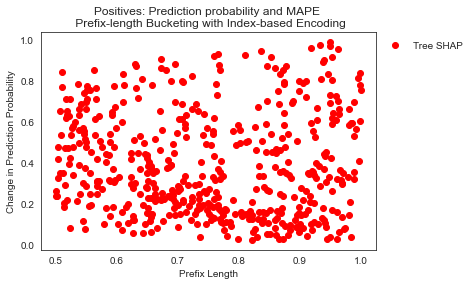

In [25]:
type_list = ['Negatives', 'Positives']

type_lengths = [[], []]
type_proba = [[],[]]

type_lengths[0].extend(sep_lengths[0])
type_lengths[0].extend(sep_lengths[2])
type_lengths[1].extend(sep_lengths[1])
type_lengths[1].extend(sep_lengths[3])

type_proba[0].extend(sep_proba[0])
type_proba[0].extend(sep_proba[2])
type_proba[1].extend(sep_proba[1])
type_proba[1].extend(sep_proba[3])

type_lime_MAPE = [[],[]]
type_shap_MAPE = [[],[]]

type_lime_MAPE[0].extend(sep_lime_MAPE[0])
type_lime_MAPE[0].extend(sep_lime_MAPE[2])
type_lime_MAPE[1].extend(sep_lime_MAPE[1])
type_lime_MAPE[1].extend(sep_lime_MAPE[3])

type_shap_MAPE[0].extend(sep_shap_MAPE[0])
type_shap_MAPE[0].extend(sep_shap_MAPE[2])
type_shap_MAPE[1].extend(sep_shap_MAPE[1])
type_shap_MAPE[1].extend(sep_shap_MAPE[3])

for i in range(len(type_list)):
    plt.plot(type_lengths[i], type_lime_MAPE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and MAPE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(type_lengths[i], type_shap_MAPE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prefix length and MAPE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(type_proba[i], type_lime_MAPE[i], 'bo', label = "LIME")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and MAPE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

    plt.plot(type_proba[i], type_shap_MAPE[i], 'ro', label = "Tree SHAP")
    plt.xlabel("Prefix Length")
    plt.ylabel("Change in Prediction Probability")
    plt.legend(frameon = False, bbox_to_anchor=(1, 1), loc = 'upper left')
    #plt.yticks(np.arange(0,15,1))
    plt.title(type_list[i]+": Prediction probability and MAPE \n Prefix-length Bucketing with Index-based Encoding")
    plt.show()

In [26]:
print("Average LIME MSE:", np.mean(all_lime_MSE))
print("Average SHAP MSE:", np.mean(all_shap_MSE))
print("\n")

print("Average LIME RMSE:", np.mean(all_lime_RMSE))
print("Average SHAP RMSE:", np.mean(all_shap_RMSE))
print("\n")

print("Average LIME MAE:", np.mean(all_lime_MAE))
print("Average SHAP MAE:", np.mean(all_shap_MAE))
print("\n")

print("Average LIME MAPE:", np.mean(all_lime_MAPE))
print("Average SHAP MAPE:", np.mean(all_shap_MAPE))

Average LIME MSE: 0.20408128742325643
Average SHAP MSE: 0.12049600340774166


Average LIME RMSE: 0.3937152601372183
Average SHAP RMSE: 0.28782548268616076


Average LIME MAE: 0.36954022030797784
Average SHAP MAE: 0.27419991799672133


Average LIME MAPE: 0.49163694307952
Average SHAP MAPE: 0.3709598066233862
